In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})
from numpy.linalg import inv

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import pandas as pd
# import experiments.fitting as fitter

In [3]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)

Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [4]:

import experiments.fitting as fitter
from numpy.linalg import inv

from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [5]:
# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs
data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


# Function used in experiment

In [6]:
def coherent_odd(alpha):
    return np.sinh(np.abs(alpha)**2)/np.exp(np.abs(alpha)**2)

def coherent_even(alpha):
    return np.cosh(np.abs(alpha)**2)/np.exp(np.abs(alpha)**2)
def Pn_poisson(x, c, n):
    alph = c * x # gain to |alpha| conversion
    Pn = alph**(2*n) * np.exp(-alph**2) / np.math.factorial(n)
    return Pn
def fitamp_new(p1, p2):
    fitamparray = []
    fitfreqarray = []
    
    fitamparray_err = []
    fitfreqarray_err = []

    n_peaks = int(len(p1))
    for i in range(n_peaks):
        fitamparray.append(p1[i][1])
        fitfreqarray.append(p1[i][2])
        fitamparray_err.append(np.sqrt(np.diag(p2[i])[1]))
        fitfreqarray_err.append(np.sqrt(np.diag(p2[i])[2]))
        
    return fitamparray , fitfreqarray, fitamparray_err, fitfreqarray_err
def fitamp(p1, p2):
    fitamparray = []
    fitfreqarray = []
    
    fitamparray_err = []
    fitfreqarray_err = []

    n_peaks = int((len(p1)-1)/3)
    for i in range(n_peaks):
        fitamparray.append(p1[3*i+1])
        fitfreqarray.append(p1[3*i+2])
        fitamparray_err.append(np.sqrt(np.diag(p2)[3*i+1]))
        fitfreqarray_err.append(np.sqrt(np.diag(p2)[3*i+2]))
        
    return fitamparray , fitfreqarray, fitamparray_err, fitfreqarray_err
def gaussfuncsum_with_baseline(x, *args):
    """p[0]+p[1]/(1+(x-p[2])**2/p[3]**2)"""
    y = 0 
    p = args
#     print(len(p))
    for ii in range(N):
        y = y + p[3*ii+1]*np.exp(-(x-p[3*ii+2])**2/(2*p[3*ii+3]**2))
    y += p[0]
    return y

def fitgausssum_with_baseline(xdata, ydata, fitparams=None):
    """fit lorentzian:
        returns [offset,amplitude,center,hwhm]"""
    fitdatax = xdata
    fitdatay = ydata        
    popt, pcov = curve_fit(gaussfuncsum_with_baseline, fitdatax, fitdatay, p0=fitparams, maxfev = 50000)

    return popt, pcov
def gauss_baseline(x, *p):
    return p[0] + p[1]*np.exp(-(x-p[2])**2/(2*p[3]**2))
def coherent_state(n, alpha):
    return np.exp(-abs(alpha)**2)*abs(alpha)**(2*n)/scipy.special.factorial(n)
def number_splitting(x, y, n=0, plot=False):
    """Fits an individual Gaussian around each number peak and returns an array
    of the peak values and frequency with error bars.
    'x': in units of χ so please pass it correctly, >0

    """
    # number of peaks
    num_peaks = int(max(x)+1)
    
    fitdata = {}
    peaks = []
    freqs = []
    peaks_err = []
    freqs_err = []
    if plot:
        fig, axs = plt.subplots(1, 1, dpi=300)
        plt.tight_layout()
        axs.set_xlabel(r'$n$', fontsize=20)
        axs.set_ylabel(r'$P_{e}$', fontsize=20)
        axs.grid(True, which='major', axis='both', color='grey', linestyle='--', linewidth=0.4)
        plt.tick_params(direction='in', length=6, width=2, colors='k', \
            grid_color='grey', grid_alpha=0.5, labelsize=20, labelbottom=True, right=True, top=True, left=True)
    
    for ind in range(num_peaks-n):
#         fitdata['n%.i'%ind] = {}
        """Fits the peak with a Gaussian spanning 1 unit of χ"""
        min_ind, max_ind =  np.argmin(abs(x-ind-0.5)), np.argmin(abs(x-ind+0.5))

        x_domain = x[min_ind:max_ind]
        y_domain = y[min_ind:max_ind]
        
        a = (y_domain[0] + y_domain[-1])/2
        b = (np.max(y_domain) - np.min(y_domain))
        c = x_domain[np.argmax(y_domain)]
        d = (np.max(x_domain) - np.min(x_domain))/4
        p = [a, b, c, d]
        popt, pcov = curve_fit(gauss_baseline, x_domain, y_domain, p0=(a, b, c, d))
        if plot:
            axs.plot(x_domain, y_domain, 'ks')
            axs.plot(x_domain, gauss_baseline(x_domain, *popt), 'r')
        
        freqs.append(popt[2])
        freqs_err.append(np.sqrt(np.diag(pcov)[2]))
        peaks.append(popt[1])
        peaks_err.append(np.sqrt(np.diag(pcov)[1]))
        
    fitdata['freq'] = freqs
    fitdata['peak'] = peaks
    fitdata['freq_err'] = freqs_err
    fitdata['peak_err'] = peaks_err
    if plot:
        plt.show()
    """Note: Don't forget to scale the returned frequency values with χ """
    return fitdata

def fitcoherentstate(peak_val, peak_val_err=0):
    xdata = np.arange(len(peak_val))
    ydata = np.array(peak_val)
    if peak_val_err:
        ydata_err = np.array(peak_val_err)
        popt, pcov = curve_fit(coherent_state, xdata, ydata, sigma=ydata_err)
    else:
        popt, pcov = curve_fit(coherent_state, xdata, ydata)

    return popt[0], np.sqrt(pcov[0][0])

In [7]:
def filter_data_IQ(II, IQ, threshold, readout_per_experiment=2):
    # assume the last one is experiment data, the last but one is for post selection
    result_Ig = []
    result_Ie = []
    
    
    for k in range(len(II) // readout_per_experiment):
        index_4k_plus_2 = readout_per_experiment * k + readout_per_experiment-2
        index_4k_plus_3 = readout_per_experiment * k + readout_per_experiment-1
        
        # Ensure the indices are within the list bounds
        if index_4k_plus_2 < len(II) and index_4k_plus_3 < len(II):
            # Check if the value at 4k+2 exceeds the threshold
            if II[index_4k_plus_2] < threshold:
                # Add the value at 4k+3 to the result list
                result_Ig.append(II[index_4k_plus_3])
                result_Ie.append(IQ[index_4k_plus_3])
    
    return np.array(result_Ig), np.array(result_Ie)
def parity_display(data, fit=True, fitparams=None,  normalize= [False, 'g_data', 'e_data'], vlines = None, title='Parity',
                        active_reset=True, readout_per_round=4, threshold=-4.0):
        
    xlist = data['xpts'][0:-1]
    if active_reset:
        # for each time, post select the single shot data
        Ilist = []
        Qlist = []
        for ii in range(len(data['idata'])-1):
            Ig, Qg = filter_data_IQ(data['idata'][ii], data['qdata'][ii], threshold, readout_per_experiment=readout_per_round)
            print(len(Ig))
            Ilist.append(np.mean(Ig))
            Qlist.append(np.mean(Qg))
        
    else:
        
        Ilist = data["avgi"][0:-1]
        Qlist = data["avgq"][0:-1]

    p_avgi, pCov_avgi = fitter.fitdecaysin(
        xlist, Ilist, fitparams=fitparams)
    p_avgq, pCov_avgq = fitter.fitdecaysin(
        xlist, Qlist, fitparams=fitparams)

    data['fit_avgi'] = p_avgi
    data['fit_avgq'] = p_avgq

    data['fit_err_avgi'] = pCov_avgi
    data['fit_err_avgq'] = pCov_avgq


    xpts_ns = data['xpts']*1e3

    plt.figure(figsize=(10, 8))

    axi = plt.subplot(
        211, title=title, ylabel="I [adc level]")
    plt.plot(xpts_ns[1:-1], Ilist[1:], 'o-')
    if fit:
        p = data['fit_avgi']
        plt.plot(xpts_ns[0:-1], fitter.decaysin(xlist, *p))
        if p[2] > 180:
            p[2] = p[2] - 360
        elif p[2] < -180:
            p[2] = p[2] + 360
        if p[2] < 0:
            pi_length = (1/2 - p[2]/180)/2/p[1]
        else:
            pi_length = (3/2 - p[2]/180)/2/p[1]
        pi2_length = pi_length/2
        data['pi_length'] = pi_length
        data['pi2_length'] = pi2_length
        print(p)
        print('Decay from avgi [us]', p[3])
        print('Rate [MHz]', p[1])
        print(f'Pi length from avgi data [us]: {pi_length}')
        print(f'\tPi/2 length from avgi data [us]: {pi2_length}')
        if vlines is not None:
            for vline in vlines:
                plt.axvline(vline, color='r', ls='--')
        print('Fit params: ', p)

    print()
    axq = plt.subplot(212, xlabel="Pulse length [ns]", ylabel="Q [adc levels]")
    plt.plot(xpts_ns[1:-1], Qlist[1:], 'o-')
    if fit:
        p = data['fit_avgq']
        plt.plot(xpts_ns[0:-1], fitter.decaysin(xlist, *p))
        if p[2] > 180:
            p[2] = p[2] - 360
        elif p[2] < -180:
            p[2] = p[2] + 360
        if p[2] < 0:
            pi_length = (1/2 - p[2]/180)/2/p[1]
        else:
            pi_length = (3/2 - p[2]/180)/2/p[1]
        pi2_length = pi_length/2
        print('Decay from avgq [us]', p[3])
        print('Rate [MHz]', p[1])
        print(f'Pi length from avgq data [us]: {pi_length}')
        print(f'Pi/2 length from avgq data [us]: {pi2_length}')
        if vlines is not None:
            for vline in vlines:
                plt.axvline(vline, color='r', ls='--')
        print('Fit params: ', p)
    
    if normalize[0]:
        axi,axq = normalize_data(axi, axq, data, normalize)
    plt.tight_layout()
    plt.show()

In [8]:

def C2Q_display(data, vlines = None):

    xpts_ns = data['xpts']

    plt.figure(figsize=(10, 8))
    plt.subplot(
        211, title=f"Qubit readout", ylabel="I [adc level]")
    plt.plot(xpts_ns[1:-1], data["avgi"][1:-1], 'o-')
    if vlines is not None:
        for vline in vlines:
            plt.axvline(vline, color='g', ls='--')

    plt.subplot(212, xlabel="Delay cycles", ylabel="Q [adc levels]")
    plt.plot(xpts_ns[1:-1], data["avgq"][1:-1], 'o-')
    if vlines is not None:
        for vline in vlines:
            plt.axvline(vline, ls='--', label = 'x = ' + str(vline))


    plt.tight_layout()
    plt.show()


def parity_mapping_display(data, fit=True, fitparams=None, title='sideband_rabi'):
        
    # fitparams=[amp, freq (non-angular), phase (deg), decay time, amp offset, decay time offset]
    # Remove the first and last point from fit in case weird edge measurements
    # fitparams = [None, 1/max(data['xpts']), None, None]
    # fitparams = None
    p_avgi, pCov_avgi = fitter.fitdecaysin(
        data['xpts'][:-1], data["avgi"][:-1], fitparams=fitparams)
    p_avgq, pCov_avgq = fitter.fitdecaysin(
        data['xpts'][:-1], data["avgq"][:-1], fitparams=fitparams)
    p_amps, pCov_amps = fitter.fitdecaysin(
        data['xpts'][:-1], data["amps"][:-1], fitparams=fitparams)
    data['fit_avgi'] = p_avgi
    data['fit_avgq'] = p_avgq
    data['fit_amps'] = p_amps
    data['fit_err_avgi'] = pCov_avgi
    data['fit_err_avgq'] = pCov_avgq
    data['fit_err_amps'] = pCov_amps

    xpts_ns = data['xpts']*1e3

    plt.figure(figsize=(10, 8))

    plt.subplot(
        211, title=title, ylabel="I [adc level]")
    plt.plot(xpts_ns[1:-1], data["avgi"][1:-1], 'o-')
    if fit:
        p = data['fit_avgi']
        plt.plot(xpts_ns[0:-1], fitter.decaysin(data["xpts"][0:-1], *p))
        if p[2] > 180:
            p[2] = p[2] - 360
        elif p[2] < -180:
            p[2] = p[2] + 360
        if p[2] < 0:
            pi_length = (1/2 - p[2]/180)/2/p[1]
        else:
            pi_length = (3/2 - p[2]/180)/2/p[1]
        pi2_length = pi_length/2
        print('Decay from avgi [us]', p[3])
        print(f'Pi length from avgi data [us]: {pi_length}')
        print(f'\tPi/2 length from avgi data [us]: {pi2_length}')
        plt.axvline(pi_length*1e3, color='0.2', linestyle='--')
        plt.axvline(pi2_length*1e3, color='0.2', linestyle='--')

    print()
    plt.subplot(212, xlabel="Pulse length [ns]", ylabel="Q [adc levels]")
    plt.plot(xpts_ns[1:-1], data["avgq"][1:-1], 'o-')
    if fit:
        p = data['fit_avgq']
        plt.plot(xpts_ns[0:-1], fitter.decaysin(data["xpts"][0:-1], *p))
        if p[2] > 180:
            p[2] = p[2] - 360
        elif p[2] < -180:
            p[2] = p[2] + 360
        if p[2] < 0:
            pi_length = (1/2 - p[2]/180)/2/p[1]
        else:
            pi_length = (3/2 - p[2]/180)/2/p[1]
        pi2_length = pi_length/2
        print('Decay from avgq [us]', p[3])
        print(f'Pi length from avgq data [us]: {pi_length}')
        print(f'Pi/2 length from avgq data [us]: {pi2_length}')
        plt.axvline(pi_length*1e3, color='0.2', linestyle='--')
        plt.axvline(pi2_length*1e3, color='0.2', linestyle='--')
    plt.tight_layout()
    plt.show()

# Experiment path

In [9]:
# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs
data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


# Convert ECD pulse into gaussian control

In [7]:
def extract_list(values):
    # List to hold all separated lists in order
    ordered_lists = []

    # Temporary list to hold consecutive values
    temp_list = []

    # Track the last value type to detect changes from zero to non-zero or vice versa
    last_value_was_zero = None

    # Iterate through the array
    for value in values:
        is_zero = value == 0
        # Check if there is a change in value type
        if last_value_was_zero is not None and is_zero != last_value_was_zero:
            # If there is a change, append the temporary list to the ordered list
            ordered_lists.append(temp_list)
            temp_list = []  # Reset the temporary list
        
        # Add the current value to the temporary list
        temp_list.append(value)
        # Update the last value type tracker
        last_value_was_zero = is_zero

    # Check for any remaining values in the temporary list
    if temp_list:
        ordered_lists.append(temp_list)

    # for i in range(len(ordered_lists)):
    #     if len(ordered_lists[i]) == 1:
    #         if i < len(ordered_lists)-1:
    #             ordered_lists[i+1] = ordered_lists[i]+ ordered_lists[i+1]
    #             del ordered_lists[i]
    #             if i >= len(ordered_lists): return ordered_lists
    #         else:
    #             ordered_lists[i-1] = ordered_lists[i-1]+ ordered_lists[i]
    #             del ordered_lists[i]
    #             if i >= len(ordered_lists): return ordered_lists
    #     elif len(ordered_lists[i]) == 2:
    #         ordered_lists[i-1] = ordered_lists[i-1]+ [0]
    #         ordered_lists[i+1] = [0]+ ordered_lists[i+1]
    #         del ordered_lists[i]
    #         if i >= len(ordered_lists): return ordered_lists

    return ordered_lists

def extract_param(values):
    return [len(values), max(np.abs(values))*np.sign(values[0])]

# Maximum likelihood estimation

In [8]:
%matplotlib inline
from numpy import*
from pylab import*
import matplotlib.pyplot as plt
from h5py import File


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
from slab.dsfit import*
from slab import*
import json
from datetime import datetime
from scipy.optimize import curve_fit
from qutip import *

import scipy.special
def coherent_state(n, alpha):
    return exp(-abs(alpha)**2)*abs(alpha)**(2*n)/scipy.special.factorial(n)

def line(x, m, b):
    return m*x+b

def proportional(x, m):
    return m * x

In [9]:
from scipy.linalg import expm

import matplotlib .pyplot as plt
import matplotlib .patches as mpatches
import numpy as np
from scipy.special import genlaguerre
from math import sqrt,factorial
from numpy.linalg import cond,svd
from scipy.optimize import fmin,check_grad,minimize
from IPython.display import display,clear_output
import time

class wigner_tomography_analysis:
    
    def __init__(self,alphas,mode_state_num = 5):       
        self.alphas = alphas
        self.m = mode_state_num
        self.I  = (np.diag(ones(self.m), 0))
        self.Par =  np.real(np.diag(exp(1j*pi*(np.arange(0, self.m))), 0))
        self.init_states()
    
    def init_states(self):
        '''
        Initialize the density matrices for the states
        '''
        self.vac = basis(self.m, 0)
        return None
#     def D(self,beta):
#         M_p = np.diag(np.sqrt(np.arange(1, self.m)), 1)
#         M_m = np.diag(np.sqrt(np.arange(1, self.m)), -1)
#         return (expm(beta*M_m - conj(beta)*M_p))
        
    def D_qutip(self, beta):
        return qutip.displace(self.m, beta)
    
    def D(self,beta):
        M_p = np.diag(np.sqrt(np.arange(1, 100)), 1)   # this is equivalent to qutip destroy
        M_m = np.diag(np.sqrt(np.arange(1, 100)), -1)   # this is equivalent to qutip a.dag()
        return (expm(beta*M_m - conj(beta)*M_p))[:self.m,:self.m]

    # correct expression matching Reinhold thesis
    def W_op(self,alpha,analytic=True):
        if analytic:
            w = np.zeros((self.m,self.m),dtype=np.complex128)
            B = 4*abs(alpha)**2
            pf = (2/np.pi)*np.exp(-B/2.0)
            for m in range(self.m):
                x = pf*real((-1)**m*genlaguerre(m, 0)(B))
                # x = pf*((-1)**m*genlaguerre(m, 0)(B))
                w[m, m] = x
                for n in range(m+1, self.m):
                    pf_nm = sqrt(factorial(m)/float(factorial(n)))
                    x = pf * pf_nm * (-1)**m * 2 * (2*alpha)**(n-m-1)*genlaguerre(m, n-m)(B)
                    if m > 0:
                        y = 8 * pf * pf_nm * (-1)**(m-1)*(2*alpha)**(n-m) *genlaguerre (m-1,n-m+1)(B)
                    w[m, n] = alpha * x
                    w[n, m] = (alpha * x). conj ()          
        else:  
            w  = 2/pi*dot(self.D(-alpha),dot(self.Par,self.D(alpha)))   
        # else:  
        #     # Create the number operator
        #     n = qutip.num(self.m)

        #     # Construct the parity operator
        #     parity_operator = (-1j * np.pi * n).expm()
        #     w  = 2/pi*self.D_qutip(alpha)*parity_operator*self.D_qutip(-alpha)  

        return w
                               
    
    def W(self,alpha,w_vec):
        return trace(dot(self.W_op(alpha, analytic=False),self.rho_pinv(w_vec)))
    
    
    def wigner_mat_and_grad(self,disps,FD,reshape=True):
        ND = len(disps)
        wig_tens = np.zeros((ND,FD,FD),dtype=np.complex128)
        grad_mat_r = np.zeros((ND,FD,FD),dtype=np.complex128)
        grad_mat_i = np.zeros((ND,FD,FD),dtype=np.complex128)

        B = 4*abs(disps)**2
        pf = (2/np.pi)*np.exp(-B/2.0)
        for m in range(FD):
            x = pf*np.real((-1)**m*genlaguerre(m, 0)(B))
            term_r = -4*disps.real*x
            term_i = -4*disps.imag*x
            if m > 0:
                y = 8*pf*(-1)**(m-1)*genlaguerre(m-1, 1)(B)
                term_r += disps.real * y
                term_i += disps.imag * y
            wig_tens[:, m, m] = x
            grad_mat_r[:, m, m] = term_r
            grad_mat_i[:, m, m] = term_i

            for n in range(m+1, FD):
                pf_nm = sqrt( factorial (m)/float( factorial (n)))
                x = pf * pf_nm * (-1)**m * 2 * (2*disps)**(n-m-1) * genlaguerre (m, n-m)(B)
                term_r = ((n - m) - 4*disps.real*disps)*x
                term_i = (1j * (n - m) - 4*disps.imag*disps) * x
                if m > 0:
                    y = 8 * pf * pf_nm * (-1)**(m-1)*(2*disps)**(n-m) *genlaguerre (m-1, n-m+1)(B)
                    term_r += disps.real * y
                    term_i += disps.imag * y

                wig_tens [:, m, n] = disps * x
                wig_tens [:, n, m] = (disps * x). conj ()
                grad_mat_r [:, m, n] = term_r
                grad_mat_r [:, n, m] = term_r . conjugate ()
                grad_mat_i [:, m, n] = term_i
                grad_mat_i [:, n, m] = term_i . conjugate ()
        if reshape:return (wig_tens .reshape ((ND , FD**2)),grad_mat_r .reshape ((ND , FD**2)),grad_mat_i .reshape ((ND , FD**2)))
        else:return (wig_tens,grad_mat_r,grad_mat_i)




    def curlyM(self,analytic=True):
        if analytic:
            curlyM, gcurlyMx, gcurlyMy = self.wigner_mat_and_grad(self.alphas,self.m,reshape=True)
        else:
            M_mat = array([self.W_op(alpha, analytic=False) for alpha in self.alphas])
            # curlyM = array([(m).flatten() for m in M_mat])
            curlyM = array([transpose(m).flatten() for m in M_mat])
            # print(M_mat)
        return curlyM 
    
    def rho_pinv(self,w_vec):
        self.x = w_vec
        curlyM_inv = linalg.pinv(self.curlyM(analytic=False))
        rho_vec = dot(curlyM_inv,self.x)
        rho = rho_vec.reshape(self.m,self.m)
        return rho
    
    def rho_pinv2(self,w_vec):
        self.x = w_vec
        curlyM_inv2 = dot(pinv(dot((transpose(self.curlyM())),self.curlyM())),(transpose(self.curlyM())))
        rho_vec = dot(curlyM_inv2,self.x)
        rho = rho_vec.reshape(self.m,self.m)
        return rho
    
    
    def extracted_W(self,rho,alphaxs,alphays):
        return array([[trace(dot(self.W_op(alphax + 1j*alphay, analytic=False),rho)) 
                            for alphax in alphaxs] for alphay in alphays])
    
    def extracted_W_single(self,rho,alpha):
        return trace(dot(self.W_op(alpha, analytic=False),rho))

    
    def extracted_W_single_analytic(self,rho,disps,FD):
        W,gWx,gWy = self.wigner_mat_and_grad(disps,FD,reshape=False)
        
        return array([trace(dot(w,rho)) for w in W])
        
    def rho_pinv_trace_1(self,w_vec):
        # self.x = w_vec
        # i_vec = self.I.flatten()
        # A = zeros([self.m**2+1, self.m**2+1])
        # A[:self.m**2,:self.m**2] = dot((transpose(self.curlyM())),self.curlyM())
        # A[self.m**2,self.m**2],A[self.m**2][:self.m**2],A.T[self.m**2][:self.m**2] = 1,i_vec,i_vec
        # vec_b = ones([self.m**2+1])
        # vec_b[:self.m**2] = dot(transpose(self.curlyM()),w_vec)
        # rho_vec = dot(pinv(A),vec_b)[:self.m**2]
        # rho = rho_vec.reshape(self.m,self.m)
        # return (rho)
    
        # 1/24/20 not sure if the conjugates should be there or not, in Reinhold thesis appear to be
        # just simple transposes instead of daggers
        self.x = w_vec
        i_vec = self.I.flatten()
        A = zeros([self.m**2+1, self.m**2+1],dtype=np.complex128)
        A[:self.m**2,:self.m**2] = dot(conjugate((transpose(self.curlyM()))),self.curlyM())
        # A[:self.m**2,:self.m**2] = dot((transpose(self.curlyM())),self.curlyM())
        A[self.m**2,self.m**2], A[self.m**2][:self.m**2], A.T[self.m**2][:self.m**2] = 0,i_vec,i_vec
        vec_b = ones([self.m**2+1],dtype=np.complex128)
        vec_b[:self.m**2] = dot(conjugate(transpose(self.curlyM())),w_vec)
        # vec_b[:self.m**2] = dot(transpose(self.curlyM()),w_vec)
        rho_vec = dot(pinv(A),vec_b)[:self.m**2]
        rho = rho_vec.reshape(self.m,self.m)
        return (rho)

    def rho_pinv_positive_sd(self,w_vec):
        rho = self.rho_pinv_trace_1(w_vec)
        l,v = eig(rho)
        ls_index = sorted(range(len(l)), key=lambda k: l[k],reverse=True)
        ls = sorted(l,reverse=True)
        vs = array([v.T.conj()[i] for i in ls_index])
        lps = self.positive_semidefinite_eigs(ls)
        rho_new = dot((array(vs).T.conj()),dot(diag(lps,0),array(vs)))
        # rho_new = dot((array(vs).T),dot(diag(lps,0),array(vs)))
        return (rho_new)      
    
    def positive_semidefinite_eigs(self,vs):
        a = 0
        d = len(vs)
        vout = array(zeros(d))
        vout = vs
        for i in sorted(range(d),reverse=True):
            if (vs[i] +a/(i+1) < 0):
                a = a + vs[i]
                vout[i] = 0
            else:break
#         try:vout[:i+1] = vs[:i+1] + a/(i+1)
#         except:print ("positive semidefinite errors")
            
        if i!= d-1:
            vout[:i+1] = vs[:i+1] + a/(i+1)
#         except:print ("positive semidefinite errors")
                
        return(vout)

# Actual experiment data

In [292]:
with open('E:\\Shared drives\\multimode\\Multimode\\experiment\\240304\\optimal control\\file_240307_ECD1of10_pulse_gauss_param2.npy', 'rb') as f:
    cavity_dac_gauss= np.load(f)   
    qubit_dac_gauss = np.load(f)
print(cavity_dac_gauss)
print(qubit_dac_gauss)

[[ 0.00000000e+00+0.00000000e+00j  1.60000000e+02+0.00000000e+00j]
 [ 4.25579002e+02-1.61132142e+04j  4.50000000e+01+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  6.30000000e+01+0.00000000e+00j]
 [-4.06047976e+02+1.53737332e+04j  4.50000000e+01+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.60000000e+02+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [-4.50414647e+02+1.70535380e+04j  4.50000000e+01+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  6.30000000e+01+0.00000000e+00j]
 [ 4.02596568e+02-1.52430564e+04j  4.50000000e+01+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.60000000e+02+0.00000000e+00j]
 [-1.27555233e+04-3.36883573e+02j  4.50000000e+01+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 1.23694666e+04+3.26687507e+02j  4.50000000e+01+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+

## calibrate qubit-cavity pulse diff

In [9]:
def C2Q_display(data, vlines = None):

    xpts_ns = data['xpts']

    plt.figure(figsize=(10, 8))
    plt.subplot(
        211, title=f"Qubit readout", ylabel="I [adc level]")
    plt.plot(xpts_ns[1:-1], data["avgi"][1:-1], 'o-')
    if vlines is not None:
        for vline in vlines:
            plt.axvline(vline, ls='--', label = 'x = ' + str(vline))

    plt.subplot(212, xlabel="Delay cycles", ylabel="Q [adc levels]")
    plt.plot(xpts_ns[1:-1], data["avgq"][1:-1], 'o-')
    if vlines is not None:
        for vline in vlines:
            plt.axvline(vline, ls='--', label = 'x = ' + str(vline))

    if vlines is not None: 
        delay = vlines[1]  # Example variable, replace or calculate as needed
        plt.suptitle(f'Cavity should be delayed by 1000-{delay} = {1000-delay} cycles')

    plt.tight_layout()
    plt.legend()
    plt.show()

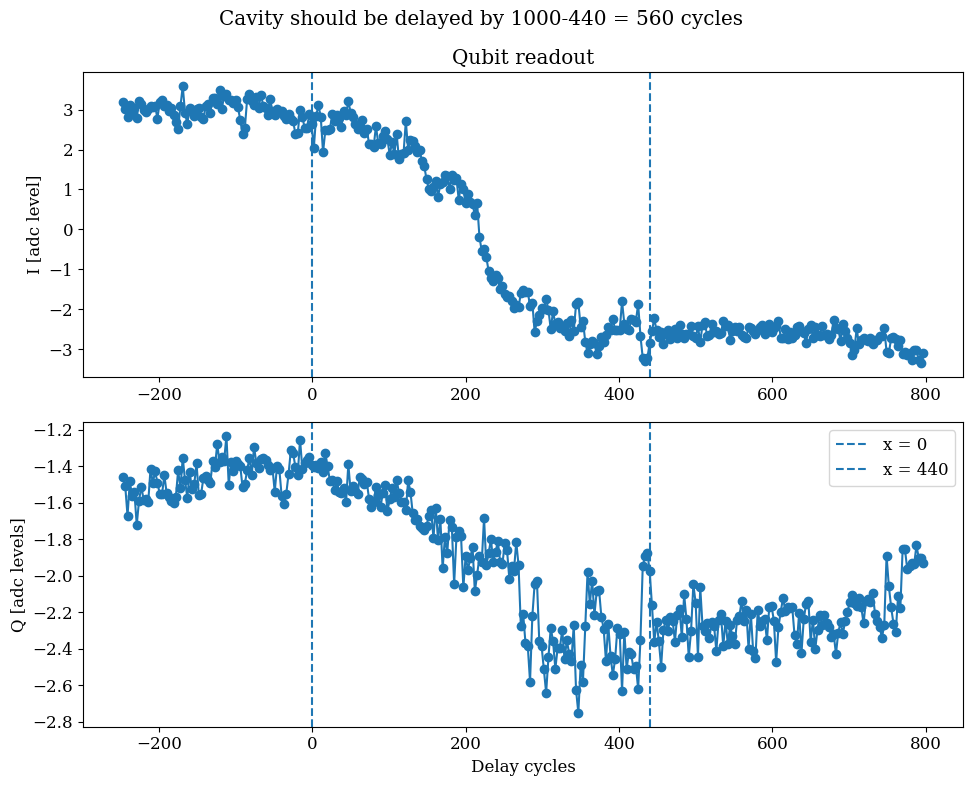

In [497]:
temp_data1, attrs1 = prev_data(expt_path, '00012_Cavity2QubitSweepExperiment.h5') 
C2Q_display(temp_data1, vlines=[-0,440])
# add labels to vertical lines x= 0 and x = 390
# plt.text(-0.5, 0.5, '0', rotation=90)
# plt.text(390, 0.5, '390', rotation=90)
# plt.show()


## Gain-displacement fitting

### Wigner Tomography of Vaccum State 
using single shot

#### manipulate 1

In [12]:
temp_data, attrs = prev_data(expt_path, '00046_ParityGainExperiment.h5')   # 32
# temp_data['confusion_matrix'] = [0.9866, 0.013399999999999967, 0.0327, 0.9673]

In [13]:
def bin_ss_data(temp_data, attrs, conf = True):
    '''
    Bin the single shot data into P(e)
    '''
    rounds = attrs['config']['expt']['rounds']
    reps = attrs['config']['expt']['reps']
    expts = attrs['config']['expt']['expts']

    I_data = temp_data['I_data']
    Q_data = temp_data['Q_data']

    # reshape data into (rounds * reps x expts)
    I_data = np.reshape(np.transpose(np.reshape(I_data, (rounds, expts, reps)), (0, 2, 1)), (rounds*reps, expts))
    Q_data = np.reshape(np.transpose(np.reshape(Q_data, (rounds, expts, reps)), (0, 2, 1)), (rounds*reps, expts))


    # rotate I,Q based on the angle calibration
    # theta = (-1*(float(temp_data['angle'])) - attrs['config']['device']['readout']['phase']) * np.pi/180 # to radians
    theta = 0
    I_data_rot = I_data*np.cos(theta) - Q_data*np.sin(theta)
    Q_data_rot = I_data*np.sin(theta) + Q_data*np.cos(theta)

    # threshold data
    shots = np.zeros((rounds*reps, expts))
    print(shots.shape)
    shots[I_data_rot > temp_data['thresholds']] = 1

    # average over rounds and reps
    shots_avg = np.mean(shots, axis=0)
    np.shape(shots_avg)

    # fix using confusion matrix 
    ydata = shots_avg
    if conf: 
        P_matrix = np.matrix([[temp_data['confusion_matrix'][0], temp_data['confusion_matrix'][2]],[temp_data['confusion_matrix'][1], temp_data['confusion_matrix'][3]]])
        for i in range(len(ydata)):
            #ydata_old.append(ydata[i])
            counts_new = inv(P_matrix)*np.matrix([[1-ydata[i]],[ydata[i]]])
            ydata[i] = counts_new[1,0]


    return ydata

Fit the data to the theoretical model

In [14]:
import numpy as np
from scipy.optimize import minimize
from scipy.interpolate import CubicSpline

def coherent_odd(alpha):
    return np.sinh(np.abs(alpha)**2)/np.exp(np.abs(alpha)**2)


# Step 1: Define the function
alpha_list = np.linspace(0, 3, 100)
ws = coherent_odd(alpha_list)

# Step 2: Choose data points
x = alpha_list  # 10 points from 0 to 10
y = ws

# Step 3: Create the cubic spline
# cs = CubicSpline(x, y)

# Assuming wigner_tomography_analysis and other necessary imports are defined
ydata = bin_ss_data(temp_data, attrs)
ydata_old = []
xdata = temp_data['xpts']   
#rescale data to be between 0 and 1
#ydata = (ydata - min(ydata))/(max(ydata) - min(ydata))
# invert data
# ydata = 1 - ydata
# rescale data to have max value of max(ws)
# ydata = ydata * max(ws)
# conf = True

# if conf:
#     P_matrix = np.matrix([[temp_data['confusion_matrix'][0], temp_data['confusion_matrix'][2]],[temp_data['confusion_matrix'][1], temp_data['confusion_matrix'][3]]])
#     for i in range(len(ydata)):
#         ydata_old.append(ydata[i])
#         counts_new = inv(P_matrix)*np.matrix([[1-ydata[i]],[ydata[i]]])
#         ydata[i] = counts_new[1,0]



# Objective function to fit data to wigner function curve 
def objective(param):
    gain_to_alpha = param[0]
    new_alpha_list = gain_to_alpha * xdata
    ws = coherent_odd(new_alpha_list)
    # print('gain_to_alpha:', gain_to_alpha)
    # print('objective:', np.sum(np.abs(ws - ydata)))
    # print('-----------------------------------')
    return np.sum(np.abs(ws - ydata))  # sum of absolute differences

# Initial guess for start and end of alpha_list
initial_guess = [0.0002]

# Bounds for start and end values of alpha_list
bounds = [(0, 0.001)]

# Run the optimizer
result = minimize(objective, initial_guess, bounds=bounds)

(1000, 100)


Conversion factor: 0.00014281
alpha = 1 requires gain of : 7002.38090558


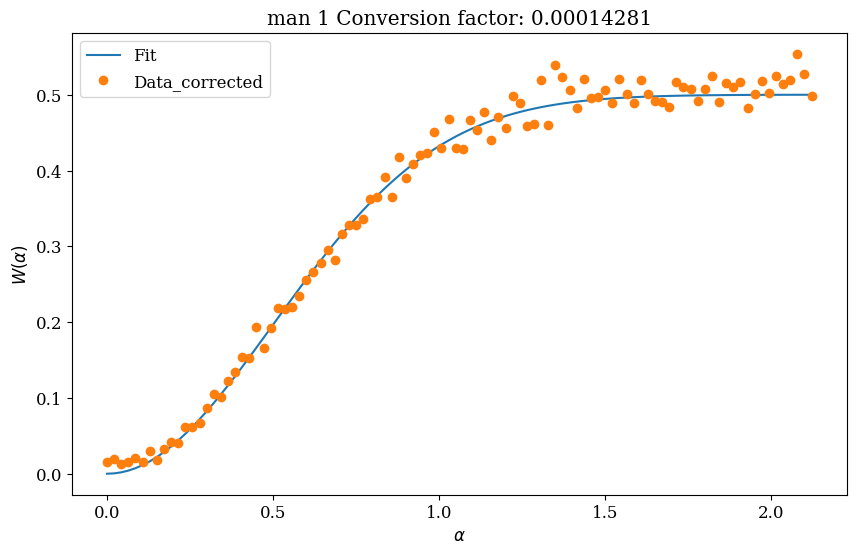

In [15]:
# plot the result 
gain_to_alpha = result.x[0]
new_alpha_list = gain_to_alpha * xdata
plt.plot(new_alpha_list, coherent_odd(new_alpha_list), '-', label='Fit')
plt.plot(new_alpha_list, ydata, 'o', label='Data_corrected')
#plt.plot(new_alpha_list, ydata_old, 'o', label='Data')

#label axes
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$W(\alpha)$')
plt.legend()
plt.title('man 1 Conversion factor: {:.8f}'.format(gain_to_alpha))
#gain_to_alpha = 0.00030837
print('Conversion factor: {:.8f}'.format(gain_to_alpha))
print('alpha = 1 requires gain of : {:.8f}'.format(1/gain_to_alpha))

In [269]:
1/0.000145

6896.551724137931

#### manipulate 2 

In [259]:
temp_data, attrs = prev_data(expt_path, '00039_ParityGainExperiment.h5')
# temp_data['confusion_matrix'] = [0.9866, 0.013399999999999967, 0.0327, 0.9673]

(1000, 100)
Conversion factor: 0.00020045
alpha = 1 requires gain of : 4988.79053313


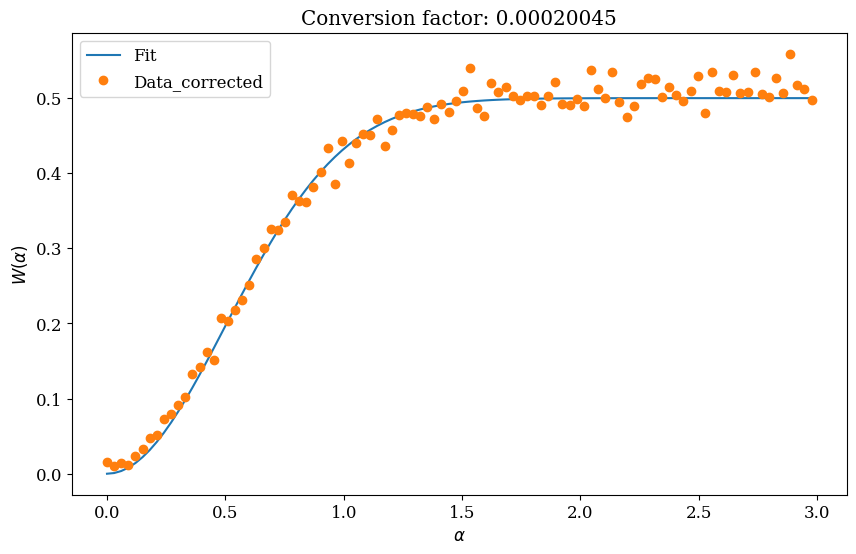

In [260]:
# Step 1: Define the function
alpha_list = np.linspace(0, 3, 100)
ws = coherent_odd(alpha_list)

# Step 2: Choose data points
x = alpha_list  # 10 points from 0 to 10
y = ws

# Step 3: Create the cubic spline
# cs = CubicSpline(x, y)

# Assuming wigner_tomography_analysis and other necessary imports are defined
ydata = bin_ss_data(temp_data, attrs)
ydata_old = []
xdata = temp_data['xpts']   
#rescale data to be between 0 and 1
#ydata = (ydata - min(ydata))/(max(ydata) - min(ydata))
# invert data
# ydata = 1 - ydata
# rescale data to have max value of max(ws)
# ydata = ydata * max(ws)
# conf = True

# if conf:
#     P_matrix = np.matrix([[temp_data['confusion_matrix'][0], temp_data['confusion_matrix'][2]],[temp_data['confusion_matrix'][1], temp_data['confusion_matrix'][3]]])
#     for i in range(len(ydata)):
#         ydata_old.append(ydata[i])
#         counts_new = inv(P_matrix)*np.matrix([[1-ydata[i]],[ydata[i]]])
#         ydata[i] = counts_new[1,0]



# Initial guess for start and end of alpha_list
initial_guess = [0.0002]

# Bounds for start and end values of alpha_list
bounds = [(0, 0.001)]

# Run the optimizer
result = minimize(objective, initial_guess, bounds=bounds)
# plot the result 
gain_to_alpha = result.x[0]
new_alpha_list = gain_to_alpha * xdata
plt.plot(new_alpha_list, coherent_odd(new_alpha_list), '-', label='Fit')
plt.plot(new_alpha_list, ydata, 'o', label='Data_corrected')
# plt.plot(new_alpha_list, ydata_corr, 'o', label='Data')

#label axes
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$W(\alpha)$')
plt.legend()
plt.title('Conversion factor: {:.8f}'.format(gain_to_alpha))
print('Conversion factor: {:.8f}'.format(gain_to_alpha))
print('alpha = 1 requires gain of : {:.8f}'.format(1/gain_to_alpha))

### Photon Resolved Qubit Spectroscopy

#### manipulate 1

h:\Shared drives\multimode\Multimode\experiment\240624\data\00243_gain_displace_sweep.h5
[0.14019953819047087, -0.18002513765201605, 0.8087644111023329, 4.83069146997386]
[0.04663446492955099, 0.07429038409486499, 0.2271539437207951, 0.08333025705713305]


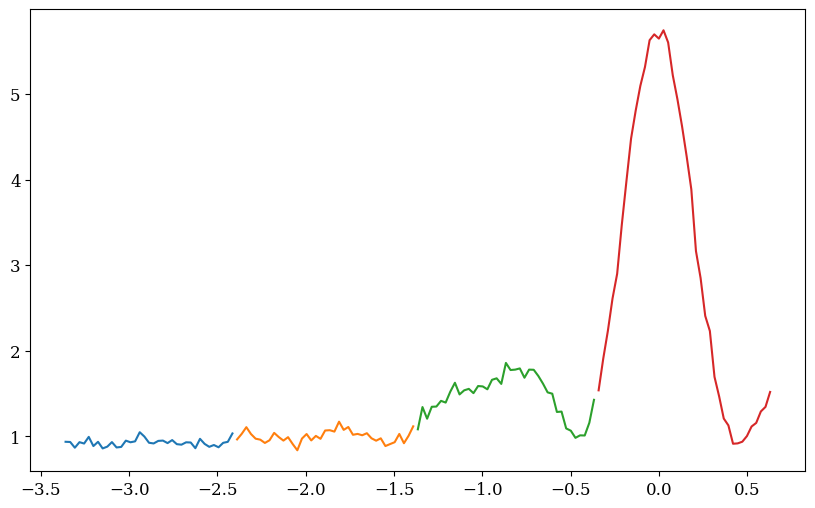

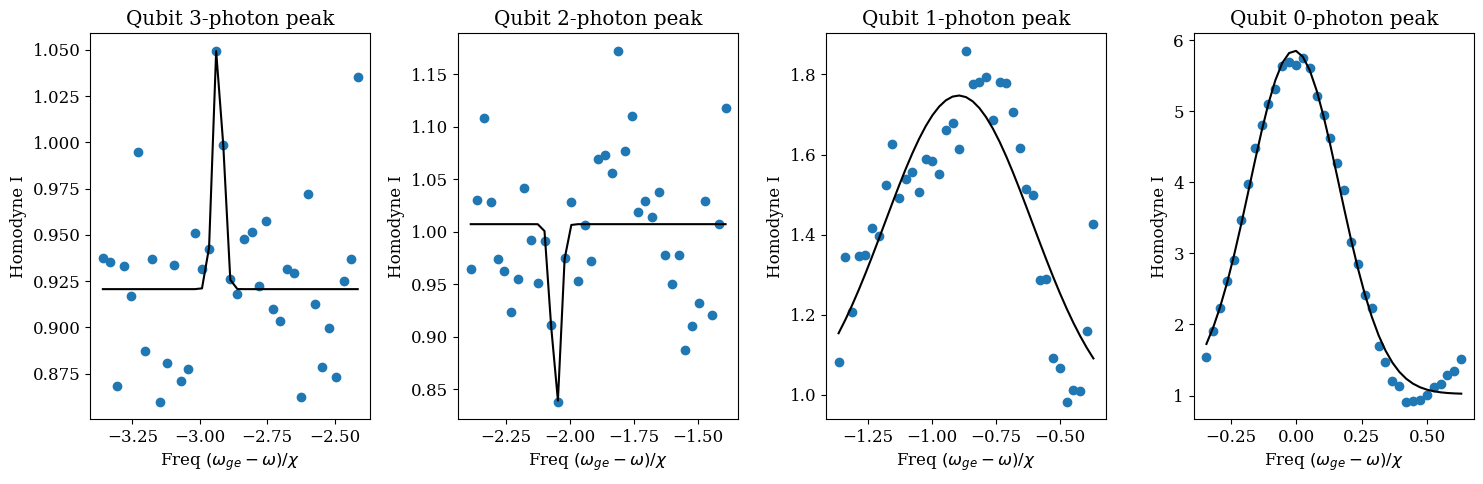

In [86]:
expt_name = 'gain_displace_sweep'
filelist = np.array(list(np.arange(243,244,1)))
# filelist = np.array(list(np.arange(239,259,1)))
#filelist = np.array([0])
gain_list = np.arange(0,6000,300)
qubit_ge = 3566.4228027506
chi = 0.28584758549050093

plt_data = True # Set to False if you don't want to plot stuff, to make the processing go faster when going over many files

peak_sweep = [] # SAVE the peak-voltage values for the STORAGE-GAIN SWEEP
freq_sweep = [] # SAVE the peak_freq values for the STORAGE-GAIN SWEEP

for ii, i in enumerate(filelist):
    filename = expt_path +'\\' + str(i).zfill(5) + "_"+expt_name.lower()+".h5"
    with File(filename,'r') as f:

        xdata = np.array(f['xpts'])
        ydata = np.array(f['avgi'])
        f.close()
    
    x_norm = []
    for ii in xdata:
        x_norm.append((ii-qubit_ge)/chi)
    x = np.array(x_norm)
    y = ydata 
    
    ## Separate the data
    separation_marker = [[35, 72], [72, 111], [111, 150], [150, 188]]
    phot_number = [3,2,1,0] # UPDATE: photon number corresponding to each window
    
    print(filename)
    if plt_data:
        plt.figure()
        for ii in separation_marker:
            plt.plot(x[ii[0]:ii[1]],y[ii[0]:ii[1]])
    
    N=1
    p1_saved = []
    p2_saved = []
    area_total = 0

    if plt_data:
    
        fig, ax = plt.subplots(1, len(separation_marker), figsize = (15,5))
    
    for ii in range(len(separation_marker)):
        xnow = x[separation_marker[ii][0]:separation_marker[ii][1]]
        ynow = y[separation_marker[ii][0]:separation_marker[ii][1]]
        fitparams = np.zeros(4)
        fitparams[0] = ynow[0]
        fitparams[1] = max(ynow)-fitparams[0]
        fitparams[2] = -(3-ii)
        fitparams[3] = 0.1
        
        " Fit the gaussian peaks "
        p1, p2 = fitgausssum_with_baseline(xnow, ynow, fitparams=fitparams)
        
        if plt_data:
            ax1 = ax[ii]
            ax1.set_title(f'Qubit {phot_number[ii]}-photon peak')
            ax1.plot(xnow, ynow, 'o', label='data')
            ax1.plot(xnow, gaussfuncsum_with_baseline(xnow, *p1), 'k', label='fit')

            ax1.set_ylabel('Homodyne I', fontsize = 12)
            ax1.set_xlabel(r'Freq $(\omega_{ge}-\omega) / \chi $', fontsize = 12)
            

            plt.tight_layout()
        p1_saved.append(p1)
        p2_saved.append(p2)
    
        
    peak_val, freq_val, peak_val_err, freq_val_err = fitamp_new(p1_saved, p2_saved)    
    print(peak_val)
    print(peak_val_err)
    # a, a_err = fitcoherentstate(peak_val)
    
    peak_sweep.append(peak_val)
    freq_sweep.append(freq_val)

peak_sweep = array(peak_sweep)
freq_sweep = array(freq_sweep)

In [87]:
peak_sweep = np.array([[ 4.61189687e-02,  1.18651256e-01, -3.69867976e-01,
         5.50490849e+00],
       [ 4.70307988e-02,  1.32408106e-01, -3.34446866e-01,
         5.48989212e+00],
       [0.04206026168700992, -0.06879877394936477, -0.20127710934412588, 5.381512716475611],
       [-6.51507176e-02,  1.05924125e-01,  4.75691674e-02,
         5.16571081e+00],
       [0.14019953819047087, -0.18002513765201605, 0.8087644111023329, 4.83069146997386],
       [-1.15995446e-01,  1.76545206e-01,  1.54307933e+00,
         4.61270785e+00],
       [-1.18627646e-02,  2.51682443e-01,  1.95406839e+00,
         4.23489225e+00],
       [ 9.93013997e-02,  3.88754705e-01,  1.76113285e+00,
         3.72435225e+00],
       [ 1.15435887e-01,  7.36196464e-01,  1.88709183e+00,
         3.33674389e+00],
       [ 3.17984878e-01,  8.09887701e-01,  2.04536637e+00,
         2.98198287e+00],
       [ 2.19184755e-01,  1.13992570e+00,  2.09280654e+00,
         2.54560426e+00],
       [ 4.50726210e-01,  1.03803676e+00,  2.12207349e+00,
         2.06948866e+00],
       [ 3.93959517e-01,  1.36204629e+00,  1.99695905e+00,
         1.80567360e+00],
       [ 7.79579557e-01,  1.35781823e+00,  2.01570401e+00,
         1.48581300e+00],
       [ 8.71073867e-01,  1.48904562e+00,  1.90687590e+00,
         1.17911927e+00],
       [ 9.00228243e-01,  1.48734912e+00,  1.68238593e+00,
         9.67692658e-01],
       [ 1.09604249e+00,  1.55561475e+00,  1.46882042e+00,
         7.63086499e-01],
       [ 1.12723619e+00,  1.48938459e+00,  1.33400078e+00,
         5.55351126e-01],
       [ 1.20527833e+00,  1.38082866e+00,  1.12881122e+00,
         4.12266942e-01],
       [ 1.27690728e+00,  1.26867917e+00,  8.73157546e-01,
         3.14094083e-01]])

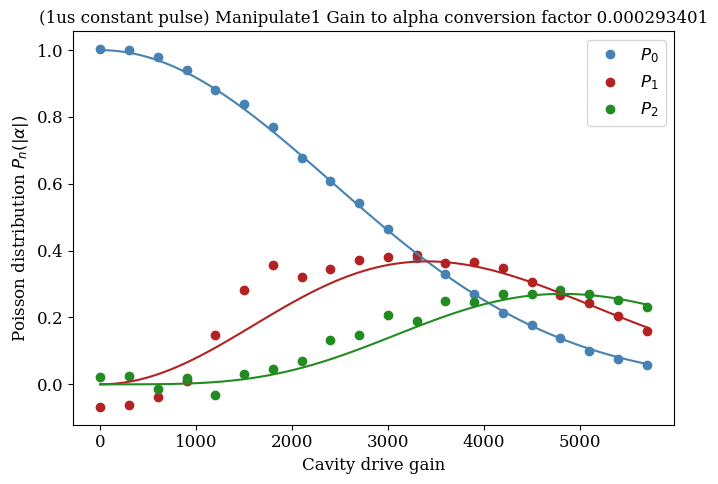

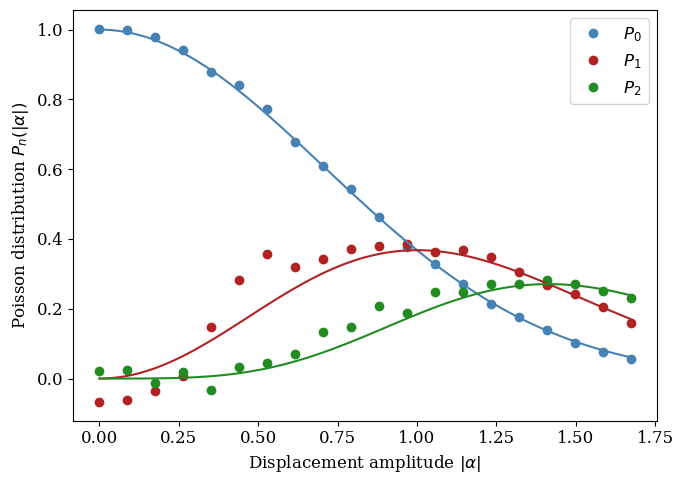

In [88]:
P0 = peak_sweep[:,3]
P1 = peak_sweep[:,2]
P2 = peak_sweep[:,1]
P3 = peak_sweep[:,0]
# P4 = peak_sweep[:,0]
Pnorm = P0[1]

fig, ax = plt.subplots(figsize = [7,5])

plt.plot(gain_list[0::], P0[0::]/Pnorm, 'o', color = 'steelblue', markersize = 6, label = r'$P_0$')
plt.plot(gain_list[0::], P1[0::]/Pnorm, 'o', color = 'firebrick', markersize = 6, label = r'$P_1$')
plt.plot(gain_list[0::], P2[0::]/Pnorm, 'o', color = 'forestgreen', markersize = 6, label = r'$P_2$')
# plt.plot(gain_list[5::], P3[5::]/Pnorm, 'o', color = 'orange', markersize = 6, label = r'$P_3$')
# plt.plot(gain_list[5::], P4[5::]/Pnorm, 'o', color = 'indigo', markersize = 6, label = r'$P_4$')

plt.xlabel(r'Cavity drive gain', fontsize = 12)
plt.ylabel(r'Poisson distribution $P_n(|\alpha|)$', fontsize = 12)

plt.legend()

"""
Poisson distrib fitting
HELPS to rescale the gain by 1/1000, dealing with larger values of x makes curve ftting harder
"""
n=0
gain_rescale = 1e3
params_p0, covs =curve_fit(lambda x,c: Pn_poisson(x,c,n), gain_list/gain_rescale, P0/Pnorm)

V_to_alpha =  np.abs(params_p0[0]) / gain_rescale
gain_fit = np.linspace(gain_list[0], gain_list[-1], 101)
P0_fit = Pn_poisson(gain_fit, V_to_alpha, n=0)
P1_fit = Pn_poisson(gain_fit, V_to_alpha, n=1)
P2_fit = Pn_poisson(gain_fit, V_to_alpha, n=2)
# P3_fit = Pn_poisson(gain_fit, V_to_alpha, n=3)
# P4_fit = Pn_poisson(gain_fit, V_to_alpha, n=4)

plt.plot(gain_fit, P0_fit, '-', color = 'steelblue')
plt.plot(gain_fit, P1_fit, '-', color = 'firebrick')
plt.plot(gain_fit, P2_fit, '-', color = 'forestgreen')
# plt.plot(gain_fit, P3_fit, '-', color = 'orange')
# plt.plot(gain_fit, P4_fit, '-', color = 'indigo')

plt.title(f'(1us constant pulse) Manipulate1 Gain to alpha conversion factor {round(V_to_alpha,9)}', fontsize = 12)
plt.tight_layout()

fig, ax = plt.subplots(figsize = [7,5])

plt.plot(gain_list[0::]*V_to_alpha, P0[0::]/Pnorm, 'o', color = 'steelblue', markersize = 6, label = r'$P_0$')
plt.plot(gain_list[0::]*V_to_alpha, P1[0::]/Pnorm, 'o', color = 'firebrick', markersize = 6, label = r'$P_1$')
plt.plot(gain_list[0::]*V_to_alpha, P2[0::]/Pnorm, 'o', color = 'forestgreen', markersize = 6, label = r'$P_2$')
# plt.plot(gain_list[5::]*V_to_alpha, P3[5::]/Pnorm, 'o', color = 'orange', markersize = 6, label = r'$P_3$')
# plt.plot(gain_list[5::]*V_to_alpha, P4[5::]/Pnorm, 'o', color = 'indigo', markersize = 6, label = r'$P_4$')

plt.plot(gain_fit*V_to_alpha, P0_fit, '-', color = 'steelblue')
plt.plot(gain_fit*V_to_alpha, P1_fit, '-', color = 'firebrick')
plt.plot(gain_fit*V_to_alpha, P2_fit, '-', color = 'forestgreen')
# plt.plot(gain_fit*V_to_alpha, P3_fit, '-', color = 'orange')
# plt.plot(gain_fit*V_to_alpha, P4_fit, '-', color = 'indigo')

plt.xlabel(r'Displacement amplitude $|\alpha|$', fontsize = 12)
plt.ylabel(r'Poisson distribution $P_n(|\alpha|)$', fontsize = 12)

plt.legend()
plt.tight_layout()

#### manipulate 2

In [55]:
expt_name = 'gain_displace_sweep'
filelist = np.array(list(np.arange(219,239,1)))
#filelist = np.array([0])
gain_list = np.arange(0,6000,300)
qubit_ge = 3566.4228027506
chi = 0.2671571951655096

plt_data = False # Set to False if you don't want to plot stuff, to make the processing go faster when going over many files

peak_sweep = [] # SAVE the peak-voltage values for the STORAGE-GAIN SWEEP
freq_sweep = [] # SAVE the peak_freq values for the STORAGE-GAIN SWEEP

for ii, i in enumerate(filelist):
    filename = expt_path +'\\' + str(i).zfill(5) + "_"+expt_name.lower()+".h5"
    with File(filename,'r') as f:

        xdata = np.array(f['xpts'])
        ydata = np.array(f['avgi'])
        f.close()
    
    x_norm = []
    for ii in xdata:
        x_norm.append((ii-qubit_ge)/chi)
    x = np.array(x_norm)
    y = ydata 
    
    ## Separate the data
    separation_marker = [[35, 76], [76, 111], [111, 147], [147, 188]]
    phot_number = [3,2,1,0] # UPDATE: photon number corresponding to each window
    
    print(filename)
    if plt_data:
        plt.figure()
        for ii in separation_marker:
            plt.plot(x[ii[0]:ii[1]],y[ii[0]:ii[1]])
    
    N=1
    p1_saved = []
    p2_saved = []
    area_total = 0

    if plt_data:
    
        fig, ax = plt.subplots(1, len(separation_marker), figsize = (15,5))
    
    for ii in range(len(separation_marker)):
        xnow = x[separation_marker[ii][0]:separation_marker[ii][1]]
        ynow = y[separation_marker[ii][0]:separation_marker[ii][1]]
        fitparams = np.zeros(4)
        fitparams[0] = ynow[0]
        fitparams[1] = max(ynow)-fitparams[0]
        fitparams[2] = -(3-ii)
        fitparams[3] = 0.1
        
        " Fit the gaussian peaks "
        p1, p2 = fitgausssum_with_baseline(xnow, ynow, fitparams=fitparams)
        
        if plt_data:
            ax1 = ax[ii]
            ax1.set_title(f'Qubit {phot_number[ii]}-photon peak')
            ax1.plot(xnow, ynow, 'o', label='data')
            ax1.plot(xnow, gaussfuncsum_with_baseline(xnow, *p1), 'k', label='fit')

            ax1.set_ylabel('Homodyne I', fontsize = 12)
            ax1.set_xlabel(r'Freq $(\omega_{ge}-\omega) / \chi $', fontsize = 12)
            

            plt.tight_layout()
        p1_saved.append(p1)
        p2_saved.append(p2)
    
        
    peak_val, freq_val, peak_val_err, freq_val_err = fitamp_new(p1_saved, p2_saved)    
    print(peak_val)
    print(peak_val_err)
    # a, a_err = fitcoherentstate(peak_val)
    
    peak_sweep.append(peak_val)
    freq_sweep.append(freq_val)

peak_sweep = array(peak_sweep)
freq_sweep = array(freq_sweep)

h:\Shared drives\multimode\Multimode\experiment\240624\data\00219_gain_displace_sweep.h5
[-167.34667518509798, 0.16127556446082558, -0.40438926334235464, 5.466266313671379]
[2156866.418491893, 0.029544470608713656, 0.09359794195238616, 0.09491562788276045]
h:\Shared drives\multimode\Multimode\experiment\240624\data\00220_gain_displace_sweep.h5
[0.0631834329570422, 0.11949805183103826, -0.3479257003310157, 5.41095154975557]
[0.03078123357965566, 0.02163902347818022, 0.09747928634179667, 0.09890261051368228]
h:\Shared drives\multimode\Multimode\experiment\240624\data\00221_gain_displace_sweep.h5
[0.04234059122039936, 0.10168095436270351, 0.6455173574171015, 5.173675598705463]
[0.03583343181463321, 0.025472799404826513, 0.04848287614880608, 0.0867750729838033]
h:\Shared drives\multimode\Multimode\experiment\240624\data\00222_gain_displace_sweep.h5
[0.09179318689348646, 0.09493125717310184, 0.811137878135059, 4.862592017092748]
[1.1281979723663433, 0.024577722105339265, 0.06215308319735792

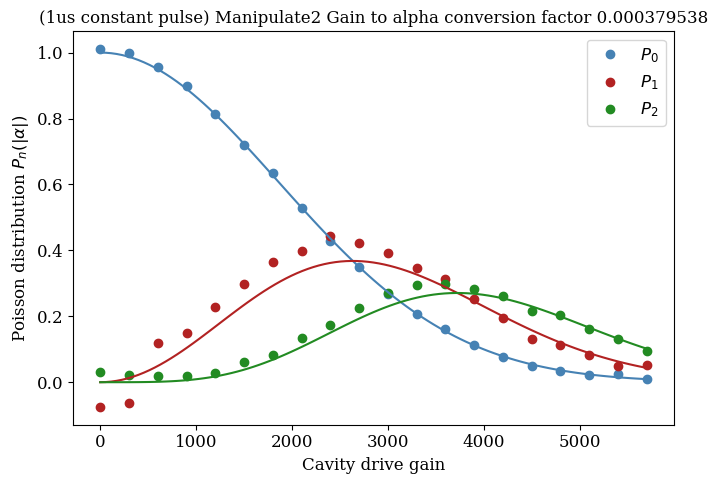

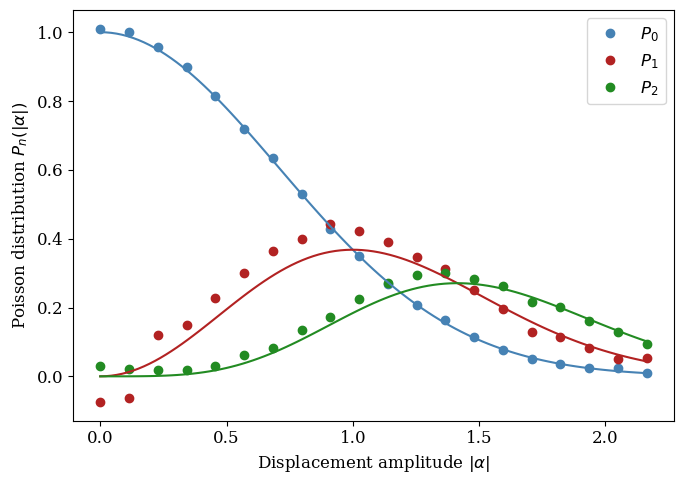

In [61]:
P0 = peak_sweep[:,3]
P1 = peak_sweep[:,2]
P2 = peak_sweep[:,1]
P3 = peak_sweep[:,0]
# P4 = peak_sweep[:,0]
Pnorm = P0[1]

fig, ax = plt.subplots(figsize = [7,5])

plt.plot(gain_list[0::], P0[0::]/Pnorm, 'o', color = 'steelblue', markersize = 6, label = r'$P_0$')
plt.plot(gain_list[0::], P1[0::]/Pnorm, 'o', color = 'firebrick', markersize = 6, label = r'$P_1$')
plt.plot(gain_list[0::], P2[0::]/Pnorm, 'o', color = 'forestgreen', markersize = 6, label = r'$P_2$')
# plt.plot(gain_list[5::], P3[5::]/Pnorm, 'o', color = 'orange', markersize = 6, label = r'$P_3$')
# plt.plot(gain_list[5::], P4[5::]/Pnorm, 'o', color = 'indigo', markersize = 6, label = r'$P_4$')

plt.xlabel(r'Cavity drive gain', fontsize = 12)
plt.ylabel(r'Poisson distribution $P_n(|\alpha|)$', fontsize = 12)

plt.legend()

"""
Poisson distrib fitting
HELPS to rescale the gain by 1/1000, dealing with larger values of x makes curve ftting harder
"""
n=0
gain_rescale = 1e3
params_p0, covs =curve_fit(lambda x,c: Pn_poisson(x,c,n), gain_list/gain_rescale, P0/Pnorm)

V_to_alpha =  np.abs(params_p0[0]) / gain_rescale
gain_fit = np.linspace(gain_list[0], gain_list[-1], 101)
P0_fit = Pn_poisson(gain_fit, V_to_alpha, n=0)
P1_fit = Pn_poisson(gain_fit, V_to_alpha, n=1)
P2_fit = Pn_poisson(gain_fit, V_to_alpha, n=2)
# P3_fit = Pn_poisson(gain_fit, V_to_alpha, n=3)
# P4_fit = Pn_poisson(gain_fit, V_to_alpha, n=4)

plt.plot(gain_fit, P0_fit, '-', color = 'steelblue')
plt.plot(gain_fit, P1_fit, '-', color = 'firebrick')
plt.plot(gain_fit, P2_fit, '-', color = 'forestgreen')
# plt.plot(gain_fit, P3_fit, '-', color = 'orange')
# plt.plot(gain_fit, P4_fit, '-', color = 'indigo')

plt.title(f'(1us constant pulse) Manipulate2 Gain to alpha conversion factor {round(V_to_alpha,9)}', fontsize = 12)
plt.tight_layout()

fig, ax = plt.subplots(figsize = [7,5])

plt.plot(gain_list[0::]*V_to_alpha, P0[0::]/Pnorm, 'o', color = 'steelblue', markersize = 6, label = r'$P_0$')
plt.plot(gain_list[0::]*V_to_alpha, P1[0::]/Pnorm, 'o', color = 'firebrick', markersize = 6, label = r'$P_1$')
plt.plot(gain_list[0::]*V_to_alpha, P2[0::]/Pnorm, 'o', color = 'forestgreen', markersize = 6, label = r'$P_2$')
# plt.plot(gain_list[5::]*V_to_alpha, P3[5::]/Pnorm, 'o', color = 'orange', markersize = 6, label = r'$P_3$')
# plt.plot(gain_list[5::]*V_to_alpha, P4[5::]/Pnorm, 'o', color = 'indigo', markersize = 6, label = r'$P_4$')

plt.plot(gain_fit*V_to_alpha, P0_fit, '-', color = 'steelblue')
plt.plot(gain_fit*V_to_alpha, P1_fit, '-', color = 'firebrick')
plt.plot(gain_fit*V_to_alpha, P2_fit, '-', color = 'forestgreen')
# plt.plot(gain_fit*V_to_alpha, P3_fit, '-', color = 'orange')
# plt.plot(gain_fit*V_to_alpha, P4_fit, '-', color = 'indigo')

plt.xlabel(r'Displacement amplitude $|\alpha|$', fontsize = 12)
plt.ylabel(r'Poisson distribution $P_n(|\alpha|)$', fontsize = 12)

plt.legend()
plt.tight_layout()

## Parity Mapping witha ctive reset 

489
492
494
489
494
485
486
493
491
486
490
491
492
488
481
490
492
493
496
490
492
491
490
490
493
486
494
482
489
488
490
482
486
485
490
483
492
493
494
489
489
489
494
490
487
488
492
495
492
488
486
488
493
486
487
495
490
488
493
492
489
494
492
491
492
492
487
490
491
483
487
495
485
490
490
491
495
490
495
495
485
492
486
492
492
491
494
491
498
494
490
491
497
490
486
492
490
493
491
Attempted to init fitparam 4 to -0.7986312663625954, which is out of bounds 15.189517625231911 to 17.83789663944303. Instead init to 16.513707132337473
[ 12.46170402   0.2884808  -76.76377999 181.65749469  -0.73814757
   2.5075532 ]
Decay from avgi [us] 181.65749469396454
Rate [MHz] 0.28848079959423184
Pi length from avgi data [us]: 1.6057662167904558
	Pi/2 length from avgi data [us]: 0.8028831083952279
Fit params:  [ 12.46170402   0.2884808  -76.76377999 181.65749469  -0.73814757
   2.5075532 ]

Decay from avgq [us] 3.8583220231141295
Rate [MHz] 0.27805499466111655
Pi length from avgq data [us]: 

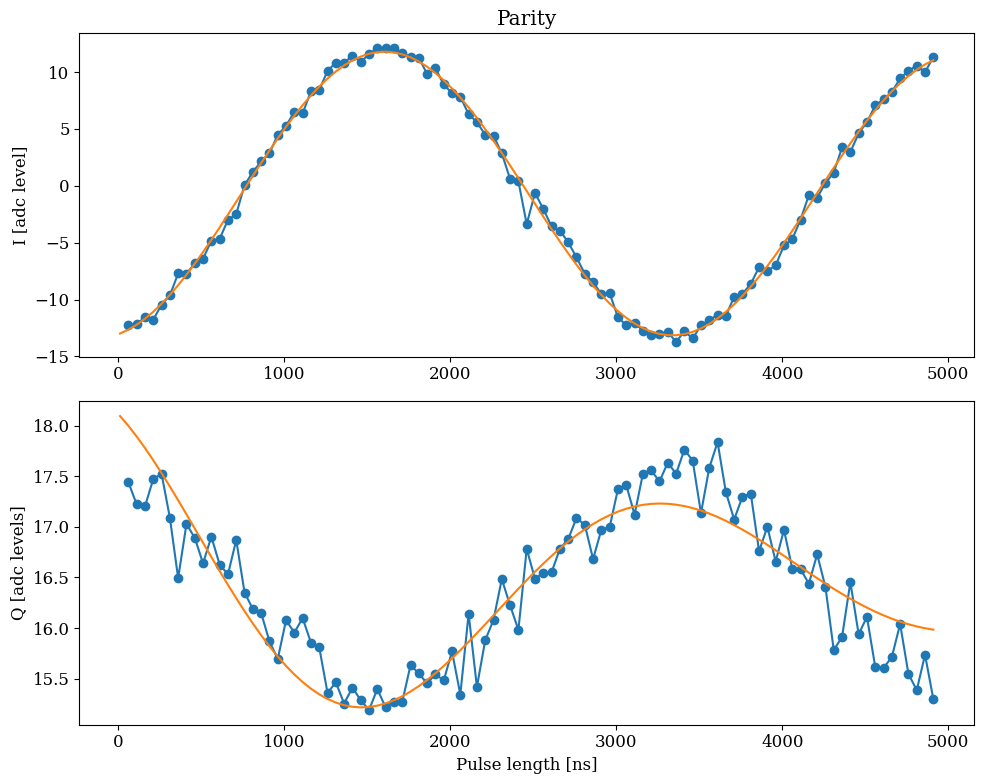

In [79]:
temp_data, attrs = prev_data(expt_path, '00030_ParityDelayExperiment.h5')
parity_display(temp_data, fit=True, fitparams=[13, 0.1, None, None, None, None], active_reset=True,threshold=-4.3, readout_per_round=4,)
                     #title='sideband at '+str(attrs['config']['expt']['flux_drive'][1])+'MHz')

In [178]:
temp_data1, attrs = prev_data(expt_path, '00057_ParityDelayExperiment.h5')  # no reset
temp_data2, attrs2 = prev_data(expt_path, '00056_ParityDelayExperiment.h5')  # with storage reset
# temp_data2, attrs = prev_data(expt_path, '00034_ParityDelayExperiment.h5')   # with reset  30
temp_data3, attrs3 = prev_data(expt_path, '00055_ParityDelayExperiment.h5')   # with no reset storage
# temp_data4, attrs = prev_data(expt_path, '00037_ParityDelayExperiment.h5')   # with reset storage1 only
# parity_mapping_display(temp_data, fit=True, fitparams=[15, 0.1, None, None, None, None], title='parity mapping |1>')

In [179]:
Ilist1 = []
Qlist1 = []
for ii in range(len(temp_data1['idata'])-1):
    Ig, Qg = temp_data1['idata'][ii], temp_data1['qdata'][ii] #filter_data_IQ(temp_data1['idata'][ii], temp_data1['qdata'][ii], 1000, readout_per_experiment=4)
    Ilist1.append(np.mean(Ig))
    Qlist1.append(np.mean(Qg))

Ilist2 = []
Qlist2 = []
for ii in range(len(temp_data2['idata'])-1):
    Ig, Qg = filter_data_IQ(temp_data2['idata'][ii], temp_data2['qdata'][ii], -3.8, readout_per_experiment=4)
    Ilist2.append(np.mean(Ig))
    Qlist2.append(np.mean(Qg))

Ilist3 = []
Qlist3 = []
for ii in range(len(temp_data3['idata'])-1):
    Ig, Qg = filter_data_IQ(temp_data3['idata'][ii], temp_data3['qdata'][ii], -3.8, readout_per_experiment=4)
    Ilist3.append(np.mean(Ig))
    Qlist3.append(np.mean(Qg))


In [181]:
a = [1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300, 400, 700, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]
b = [1000, 1000, 1000, 1000, 2000, 2000, 3000, 3000, 3000, 3000, 3000, 5000, 10000, 10000, 10000, 10000, 15000, 15000, 15000, 20000, 20000]
for idx in range(len(a)):
    print(a[idx], b[idx])

1 1000
5 1000
10 1000
20 1000
40 2000
80 2000
120 3000
160 3000
200 3000
250 3000
300 3000
400 5000
700 10000
1000 10000
1500 10000
2000 10000
2500 15000
3000 15000
3500 15000
4000 20000
4500 20000


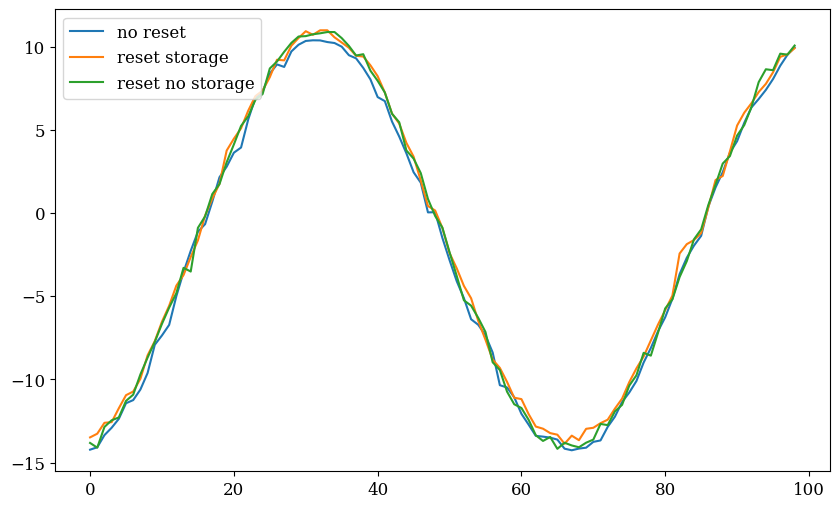

In [180]:
plt.plot(Ilist1, label='no reset')
plt.plot(Ilist2, label='reset storage')
plt.plot(Ilist3, label='reset no storage')
plt.legend()

In [146]:
# for each time, post select the single shot data
Ilist = []
Qlist = []
for ii in range(len(temp_data2['idata'])-1):
    Ig, Qg = filter_data_IQ(temp_data2['idata'][ii], temp_data2['qdata'][ii], -3.8, readout_per_experiment=4)
    Ilist.append(np.mean(Ig))
    Qlist.append(np.mean(Qg))

Ilist1 = []
Qlist1 = []
for ii in range(len(temp_data3['idata'])-1):
    Ig, Qg = filter_data_IQ(temp_data3['idata'][ii], temp_data3['qdata'][ii], -3.8, readout_per_experiment=4)
    Ilist1.append(np.mean(Ig))
    Qlist1.append(np.mean(Qg))

Ilist2 = []
Qlist2 = []
for ii in range(len(temp_data4['idata'])-1):
    Ig, Qg = filter_data_IQ(temp_data4['idata'][ii], temp_data4['qdata'][ii], -3.8, readout_per_experiment=4)
    Ilist2.append(np.mean(Ig))
    Qlist2.append(np.mean(Qg))

Ilist3 = []
Qlist3 = []
temp_data, attrs = prev_data(expt_path, '00038_ParityDelayExperiment.h5')
for ii in range(len(temp_data['idata'])-1):
    Ig, Qg = filter_data_IQ(temp_data['idata'][ii], temp_data['qdata'][ii], -3.8, readout_per_experiment=4)
    Ilist3.append(np.mean(Ig))
    Qlist3.append(np.mean(Qg))

Ilist4 = []
Qlist4 = []
temp_data, attrs = prev_data(expt_path, '00040_ParityDelayExperiment.h5')
for ii in range(len(temp_data['idata'])-1):
    Ig, Qg = filter_data_IQ(temp_data['idata'][ii], temp_data['qdata'][ii], -3.8, readout_per_experiment=4)
    Ilist4.append(np.mean(Ig))
    Qlist4.append(np.mean(Qg))

1977
1970
1979
1984
1981
1976
1987
1979
1981
1980
1978
1978
1979
1976
1977
1974
1986
1972
1978
1982
1983
1977
1979
1980
1976
1972
1981
1975
1974
1978
1977
1982
1977
1973
1971
1963
1973
1967
1973


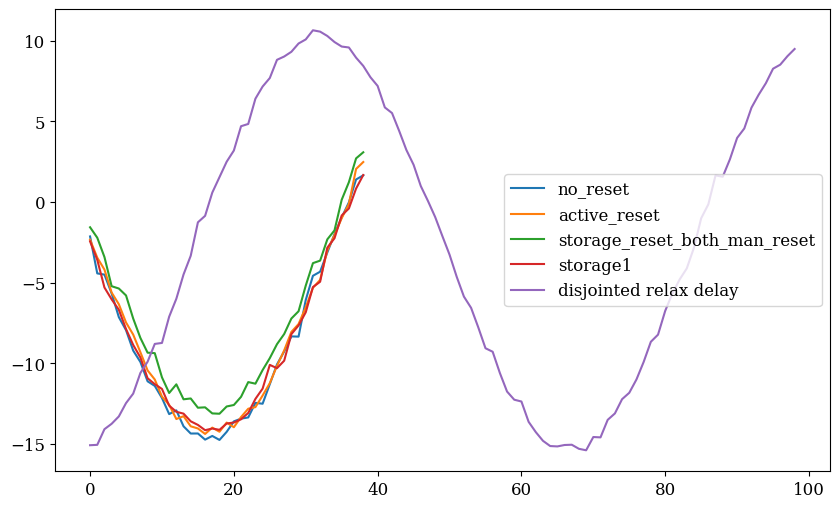

In [143]:
file_list = np.arange(41, 46,1)
file_list = [41, 42, 43, 45, 46]
file_list = [41, 42, 44, 49, 52]
I_list = []
Q_list = []
#labels = ['no_reset', 'active_reset', 'storage_reset', 'storage_reset_with_post_man_reset', 'storage_reset_both_man_reset']
labels = ['no_reset', 'active_reset',  'storage_reset_both_man_reset', 'storage1', 'disjointed relax delay']#'shortening man_reset']
for idx, file_no in enumerate(file_list): 
    temp_data, attrs = prev_data(expt_path, str(file_no).zfill(5)+'_ParityDelayExperiment.h5')
    I_list_f = []
    Q_list_f = []
    for ii in range(len(temp_data['idata'])-1):
        if labels[idx] == 'no_reset':
            Ig, Qg = temp_data['idata'][ii], temp_data['qdata'][ii]
            
        else: 
            Ig, Qg = filter_data_IQ(temp_data['idata'][ii], temp_data['qdata'][ii], -3.8, readout_per_experiment=4)
        if idx == 3:
            print(len(Ig))
        I_list_f.append(np.mean(Ig))
        Q_list_f.append(np.mean(Qg))
    I_list.append(I_list_f)
    Q_list.append(Q_list_f)

    plt.plot(I_list_f, label=labels[idx])
plt.legend()
    

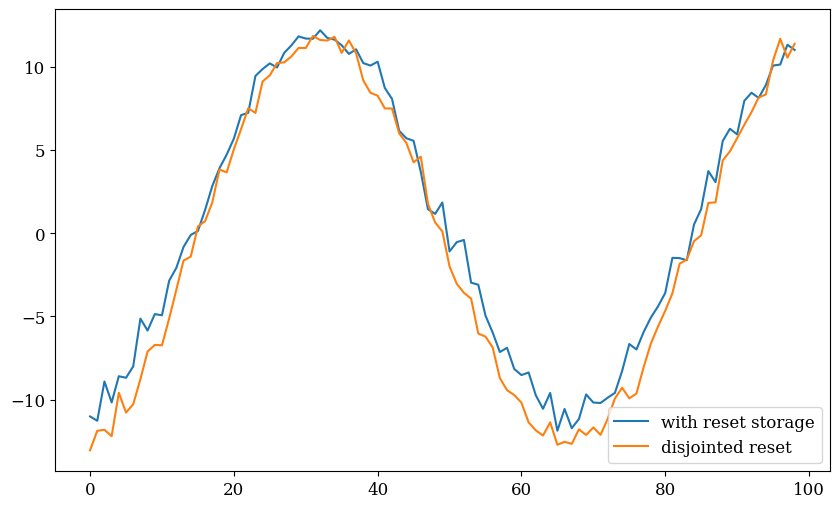

In [148]:
# plt.plot(Ilist, label='with reset')
plt.plot(Ilist1, label='with reset storage')
plt.plot(Ilist2, label='disjointed reset')
# plt.plot(Ilist3, label='storage1-5 reset')
# plt.plot(Ilist4, label='storage6-7 reset witha dditional man1 reset')

# plt.plot(temp_data1['avgi'], label='no reset')
plt.legend()

## Parity mapping check

Attempted to init fitparam 4 to 4.0489329004328996, which is out of bounds -398.1342272727273 to -349.07376298701297. Instead init to -373.6039951298701
Attempted to init fitparam 4 to -373.6039951298701, which is out of bounds 368.20879261559844 to 460.1087002065742. Instead init to 414.1587464110863
Decay from avgi [us] 55.70496387122631
Pi length from avgi data [us]: 1.5152791033199167
	Pi/2 length from avgi data [us]: 0.7576395516599583

Decay from avgq [us] 3.564667890228106
Pi length from avgq data [us]: 1.4697340696378571
Pi/2 length from avgq data [us]: 0.7348670348189286


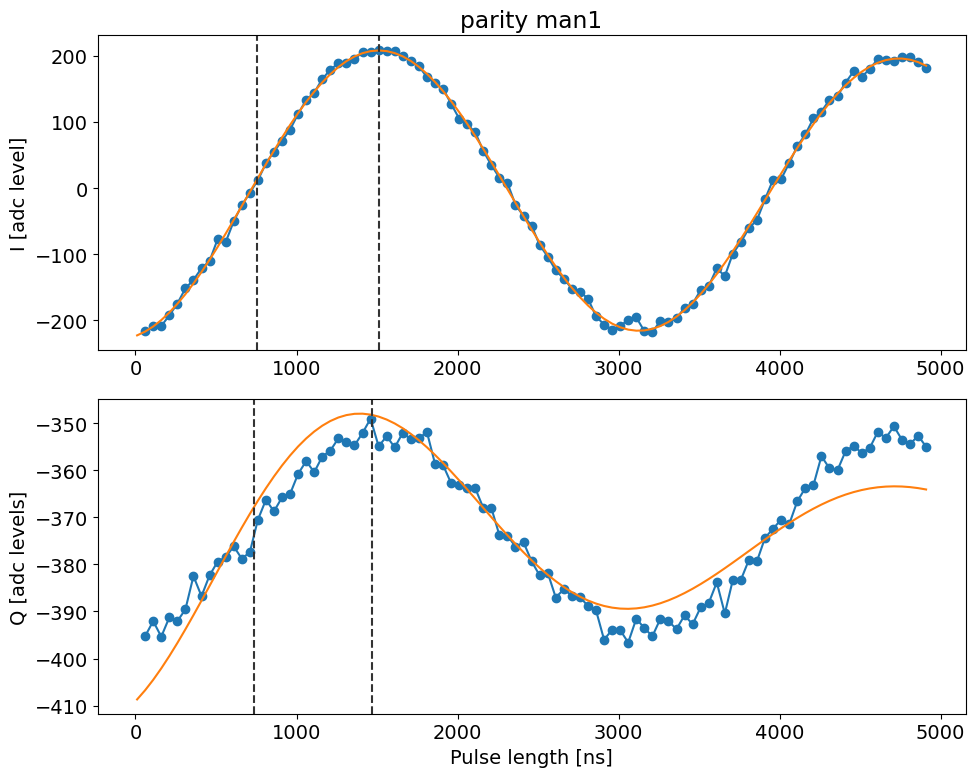

In [11]:
temp_data, attrs = prev_data(expt_path, '00001_ParityDelayExperiment.h5')
parity_mapping_display(temp_data, fit=True, fitparams=[300, 0.1, None, None, None, None], title='parity man1')

Attempted to init fitparam 4 to -3.0509041387905023, which is out of bounds 15.372060064935065 to 17.08169642857143. Instead init to 16.226878246753248
Decay from avgi [us] 42.0332458502364
Pi length from avgi data [us]: 1.7366205852286094
	Pi/2 length from avgi data [us]: 0.8683102926143047

Decay from avgq [us] 2.7494086746686395
Pi length from avgq data [us]: 1.6629518011735374
Pi/2 length from avgq data [us]: 0.8314759005867687


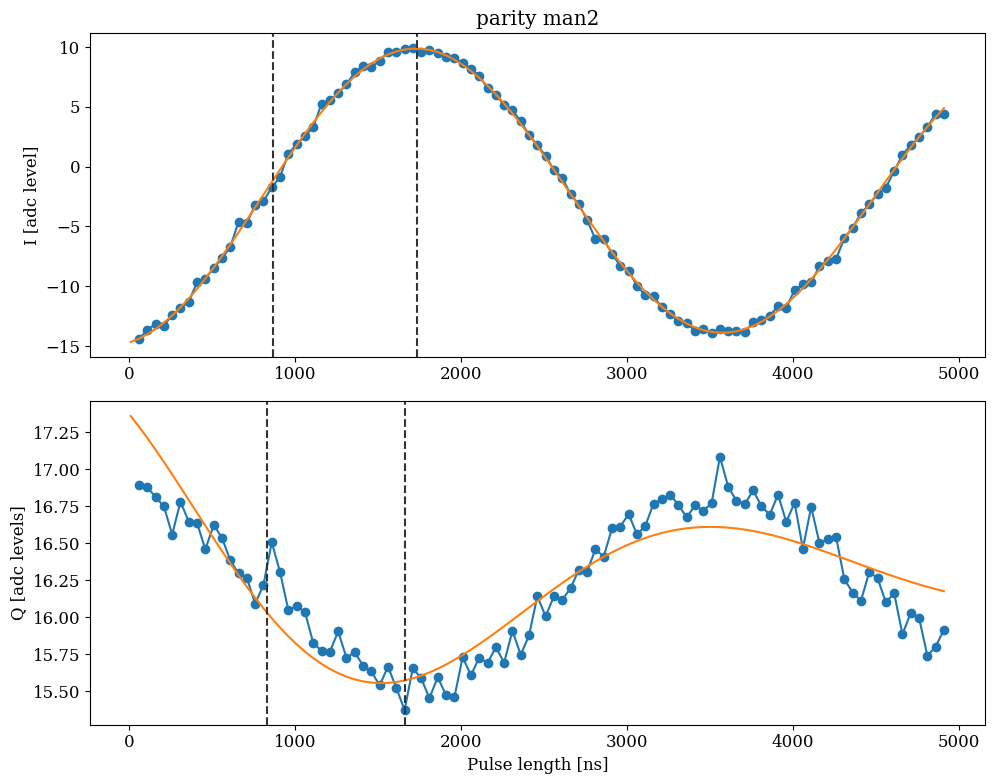

In [205]:
temp_data, attrs = prev_data(expt_path, '00060_ParityDelayExperiment.h5')
parity_mapping_display(temp_data, fit=True, fitparams=[15, 0.1, None, None, None, None], title='parity man2')

Attempted to init fitparam 1 to 4.7979797979797985, which is out of bounds 0.025510204081632654 to 3.826530612244898. Instead init to 1.9260204081632653
Attempted to init fitparam 1 to 4.7979797979797985, which is out of bounds 0.025510204081632654 to 3.826530612244898. Instead init to 1.9260204081632653
Decay from avgi [us] 1.176000000000183
Pi length from avgi data [us]: 0.11522555786411949
	Pi/2 length from avgi data [us]: 0.057612778932059745

Decay from avgq [us] 1.8802000040709057
Pi length from avgq data [us]: 0.23181015523575854
Pi/2 length from avgq data [us]: 0.11590507761787927


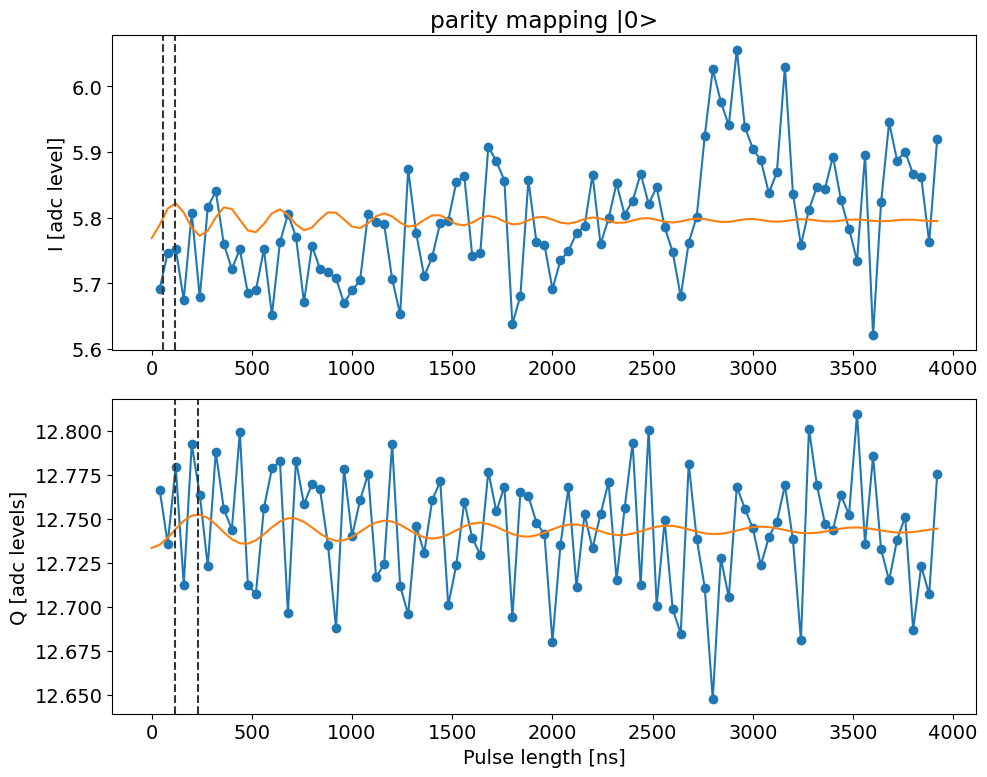

In [74]:
temp_data, attrs = prev_data(expt_path, '00001_ParityDelayExperiment.h5')
parity_mapping_display(temp_data, fit=True, fitparams=None, title='parity mapping |0>')

Decay from avgi [us] 12.956720047562131
Pi length from avgi data [us]: 1.0205935476883594
	Pi/2 length from avgi data [us]: 0.5102967738441797

Decay from avgq [us] 7.43864872855971
Pi length from avgq data [us]: 6.9275376561441435
Pi/2 length from avgq data [us]: 3.4637688280720718


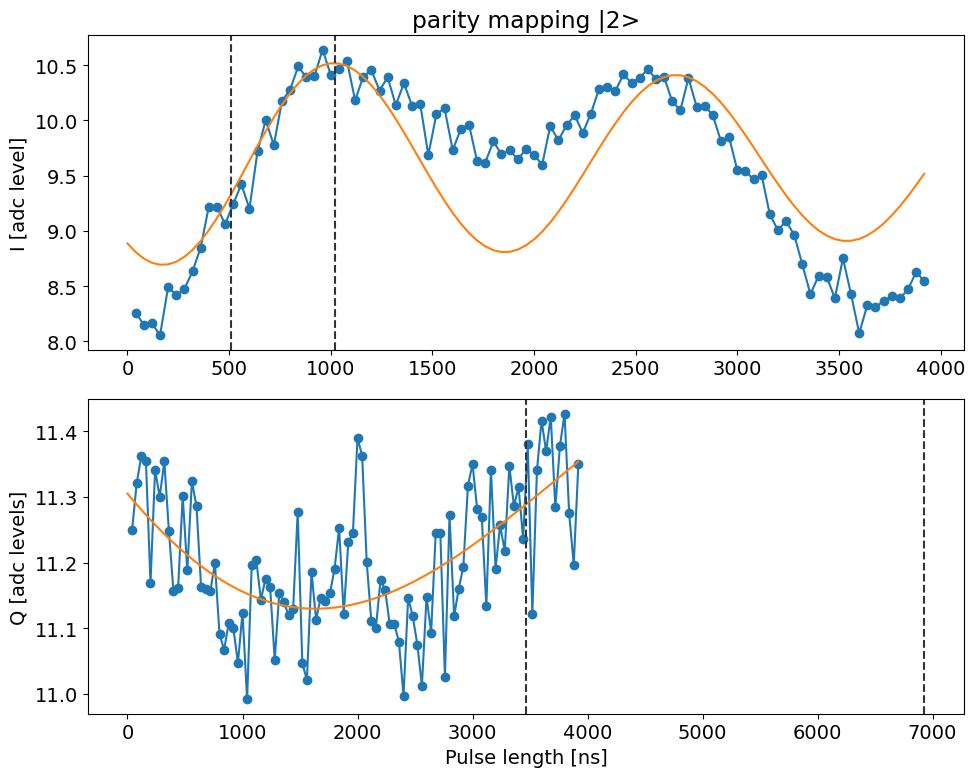

In [75]:
temp_data, attrs = prev_data(expt_path, '00002_ParityDelayExperiment.h5')
parity_mapping_display(temp_data, fit=True, fitparams=None, title='parity mapping |2>')

## Parity Check for f0g1 |1> state 

In [507]:
def bin_ss_data(temp_data, attrs, conf = False):
    '''
    Bin the single shot data into P(e)
    '''
    rounds = attrs['config']['expt']['rounds']
    reps = attrs['config']['expt']['reps']
    expts = attrs['config']['expt']['expts']

    I_data = temp_data['I_data']
    Q_data = temp_data['Q_data']

    # reshape data into (rounds * reps x expts)
    I_data = np.reshape(np.transpose(np.reshape(I_data, (rounds, expts, reps)), (0, 2, 1)), (rounds*reps, expts))
    Q_data = np.reshape(np.transpose(np.reshape(Q_data, (rounds, expts, reps)), (0, 2, 1)), (rounds*reps, expts))


    # rotate I,Q based on the angle calibration
    theta = (-1*(float(temp_data['angle'])) - attrs['config']['device']['readout']['phase']) * np.pi/180 # to radians
    I_data_rot = I_data*np.cos(theta) - Q_data*np.sin(theta)
    Q_data_rot = I_data*np.sin(theta) + Q_data*np.cos(theta)

    # threshold data
    shots = np.zeros((rounds*reps, expts))
    print(shots.shape)
    shots[I_data_rot > temp_data['thresholds']] = 1

    # average over rounds and reps
    shots_avg = np.mean(shots, axis=0)
    np.shape(shots_avg)

    # fix using confusion matrix 
    ydata = shots_avg
    ydata_old = []
    if conf: 
        
        P_matrix = np.matrix([[temp_data['confusion_matrix'][0], temp_data['confusion_matrix'][2]],[temp_data['confusion_matrix'][1], temp_data['confusion_matrix'][3]]])
        for i in range(len(ydata)):
            #print(i)
            ydata_old.append(ydata[i])
            counts_new = inv(P_matrix)*np.matrix([[1-ydata[i]],[ydata[i]]])
            ydata[i] = counts_new[1,0]


    return ydata, ydata_old

(2400, 10)
0
1
2
3
4
5
6
7
8
9


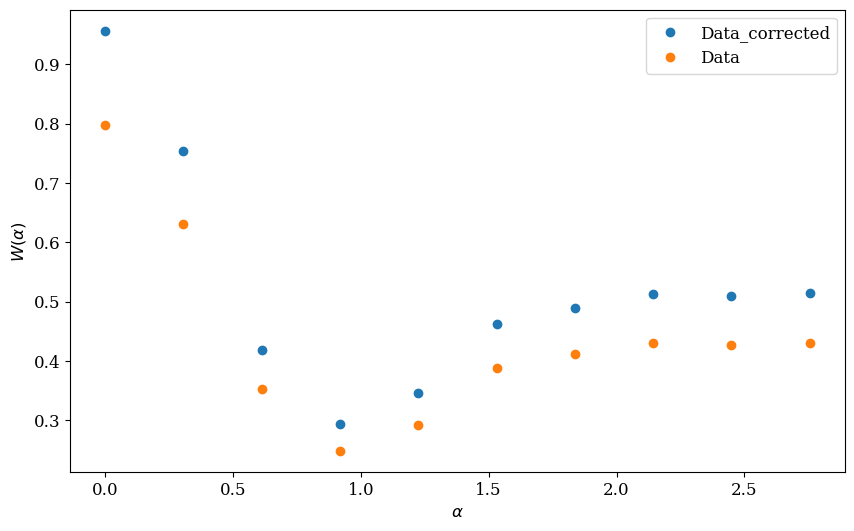

In [511]:
temp_data, attrs = prev_data(expt_path, '00044_ParityGainExperiment.h5')  
x_data = temp_data['xpts']
y_data, ydata_old = bin_ss_data(temp_data, attrs, conf = True)
new_alpha_list = gain_to_alpha * x_data
#plt.plot(new_alpha_list, coherent_odd(new_alpha_list), '-', label='Fit')
plt.plot(new_alpha_list, y_data, 'o', label='Data_corrected')
plt.plot(new_alpha_list, ydata_old, 'o', label='Data')

#label axes
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$W(\alpha)$')
plt.legend()


## Parity Check for ECD |1> state 

(2400, 10)
0
1
2
3
4
5
6
7
8
9


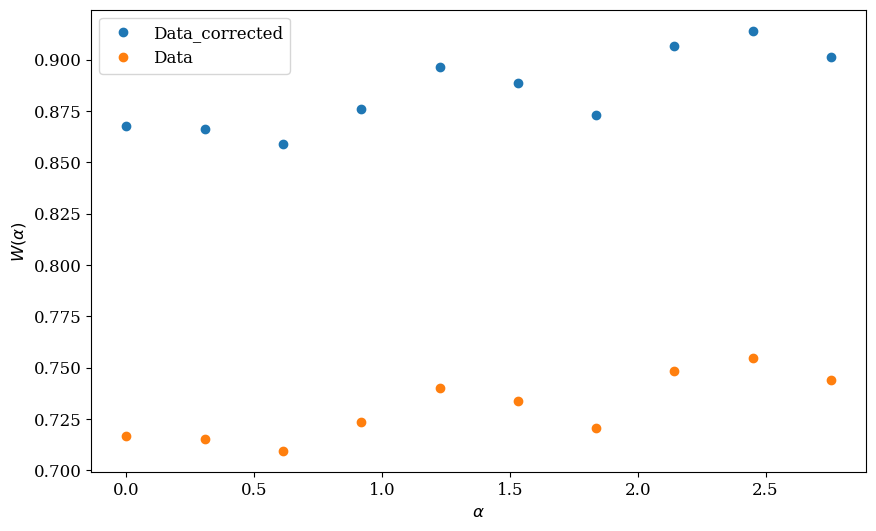

In [512]:
temp_data, attrs = prev_data(expt_path, '00045_ParityGainExperiment.h5')  
x_data = temp_data['xpts']
y_data, ydata_old = bin_ss_data(temp_data, attrs, conf = True)
new_alpha_list = gain_to_alpha * x_data
#plt.plot(new_alpha_list, coherent_odd(new_alpha_list), '-', label='Fit')
plt.plot(new_alpha_list, y_data, 'o', label='Data_corrected')
plt.plot(new_alpha_list, ydata_old, 'o', label='Data')

#label axes
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$W(\alpha)$')
plt.legend()


In [504]:
ydata_old

[0.7970833333333334,
 0.63,
 0.3525,
 0.24833333333333332,
 0.2925,
 0.3879166666666667,
 0.41083333333333333,
 0.43,
 0.4266666666666667,
 0.43083333333333335]

## Manipulate 1, Fock state |0>

In [58]:
# readout confusion matrix ([0.9899, 0.010099999999999998, 0.0405, 0.9595]
Pgg = 0.9899
Pge = 0.010099999999999998
Peg = 0.0405
Pee = 0.9595

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00003_WignerTomography1ModeExperiment.h5')    # 9
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 5   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


(0.9999999999999992+6.913694673726413e-18j)
[ 9.75585956e-01-4.53660008e-18j -3.22797372e-19-8.47673645e-19j
  2.44140440e-02+6.07439382e-18j  7.67155373e-20-4.22928898e-19j
  1.32649480e-20+3.24626208e-20j]
[9.75412619e-01-4.51405033e-18j 2.40681003e-02+1.12655382e-17j
 2.37319563e-04+8.13151629e-20j 1.70087570e-04+8.13151629e-20j
 1.11873501e-04-4.23516474e-22j]
0 population:  (0.9754126191030362-4.51405033415498e-18j)
1 population:  (0.02406810026330145+1.1265538198482195e-17j)
2 population:  (0.00023731956339319364+8.131516293641283e-20j)
sum:  (0.02430541982669464+1.1346853361418607e-17j)
MLE Fidelity:  0.9876297988050952


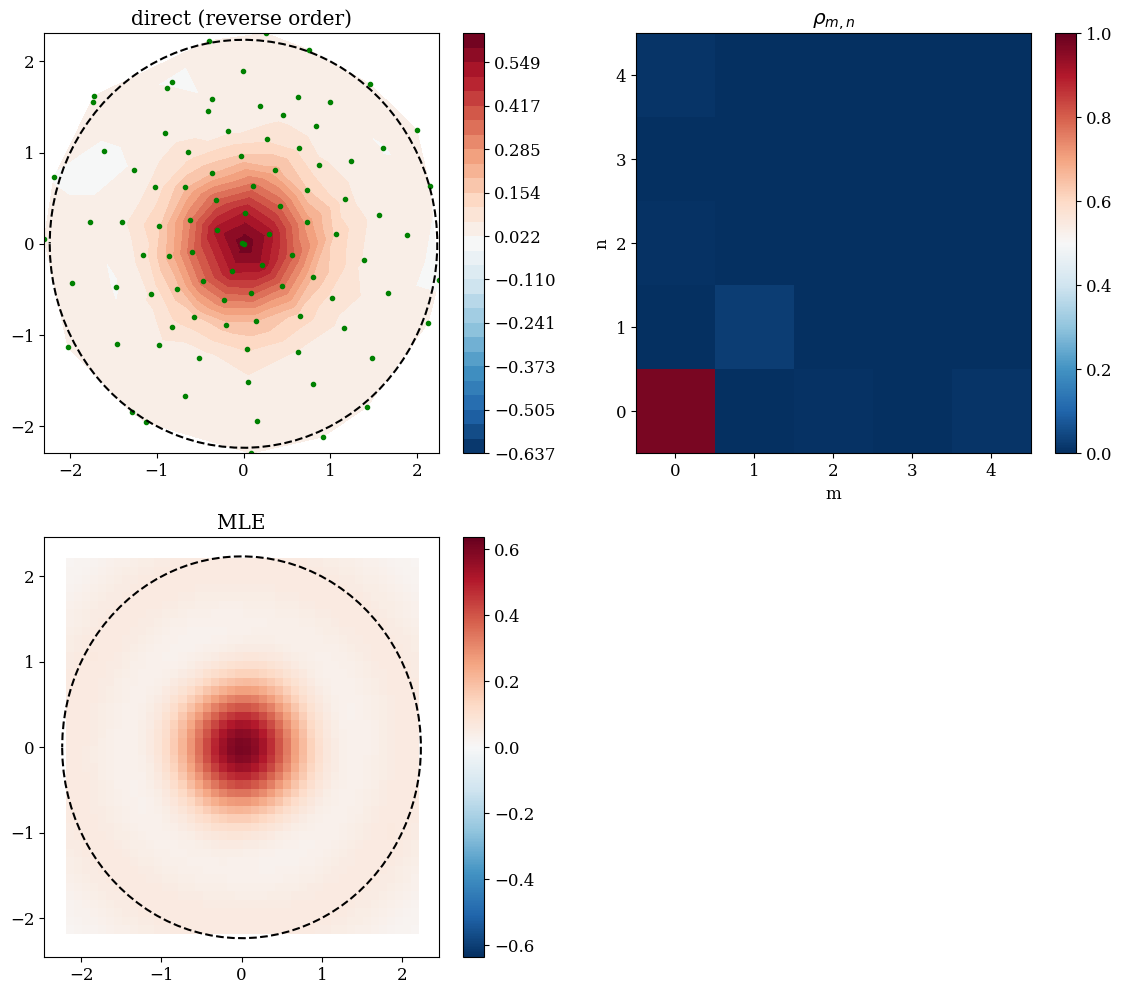

In [14]:
fig1 = plt.figure(figsize=(14,12))
initial_state = 1*ket('0',dim=[[mode_state_num]])-0*ket('1',dim=[[mode_state_num]])
# initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(mode_state_num)/sqrt(1)+0.1,sqrt(mode_state_num)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

In [ ]:
### Manipulate 1 alpha=1  , storage 4: 1

### Manipulate 1 fock1  , storage 4: alpha = 1

In [95]:
# readout confusion matrix ([0.9899, 0.010099999999999998, 0.0405, 0.9595]
Pgg = 0.9898
Pge = 0.0102
Peg = 0.0406
Pee = 0.9594

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00010_WignerTomography1ModeExperiment.h5')    # 9
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 5   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


(1.0000000000000009+5.49148400363908e-17j)
[ 8.82190274e-01-1.09010792e-16j -1.12194390e-16-1.63009977e-18j
  1.17809726e-01-2.74864646e-17j  1.69689161e-20+1.74341068e-20j
 -2.09347434e-19-5.60463353e-21j]
[5.42348165e-03+6.50521303e-19j 8.75759860e-01+7.80625564e-17j
 1.17442684e-01-2.36356074e-17j 9.76900885e-04-1.62630326e-19j
 3.97072603e-04+0.00000000e+00j]
0 population:  (0.005423481649841215+6.505213034913027e-19j)
1 population:  (0.8757598603998534+7.806255641895632e-17j)
2 population:  (0.11744268446236808-2.3635607360183997e-17j)
sum:  (0.9932025448622215+5.442694905877232e-17j)
MLE Fidelity:  0.9358206102210255


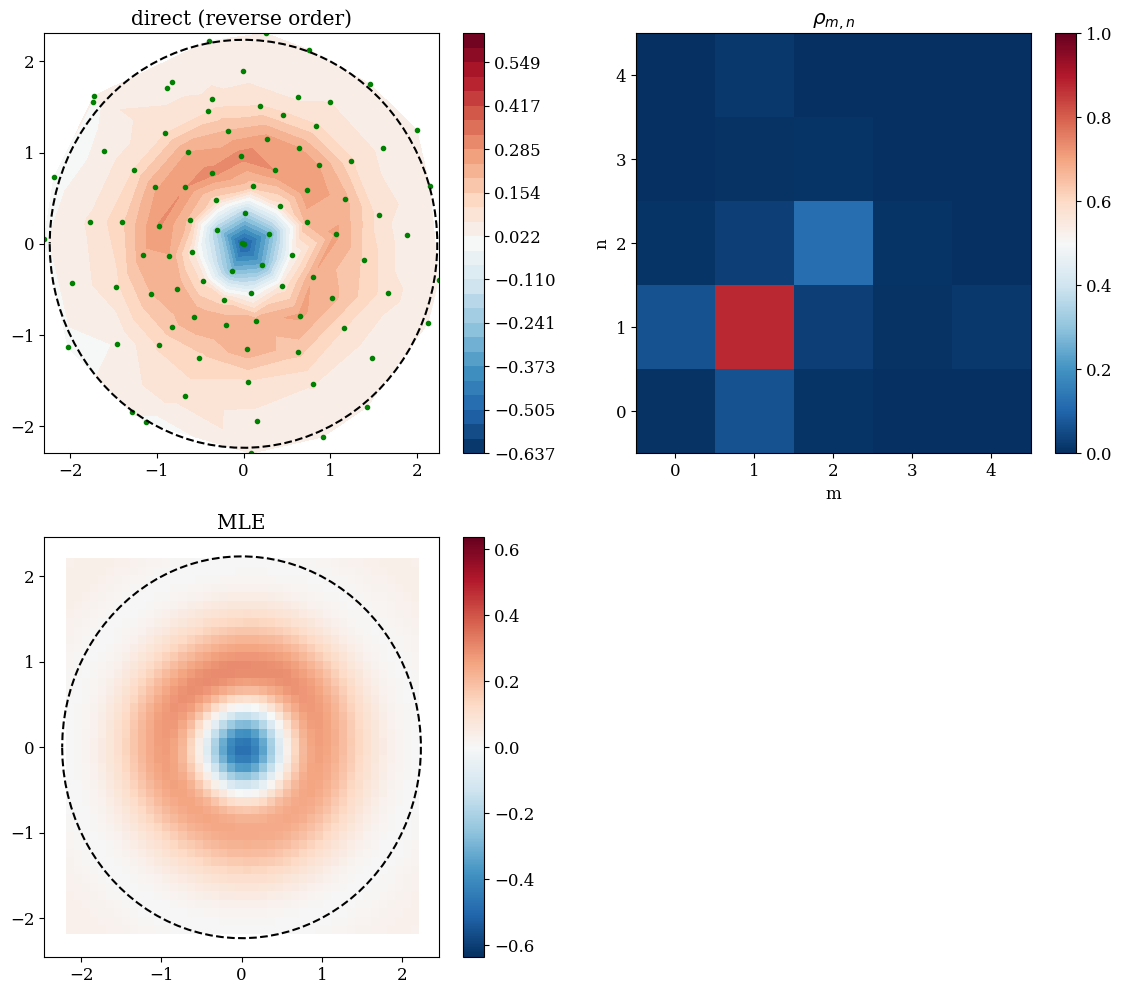

In [97]:
fig1 = plt.figure(figsize=(14,12))
initial_state = basis(mode_state_num, 1)# 0#1*ket('0',dim=[[mode_state_num]])-0*ket('1',dim=[[mode_state_num]])
#   initial_state = coherent(mode_state_num, -1* 1.0j)
# initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(mode_state_num)/sqrt(1)+0.1,sqrt(mode_state_num)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

### Manipulate 1 alpha=1  , storage 4: 1

In [85]:
# readout confusion matrix ([0.9899, 0.010099999999999998, 0.0405, 0.9595]
Pgg = 0.9898
Pge = 0.0102
Peg = 0.0406
Pee = 0.9594

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00009_WignerTomography1ModeExperiment.h5')    # 9
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 5   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


(0.9999999999999997+1.0798653637955624e-16j)
[ 9.63566147e-01+1.38456919e-16j  3.64338529e-02-5.30833467e-18j
  4.20069119e-17-8.32640391e-18j -9.00714129e-18+4.39086933e-18j
  4.24447012e-19-3.74053986e-18j]
[0.28894945+2.77555756e-17j 0.34132191+4.07660017e-17j
 0.23391901+2.77555756e-17j 0.10614276+1.04083409e-17j
 0.02966687+1.30104261e-18j]
0 population:  (0.2889494514564244+2.7755575615628914e-17j)
1 population:  (0.3413219058713998+4.0766001685454967e-17j)
2 population:  (0.2339190088964774+2.7755575615628914e-17j)
sum:  (0.5752409147678772+6.852157730108388e-17j)
MLE Fidelity:  0.959080647862725


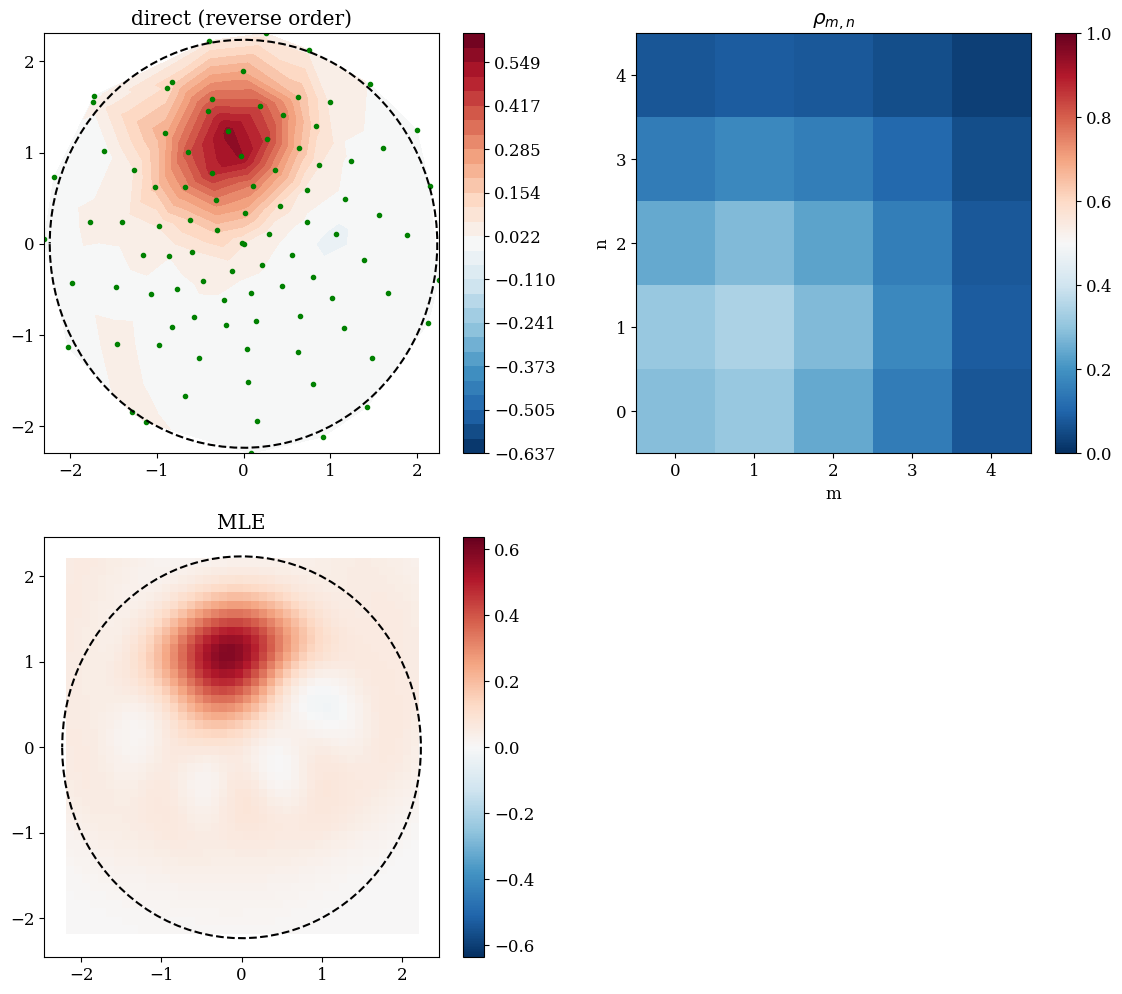

In [94]:
fig1 = plt.figure(figsize=(14,12))
initial_state = 1*ket('0',dim=[[mode_state_num]])-0*ket('1',dim=[[mode_state_num]])
initial_state = coherent(mode_state_num, -1* 1.0j)
# initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(mode_state_num)/sqrt(1)+0.1,sqrt(mode_state_num)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

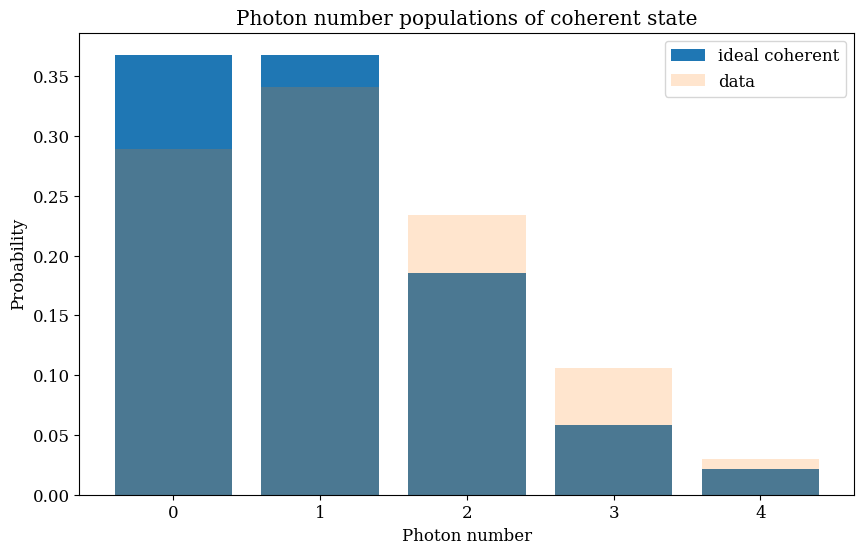

In [93]:
rho_ideal = ket2dm(coherent(mode_state_num, -1.0))
#print photon number populations (bar chart) of coherent state 
fig, ax = plt.subplots()
ax.bar(range(mode_state_num), [rho_ideal[i][0][i] for i in range(mode_state_num)], label = 'ideal coherent')
# make color of below bar plot transaparent
ax.bar(range(mode_state_num), [rho[i][i] for i in range(mode_state_num)], label = 'data', alpha = 0.2)
ax.set_xlabel('Photon number')
ax.set_ylabel('Probability')
ax.set_title('Photon number populations of coherent state')
ax.legend()

AttributeError: 'numpy.ndarray' object has no attribute 'type'

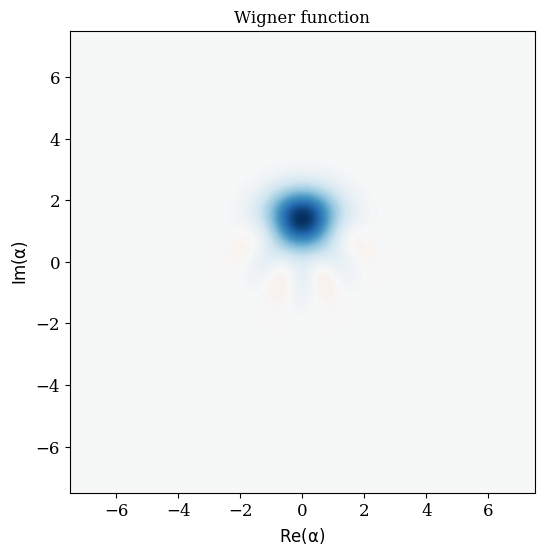

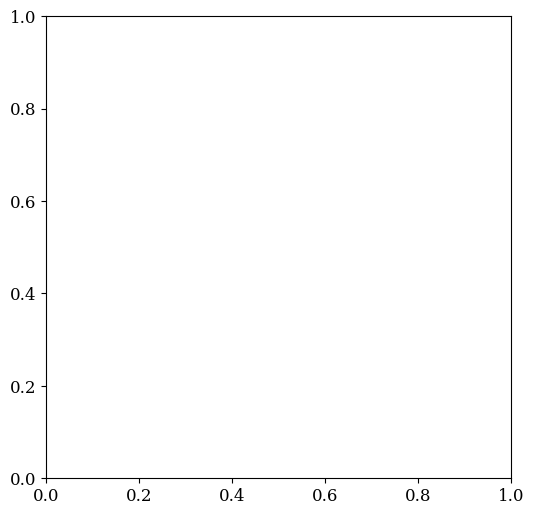

In [90]:
plot_wigner(rho_ideal)
plot_wigner(rho)

In [70]:
mode_state_num

5

In [73]:
rho[0]

array([[0.36791117+0.j, 0.36774407+0.j, 0.26105441+0.j, 0.14620658+0.j,
        0.08826704+0.j]])

## Manipulate 2 Fock state |0>

In [335]:
# readout confusion matrix ([0.9933, 0.0067, 0.0255, 0.9745]
Pgg = 0.9933
Pge = 0.0067
Peg = 0.0255
Pee = 0.9745

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00031_WignerTomography1ModeExperiment.h5') 
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 5   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


(0.9999999999999996-1.6063066637281547e-17j)
[ 9.65557672e-01+1.58593549e-18j -3.21689631e-18+2.21626675e-19j
  3.44423277e-02-2.10534610e-17j  6.55273632e-19-4.99330317e-19j
 -2.59388957e-19-1.63693816e-19j]
[9.65469083e-01+1.57078290e-18j 3.36666246e-02-1.72230386e-17j
 1.09242356e-04-3.81164826e-20j 1.05390418e-04-4.74338450e-20j
 6.49660054e-04-3.25260652e-19j]
0 population:  (0.9654690826022165+1.5707828960136974e-18j)
1 population:  (0.03366662456983447-1.722303855387691e-17j)
2 population:  (0.00010924235629641473-3.8116482626443515e-20j)
sum:  (0.03377586692613088-1.7261155036503353e-17j)
MLE Fidelity:  0.9825829665083079


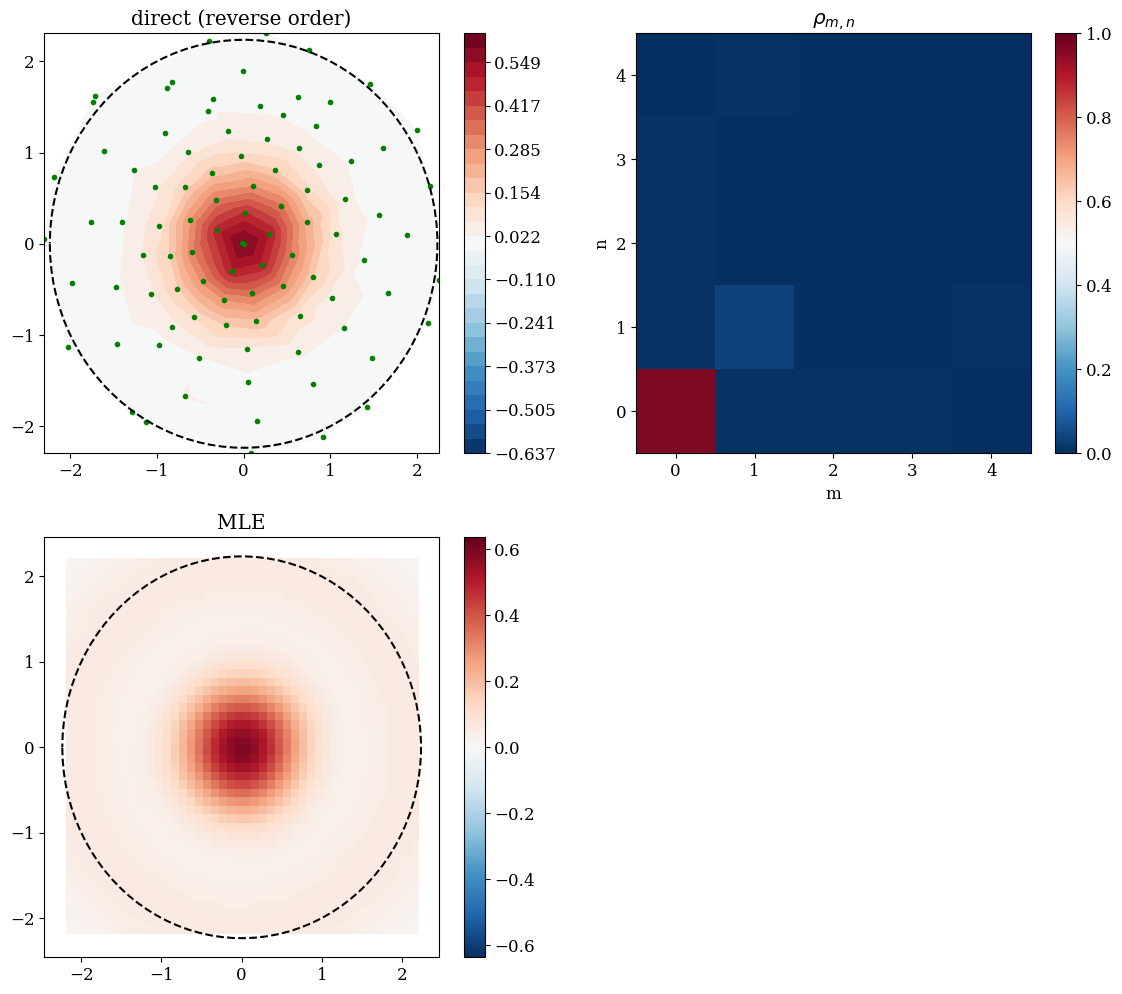

In [336]:
fig1 = plt.figure(figsize=(14,12))
initial_state = 1*ket('0',dim=[[mode_state_num]])-0*ket('1',dim=[[mode_state_num]])
# initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(mode_state_num)/sqrt(1)+0.1,sqrt(mode_state_num)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

## manipulate 1, |1>

In [15]:
# readout confusion matrix ([0.9933, 0.0067, 0.0255, 0.9745]
Pgg = 0.9899
Pge = 0.010099999999999998
Peg = 0.0405
Pee = 0.9595

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00004_WignerTomography1ModeExperiment.h5')    # 10
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 5   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


(1.0000000000000024+1.40831085942289e-16j)
[ 9.16707912e-01+1.12401898e-16j -2.61241403e-17-2.22643674e-19j
  8.32920876e-02+1.33713569e-17j -2.25303563e-19-1.53100368e-19j
  1.06636366e-20-1.14362281e-20j]
[4.63822877e-03+6.50521303e-19j 9.11789165e-01+1.52535387e-16j
 8.11672735e-02-1.20210916e-17j 2.30496578e-03-3.25260652e-19j
 1.00366725e-04-8.47032947e-21j]
0 population:  (0.00463822877291375+6.505213034913027e-19j)
1 population:  (0.911789165188619+1.5253538720744891e-16j)
2 population:  (0.08116727353067288-1.202109158743303e-17j)
sum:  (0.9929564387192918+1.4051429562001588e-16j)
MLE Fidelity:  0.9548768272965887


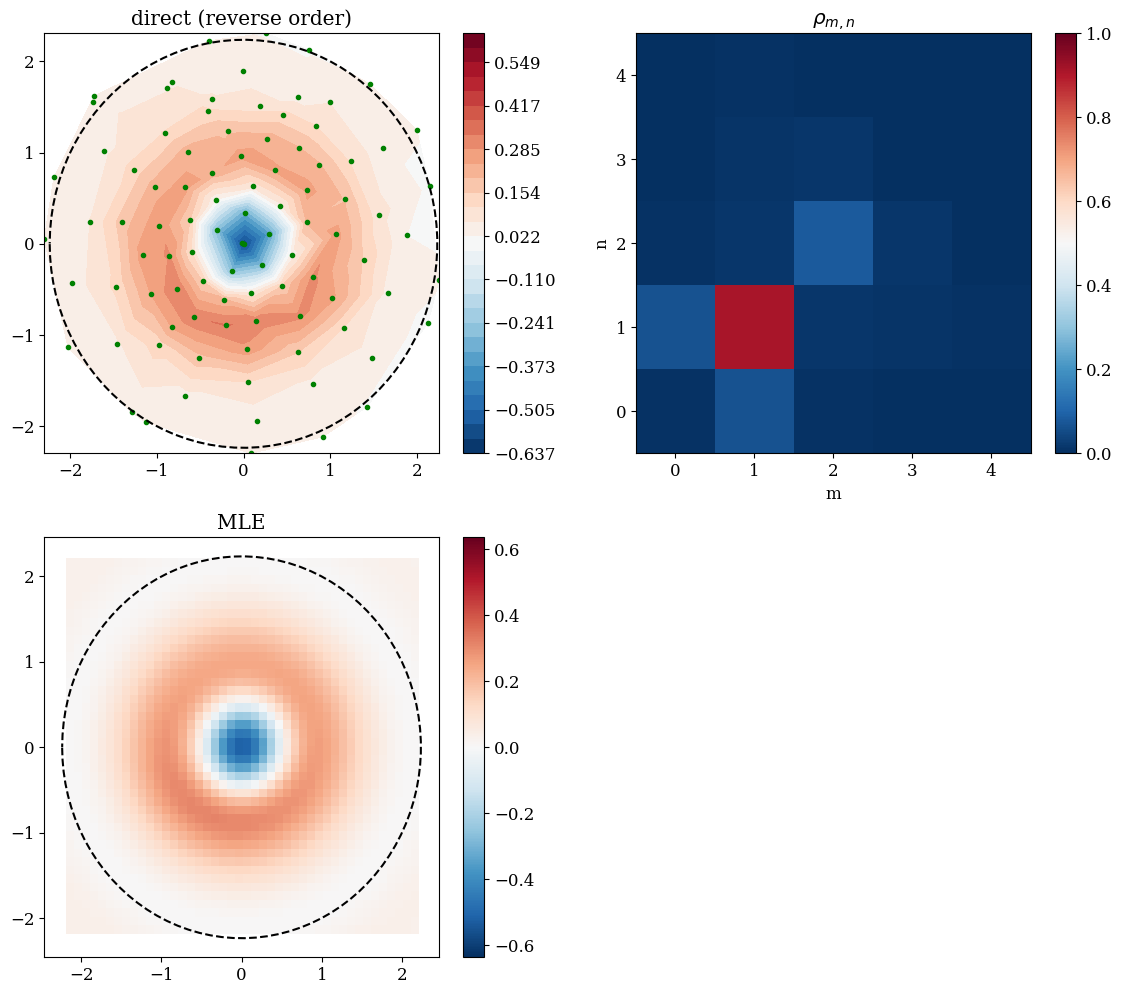

In [16]:
fig1 = plt.figure(figsize=(14,12))
initial_state = 0*ket('0',dim=[[mode_state_num]])-1*ket('1',dim=[[mode_state_num]])
# initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(mode_state_num)/sqrt(1)+0.1,sqrt(mode_state_num)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

### 35 ns gaussian; phase locked

In [230]:
# readout confusion matrix [0.9931, 0.006900000000000017, 0.0283, 0.9717]
Pgg = 0.9931
Pge = 0.006900000000000017
Peg = 0.0283
Pee = 0.9717

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00020_WignerTomography1ModeExperiment.h5')    # 10
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 4   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


(0.9999999999999993-2.0067481069875256e-17j)
[ 9.39270387e-01+7.03558463e-17j  5.17166192e-02-4.05886393e-17j
 -6.26181987e-17-4.73922358e-17j  9.01299415e-03-5.78557712e-17j]
[0.05025726-3.86179261e-17j 0.93897848+7.41361352e-17j
 0.00917128-5.28209746e-17j 0.00159298-2.76471554e-18j]
0 population:  (0.05025725824614999-3.861792613121806e-17j)
1 population:  (0.9389784832542298+7.413613519195901e-17j)
2 population:  (0.009171282722099777-5.282097459077817e-17j)
sum:  (0.9481497659763296+2.131516060118084e-17j)
MLE Fidelity:  0.96900902152932


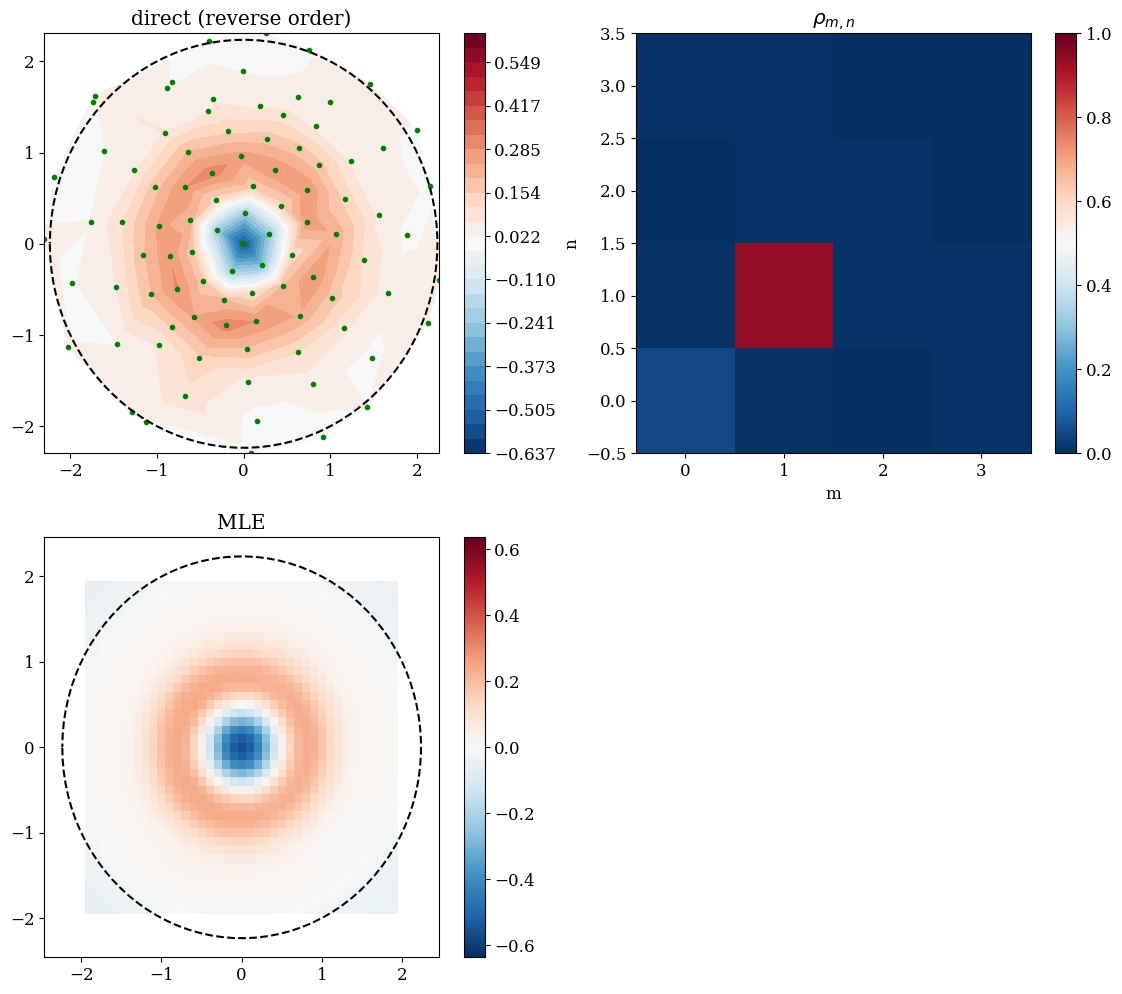

In [231]:
fig1 = plt.figure(figsize=(14,12))
initial_state = 0*ket('0',dim=[[mode_state_num]])-1*ket('1',dim=[[mode_state_num]])
# initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(mode_state_num)/sqrt(1)+0.1,sqrt(mode_state_num)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

## Manipulate 1 |0>+|1>

In [17]:
# readout confusion matrix ([0.9933, 0.0067, 0.0255, 0.9745]
Pgg = 0.9899
Pge = 0.010099999999999998
Peg = 0.0405
Pee = 0.9595

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00005_WignerTomography1ModeExperiment.h5')    # 15
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 5   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


(0.9999999999999999-3.69712940817557e-16j)
[ 9.73294753e-01-1.95869497e-16j  2.67052467e-02-2.18863799e-16j
 -1.78009101e-16-1.02624358e-17j -1.59552032e-19+6.17027913e-21j
  1.08399308e-20+4.06139829e-21j]
[4.58732408e-01-9.71445147e-17j 5.16483438e-01-9.38376980e-17j
 2.41587064e-02-1.73906028e-16j 5.20884764e-04-4.09286320e-18j
 1.04563011e-04-7.31836466e-19j]
0 population:  (0.45873240764620643-9.71445146547012e-17j)
1 population:  (0.5164834381598238-9.383769802862041e-17j)
2 population:  (0.02415870641917365-1.739060284666749e-16j)
sum:  (0.5406421445789974-2.677437264952953e-16j)
MLE Fidelity:  0.9823938372351015


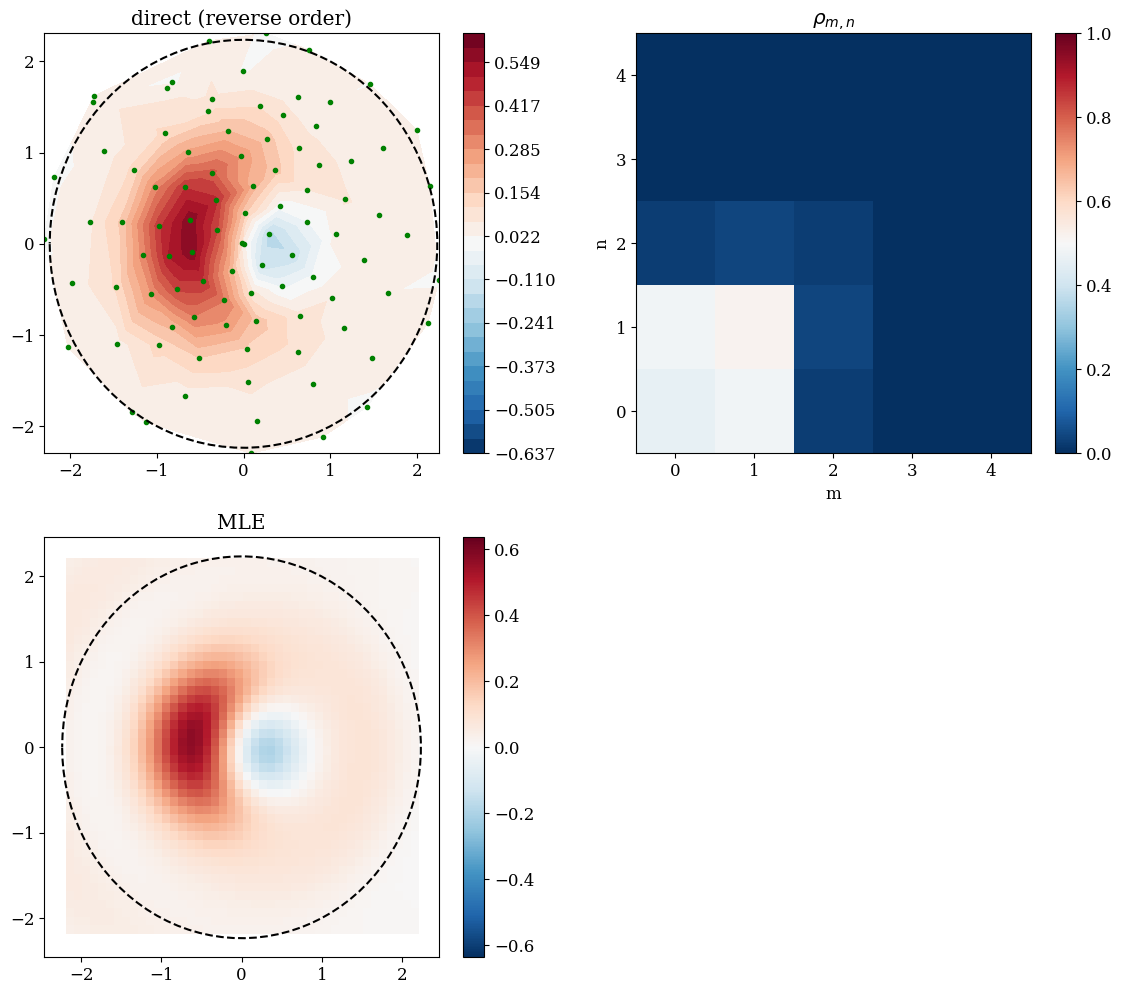

In [18]:
fig1 = plt.figure(figsize=(14,12))
initial_state = 1*ket('0',dim=[[mode_state_num]])+1*ket('1',dim=[[mode_state_num]])
# initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(mode_state_num)/sqrt(1)+0.1,sqrt(mode_state_num)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

### Phase lock debug

In [10]:
# readout confusion matrix ([0.9899, 0.010099999999999998, 0.0405, 0.9595]
Pgg = 0.9899
Pge = 0.010099999999999998
Peg = 0.0405
Pee = 0.9595

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00002_WignerTomography1ModeExperiment.h5')    # 15
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 5   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


In [11]:
temp_data1['alpha']

array([ 0. +0.j ,  0.2+0.j ,  0.4+0.j ,  0.6+0.j ,  0.8+0.j ,  1. +0.j ,
        0. +0.2j,  0. +0.4j,  0. +0.6j,  0. +0.8j,  0. +1.j , -0.2+0.j ,
       -0.4+0.j , -0.6+0.j , -0.8+0.j , -1. +0.j ])

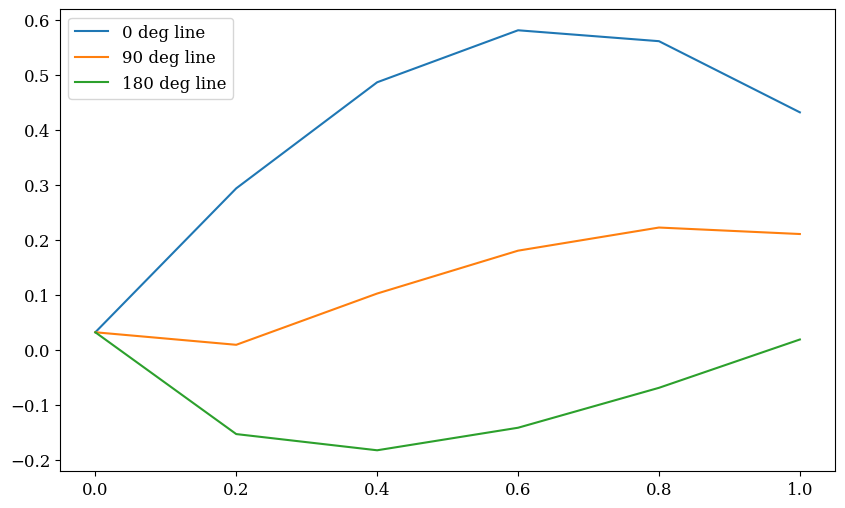

In [12]:
alpha_0 = temp_data1['alpha'][0:6]
allocated_readout_0 = allocated_readout[0:6]

alpha_90 = [temp_data1['alpha'][0]]
for i in temp_data1['alpha'][6:11:1]:
    alpha_90.append(i)
allocated_readout_90 = [allocated_readout[0]]
for i in allocated_readout[6:11:1]:
    allocated_readout_90.append(i)

alpha_180 = [temp_data1['alpha'][0]]
for i in temp_data1['alpha'][11:16:1]:
    alpha_180.append(i)
allocated_readout_180 = [allocated_readout[0]]
for i in allocated_readout[11:16:1]:
    allocated_readout_180.append(i)
plt.plot(np.abs(alpha_0), allocated_readout_0, label='0 deg line')
plt.plot(np.abs(alpha_90), allocated_readout_90, label='90 deg line')
plt.plot(np.abs(alpha_180), allocated_readout_180, label='180 deg line')
plt.legend()

## Manipulate 1 |2>

In [342]:
# readout confusion matrix ([0.9933, 0.0067, 0.0255, 0.9745]
Pgg = 0.9933
Pge = 0.0067
Peg = 0.0255
Pee = 0.9745

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00034_WignerTomography1ModeExperiment.h5')    # 10
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 5   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


(0.9999999999999992-7.323785675139582e-17j)
[ 7.98102172e-01-5.55301185e-17j  1.37203899e-01-8.92530823e-17j
 -1.35733814e-16+3.60818416e-19j  1.41457191e-02-4.91567458e-17j
  5.05482101e-02+2.29257062e-17j]
[0.00368408-6.50521303e-19j 0.02586551-3.33934269e-17j
 0.79111665+4.49401800e-17j 0.10507612-5.29090660e-17j
 0.07425765-3.12250226e-17j]
0 population:  (0.0036840791317748487-6.505213034913027e-19j)
1 population:  (0.025865505404967157-3.3393426912553537e-17j)
2 population:  (0.7911166474375892+4.494018004952416e-17j)
sum:  (0.8169821528425564+1.1546753136970622e-17j)
MLE Fidelity:  0.8894473862931445


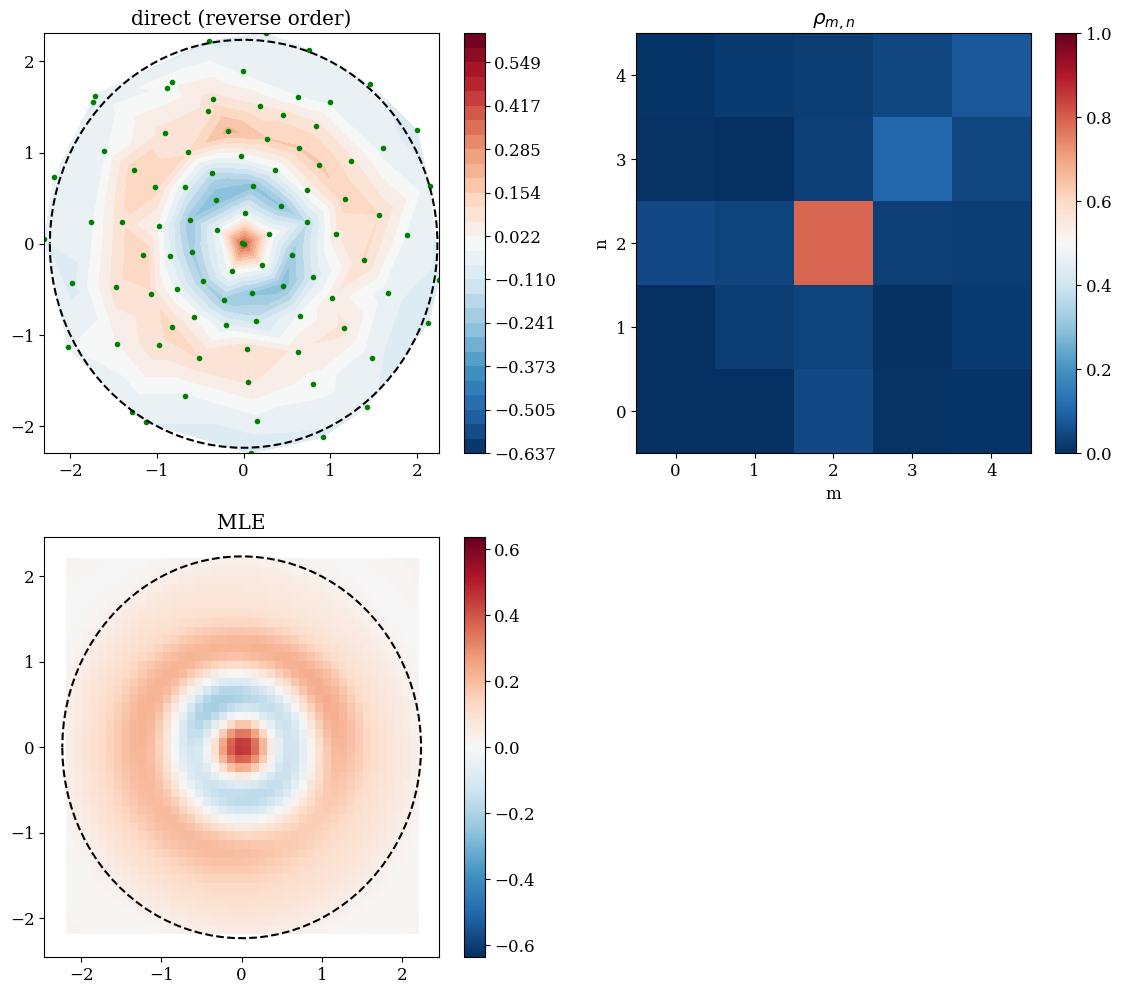

In [343]:
fig1 = plt.figure(figsize=(14,12))
initial_state = 0*ket('0',dim=[[mode_state_num]])-1*ket('2',dim=[[mode_state_num]])
# initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(mode_state_num)/sqrt(1)+0.1,sqrt(mode_state_num)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

## Manipulate1 |4>

In [38]:
# readout confusion matrix ([0.9933, 0.0067, 0.0255, 0.9745]
Pgg = 0.9899
Pge = 0.010099999999999998
Peg = 0.0405
Pee = 0.9595

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00007_WignerTomography1ModeExperiment.h5')    # 10
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 7   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


(0.9999999999999999+4.94098581888992e-17j)
[ 6.98278811e-01+9.13713314e-17j  2.92018606e-01+1.74811647e-17j
  9.70258322e-03-4.23927843e-17j -1.22662535e-17+3.98387808e-18j
  8.62005043e-18+3.72152726e-19j -2.06357062e-18+1.72912876e-18j
  8.59597010e-19-9.02607316e-18j]
[0.00379103+1.99545019e-19j 0.00362487+2.76724963e-19j
 0.07293773+7.82039863e-18j 0.00715552+4.90322969e-20j
 0.61846771+7.60838875e-17j 0.28278379+3.79470760e-18j
 0.01123936-3.88144378e-17j]
0 population:  (0.00379102780401217+1.9954501915056612e-19j)
1 population:  (0.003624874263842024+2.7672496330868345e-19j)
2 population:  (0.07293772629417399+7.820398626669254e-18j)
sum:  (0.076562600558016+8.097123589977937e-18j)
MLE Fidelity:  0.7864271810673571


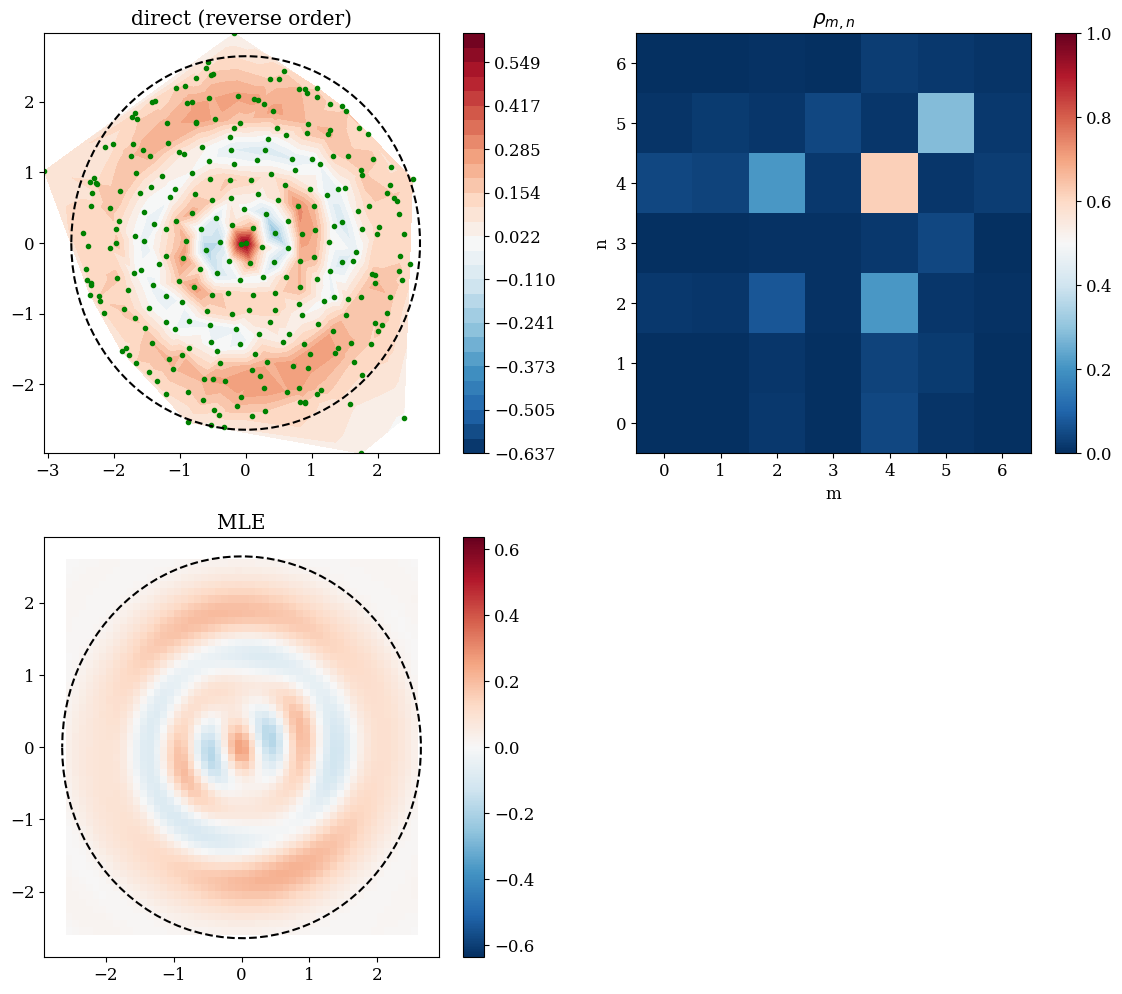

In [39]:
fig1 = plt.figure(figsize=(14,12))
initial_state = 0*ket('0',dim=[[mode_state_num]])-1*ket('4',dim=[[mode_state_num]])
# initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(mode_state_num)/sqrt(1)+0.1,sqrt(mode_state_num)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(7)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(7)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

## Manipulate 1 displace alpha~1

In [278]:
# readout confusion matrix ([0.9933, 0.0067, 0.0255, 0.9745]
Pgg = 0.9933
Pge = 0.0067
Peg = 0.0255
Pee = 0.9745

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00011_WignerTomography1ModeExperiment.h5')    # 10
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 5   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


(1.0000000000000004+2.6339247714924826e-16j)
[ 9.87953071e-01+1.10168272e-16j  1.20469291e-02+1.61098233e-16j
 -3.59236102e-17+4.43640971e-18j -1.14682460e-17-7.95929107e-18j
  8.71177783e-19-4.36774216e-18j]
[0.49949783+1.12200484e-16j 0.34753623+6.50521303e-17j
 0.11903976+4.67833237e-17j 0.02965185+3.16587034e-17j
 0.00427432+7.69783542e-18j]
0 population:  (0.49949783318913293+1.122004841961447e-16j)
1 population:  (0.3475362324225729+6.505213034913027e-17j)
2 population:  (0.1190397628751779+4.6783323742749516e-17j)
sum:  (0.46657599529775085+1.1183545409187978e-16j)
MLE Fidelity:  0.06537826672775525


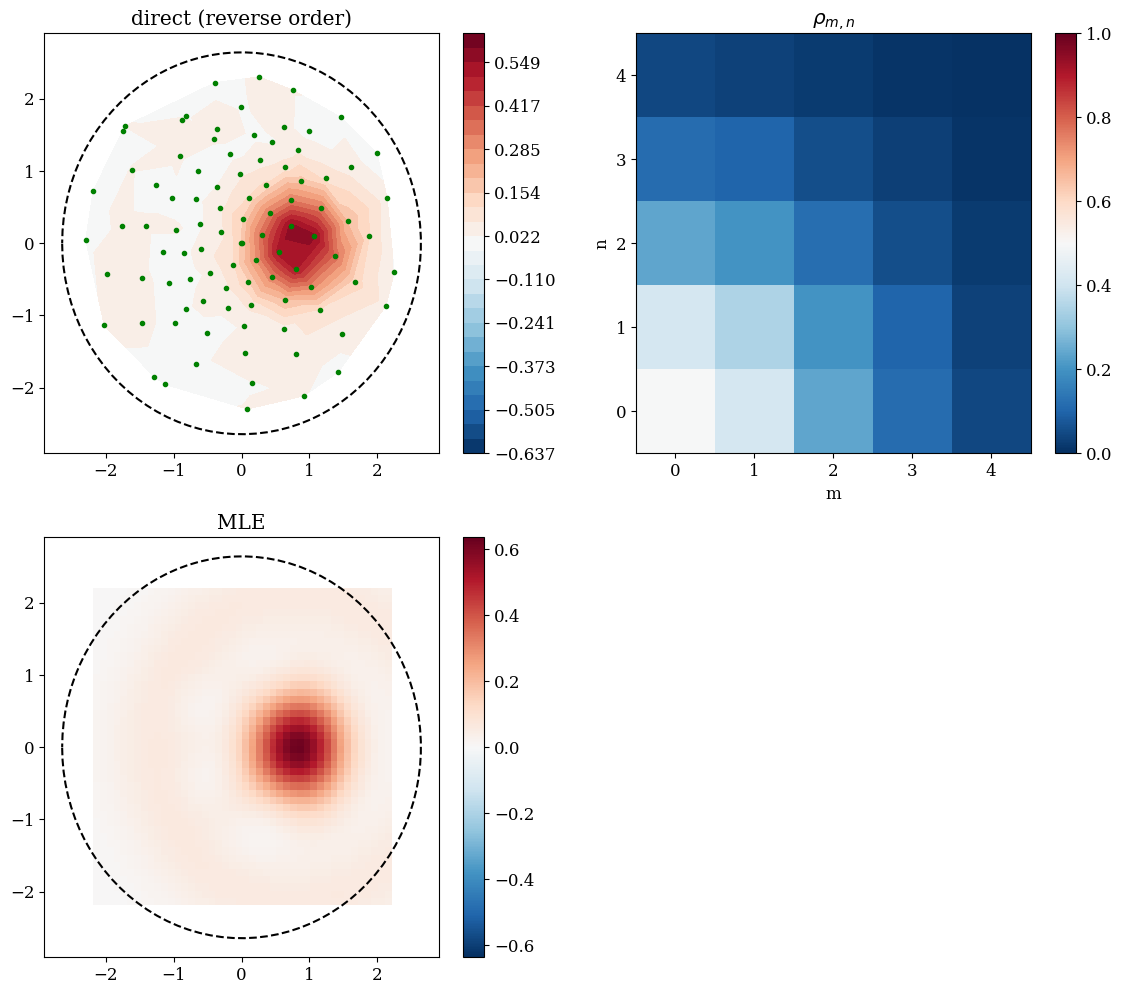

In [279]:
fig1 = plt.figure(figsize=(14,12))
initial_state = 0*ket('0',dim=[[mode_state_num]])-1*ket('4',dim=[[mode_state_num]])
# initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(mode_state_num)/sqrt(1)+0.1,sqrt(mode_state_num)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(7)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(7)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

In [282]:
e**(-5)

0.006737946999085469

## Man1-S1 2pi swap

In [280]:
# readout confusion matrix ([0.9933, 0.0067, 0.0255, 0.9745]
Pgg = 0.9933
Pge = 0.0067
Peg = 0.0255
Pee = 0.9745

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00012_WignerTomography1ModeExperiment.h5')    # 10
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 5   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


(1.000000000000001+2.071910351619799e-16j)
[ 9.83450252e-01+9.28912209e-17j  1.65497484e-02+1.16754412e-16j
 -6.71487917e-17+4.87967843e-17j -1.61419592e-19-3.81908395e-19j
 -1.37515181e-18-1.82400122e-18j]
[0.49547857+4.78133158e-17j 0.348116  +6.93889390e-17j
 0.12480432+7.63278329e-17j 0.02768564+1.04083409e-17j
 0.00391547+3.25260652e-18j]
0 population:  (0.49547857154197095+4.7813315806610746e-17j)
1 population:  (0.34811600075271026+6.938893903907228e-17j)
2 population:  (0.12480431771029328+7.632783294297951e-17j)
sum:  (0.47292031846300353+1.457167719820518e-16j)
MLE Fidelity:  0.06257374813983667


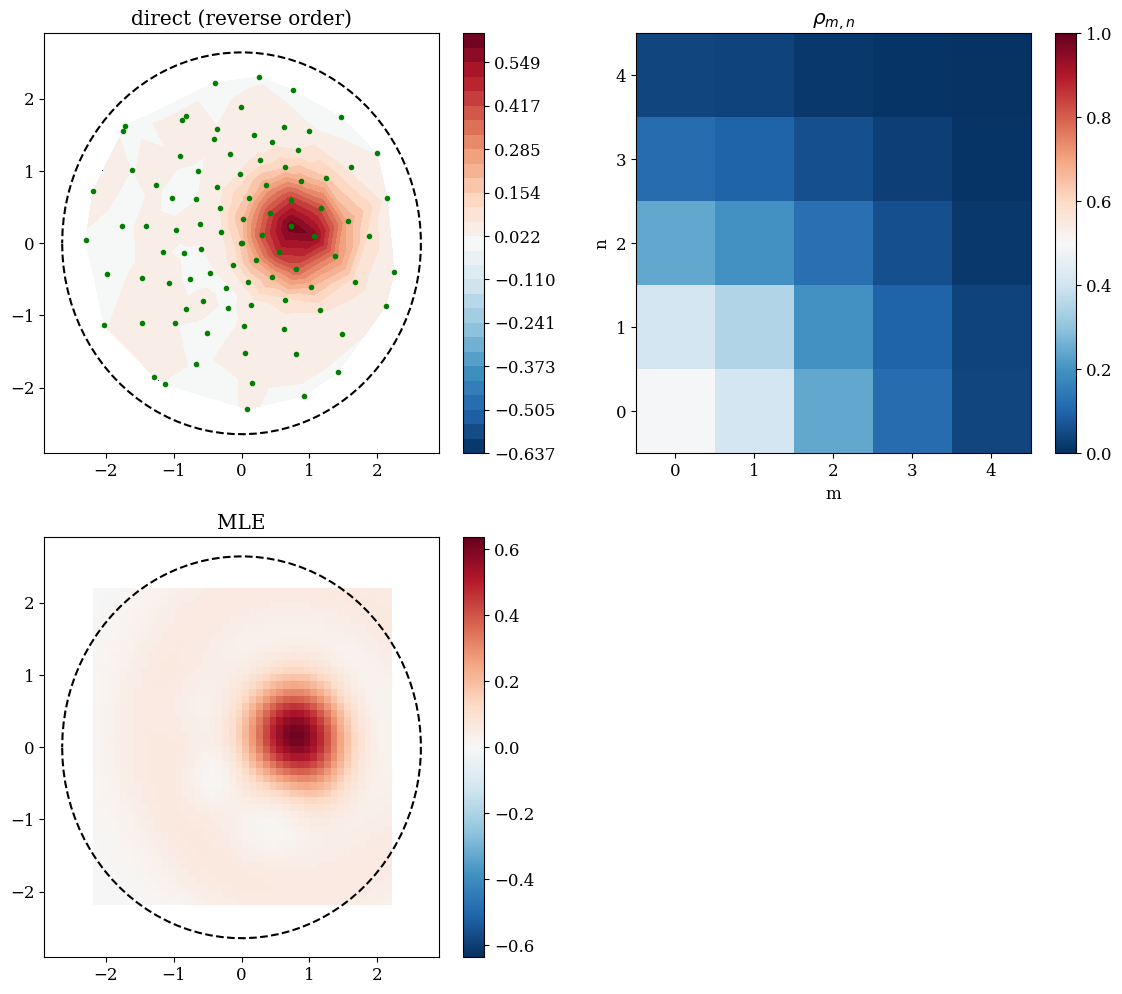

In [281]:
fig1 = plt.figure(figsize=(14,12))
initial_state = 0*ket('0',dim=[[mode_state_num]])-1*ket('4',dim=[[mode_state_num]])
# initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(mode_state_num)/sqrt(1)+0.1,sqrt(mode_state_num)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(7)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(7)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

## Manipulate 2, |1>

In [337]:
# readout confusion matrix ([0.9933, 0.0067, 0.0255, 0.9745]
Pgg = 0.9933
Pge = 0.0067
Peg = 0.0255
Pee = 0.9745
P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00032_WignerTomography1ModeExperiment.h5') 
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 5   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


(1.0000000000000022+1.988579250268921e-17j)
[ 8.95985687e-01+7.14703388e-17j  3.96632504e-02-5.92379037e-17j
  6.43510627e-02+1.69947171e-16j -5.91461514e-18+1.79658977e-17j
 -1.10198087e-18+1.95322680e-18j]
[4.27410938e-02-4.16333634e-17j 8.95625418e-01-1.58386691e-17j
 6.05298653e-02+7.71951947e-17j 8.42209160e-04+4.33680869e-19j
 2.61413277e-04-2.71050543e-19j]
0 population:  (0.0427410938424201-4.163336342344337e-17j)
1 population:  (0.895625418370958-1.5838669080708162e-17j)
2 population:  (0.060529865349451484+7.719519468096792e-17j)
sum:  (0.9561552837204095+6.135652560025975e-17j)
MLE Fidelity:  0.9463748825761147


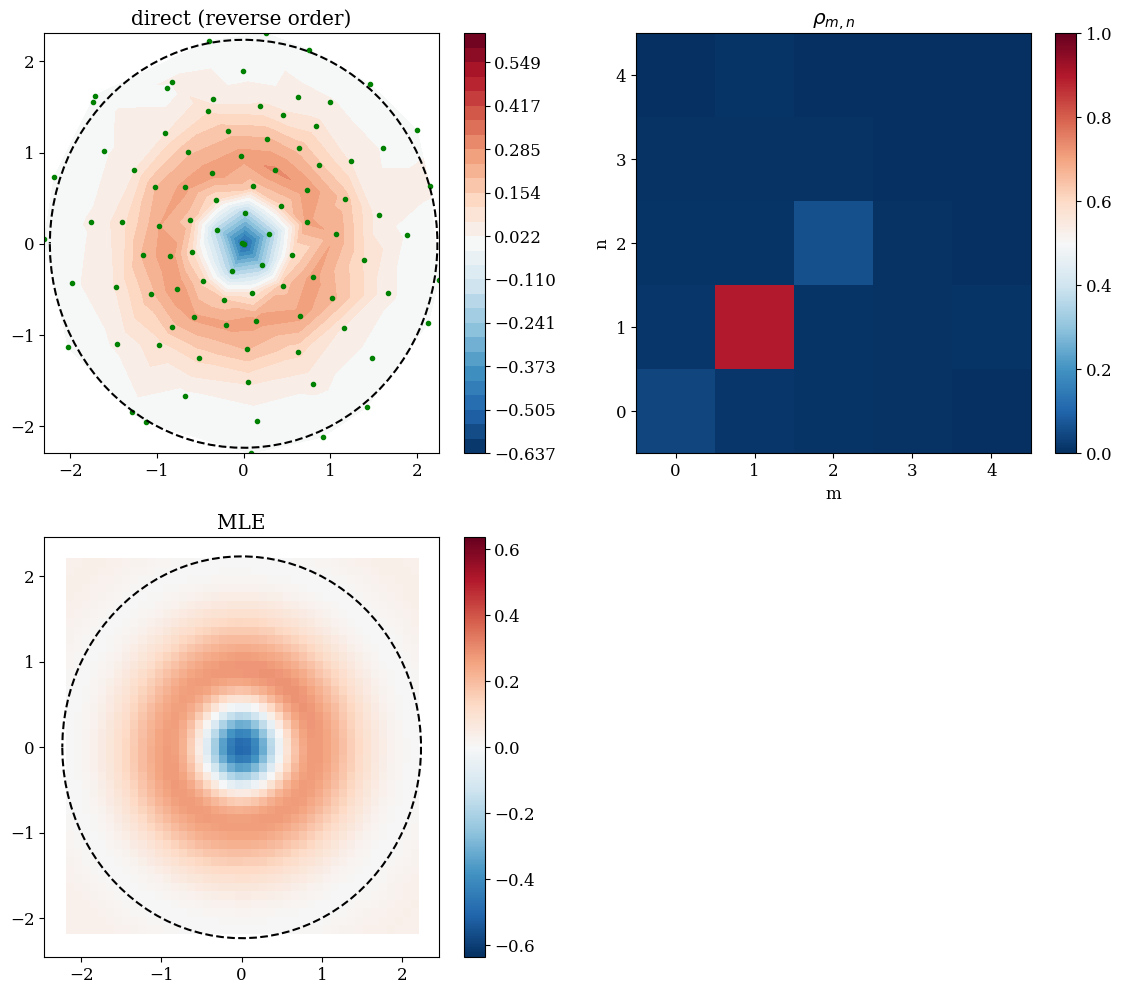

In [338]:
fig1 = plt.figure(figsize=(14,12))
initial_state = 0*ket('0',dim=[[mode_state_num]])-1*ket('1',dim=[[mode_state_num]])
# initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(mode_state_num)/sqrt(1)+0.1,sqrt(mode_state_num)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

## Manipulate 2, |0>+|1>

In [339]:
# readout confusion matrix ([0.9933, 0.0067, 0.0255, 0.9745]
Pgg = 0.9933
Pge = 0.0067
Peg = 0.0255
Pee = 0.9745
P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00033_WignerTomography1ModeExperiment.h5') 
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 5   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


(0.9999999999999994+1.4706016623639712e-16j)
[ 9.75287310e-01+5.50139090e-17j  1.71110790e-18-2.24073599e-17j
  2.47126905e-02+7.14768595e-17j -2.24556635e-20-7.39830508e-21j
  6.92891560e-20-1.87418833e-21j]
[4.86957258e-01+4.16333634e-17j 4.92526566e-01+4.49943902e-17j
 1.95800444e-02+5.80048162e-17j 6.50411477e-04+1.96511644e-18j
 2.85720958e-04+4.62479989e-19j]
0 population:  (0.48695725757735847+4.163336342344337e-17j)
1 population:  (0.49252656562144154+4.4994390158148434e-17j)
2 population:  (0.019580044365959608+5.800481622797449e-17j)
sum:  (0.5121066099874011+1.0299920638612292e-16j)
MLE Fidelity:  0.9794543609247758


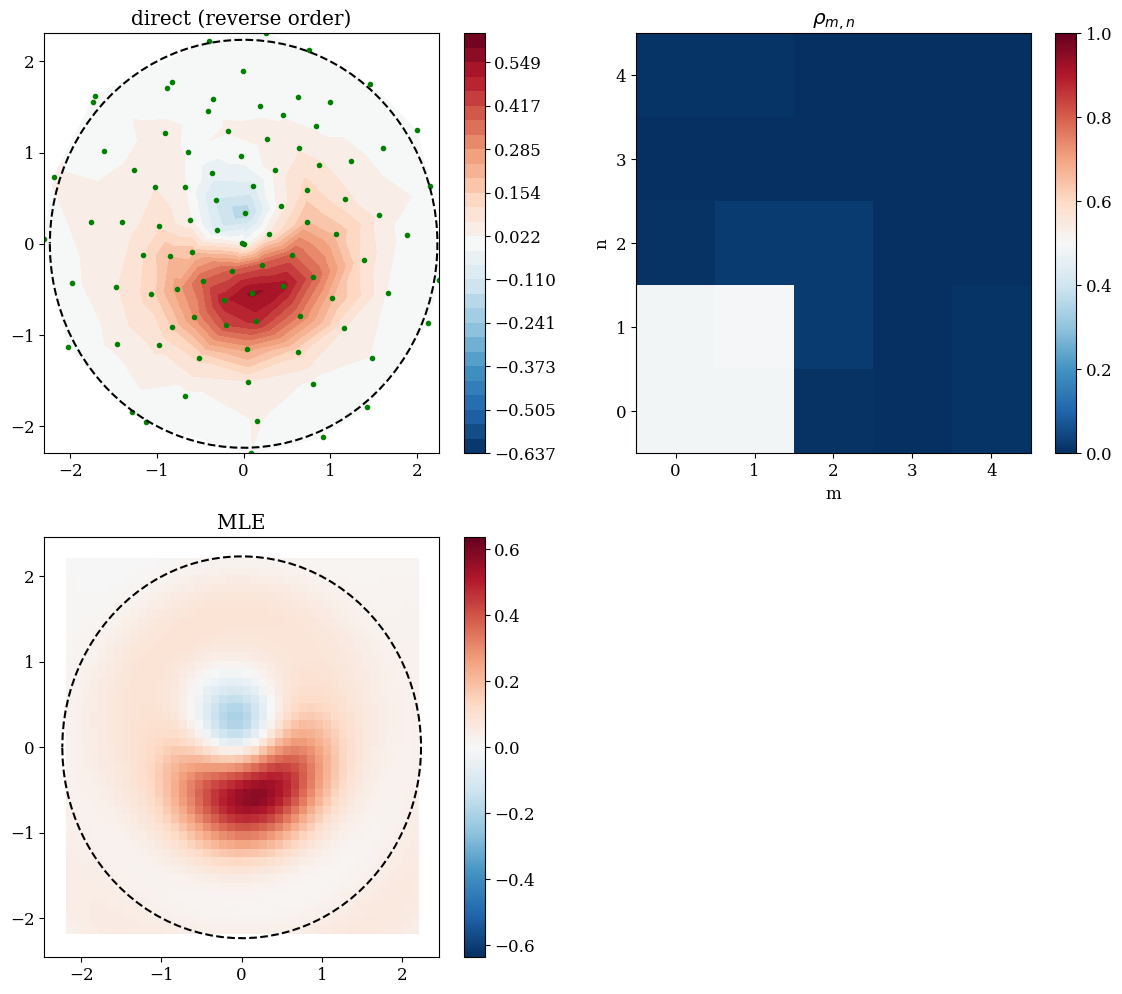

In [341]:
fig1 = plt.figure(figsize=(14,12))
initial_state = 1*ket('0',dim=[[mode_state_num]])+1j*ket('1',dim=[[mode_state_num]])
# initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(mode_state_num)/sqrt(1)+0.1,sqrt(mode_state_num)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

## Manipulate 1, cat

In [366]:
# readout confusion matrix ([0.9933, 0.0067, 0.0255, 0.9745]
Pgg = 0.9933
Pge = 0.0067
Peg = 0.0255
Pee = 0.9745

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00000_WignerTomography1ModeCatExperiment.h5')    # 10
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_ge = 0
    counts_gg = 0

    counts_ee = 0
    counts_eg = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # first measurement is |e>
            if temp_data1['i0'][ii][1][jj] > tre:   # second measurement is |e>
                counts_ee += 1
            else:    # |g>
                counts_eg += 1
        else:                                    # first measurement is |g>
            if temp_data1['i0'][ii][1][jj] < tre:   # second measurement is |e>
                counts_ge += 1
            else:    # |g>
                counts_gg += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_gg],[counts_ge]])   # for qubit go to |g>
    # counts_new = np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/(counts_gg+counts_ge)))

mode_state_num = 5   # cutoff fock state number
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


(0.999999999999999-3.101902415481028e-16j)
[1.78811839e-02-6.35221972e-17j 4.83495645e-17+4.78330103e-17j
 4.24409715e-01-5.09489294e-17j 2.46319905e-01-2.23871936e-16j
 3.11389196e-01+3.23615154e-17j]
[0.02257186-6.03900610e-17j 0.07567939-2.77555756e-17j
 0.20382746-1.04083409e-16j 0.37846761-7.28583860e-17j
 0.31945368-4.51028104e-17j]
0 population:  (0.022571861186569137-6.03900610074426e-17j)
1 population:  (0.07567938878815601-2.7755575615628914e-17j)
2 population:  (0.20382746065655857-1.0408340855860843e-16j)
sum:  (0.2795068494447146-1.3183898417423734e-16j)
MLE Fidelity:  0.2750993020304478


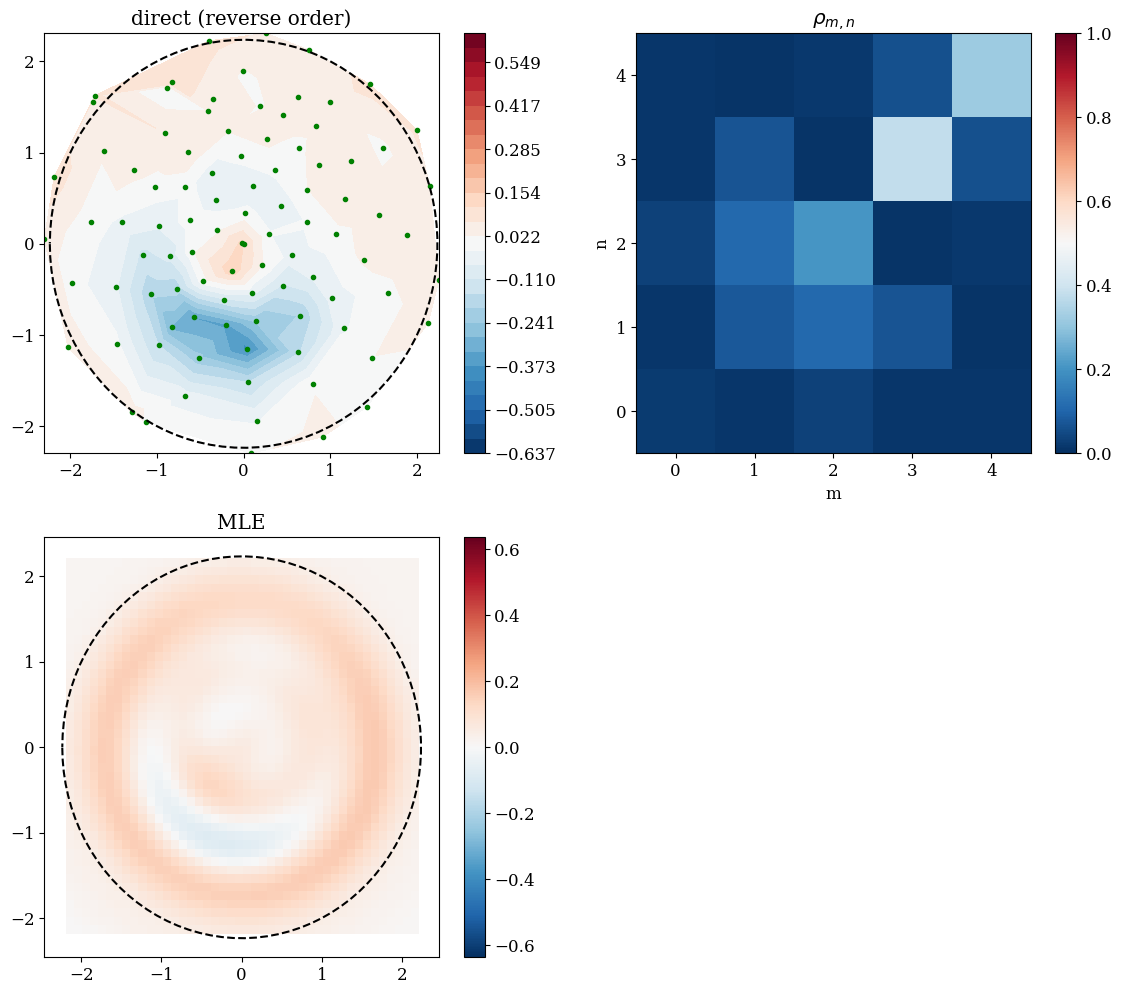

In [367]:
fig1 = plt.figure(figsize=(14,12))
initial_state = 0*ket('0',dim=[[mode_state_num]])-1*ket('1',dim=[[mode_state_num]])
# initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(mode_state_num)/sqrt(1)+0.1,sqrt(mode_state_num)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

In [35]:
allocated_readout = [0.0, -0.04608549858530547, 0.3336287816533232, 0.017195325781317904, 0.16754618368915608, 0.011454281305751813, 0.011561375889043202, 0.18681140944804658, 0.026583986692198004, 0.0013549477977336714, 0.03551105828986656, 0.1660487437269283, 4.419790796200249e-05, 0.12691013658689995, 9.20311031324362e-05, 0.023148157752992615, 0.2831220367898116, 0.003672249687408295, 0.0011410859188676489, 0.020212378863532436, 0.3540484115417323, 0.06419149203000776, 0.06522474667673943, 0.15840707416106597, 0.0001968297843383789, 0.058466927614232535, 0.0011694331796145245, 0.003358227470738403, 0.24207770157996705, 0.060994077909637116, 0.06440933070529015, -0.0862627664264171, 0.007273988055479395, 0.00012054323738804032, 0.005967801313241384, 6.158214104241373e-05, 0.0015326526053425424, 0.0007529348966657695, 0.32463233851788387, 0.07705378553434689, 0.0001456810904979032, 0.00022769470472276112, 0.032012948188615054, 0.06288418884753649, 0.3594335389925536, 3.026722381017856e-05, 0.21440257634019524, 4.204882067489996e-05, 0.3665480822541053, 0.019651752159197712, 0.0001233693465490807, 0.02421095263494183, 0.005404500340730886, -0.10119853281675217, 0.008107547353598976, 0.011556943239711433, 0.00012035205524191045, 0.02483039243948891, 0.021803942648362197, 0.007835285635193768, 0.5730658798412308, -0.00022700924587311377, 0.5774552457280344, 0.4733188641651812, -0.005694296926493647, 3.5847354304545796e-08, 0.10127043805956051, 0.006555049579087846, 0.030693535843576387, 0.0011965691026077276, 0.3458244214132088, 0.00010938054586221323, 0.04324256437699775, 0.15043348474611767, 9.69122188056243e-05, 0.1278550829701593, 0.00631420035015171, 3.149560371769376e-05, 0.02976432456128779, 0.0001274289820480911, 0.11296046069098362, 0.018686995683443668, 0.1226754976748423, 0.0014364960987757538, 0.00020717078132160018, 0.0010253564272336335, 0.4707214324879793, 0.009743708673326683, 7.734425770191812e-05, -0.2215908268675725, 0.43325392787013095, -0.13206003574127395, 0.262499940527287, 0.002148397460649911, 0.0009603866283196127]  # 0+1j
allocated_readout = [0.0, 0.0962125828152604, 0.020417851632661195, 0.12066942730438154, 0.046418290915240634, 0.01954500850670662, 0.03928798549531655, 0.1468327721852832, 0.15583089088583585, 0.0004873909397333101, 0.018041276980970515, 0.29018988178416305, 0.00010750729708001028, 0.1210742031597005, 9.174108308002226e-05, 0.3272262026215602, 0.1845418129713755, 0.0035632609138231846, 0.0034297261401649033, 0.1417333488875773, -0.07117915429991858, 0.01350561963757375, 0.09208979793869698, 0.020044703605223476, 0.00012569281165837072, 0.23469650887784485, 0.0007384340816774202, 0.002244280305143319, 0.11050663528669512, 0.01626863899349361, 0.04009714501268612, 0.5543461759008104, 0.024312208714047517, 4.9520861210713624e-05, 0.0018701765500359032, 0.0001098843759511548, 0.002615245858212718, 0.0003671345079782119, 0.021684270993005746, 0.33111071415838117, 9.865750275093305e-05, 0.00010201116937192613, 0.0924984890055813, 0.15216210854534415, 0.10808463837867892, 6.906435308326345e-05, 0.01743504493452945, 9.363033465437421e-05, -0.017857857996473284, 0.03618140537412731, 0.00012782698538076588, 0.44074286210469316, 0.020770130288618217, 0.5685381360399965, 0.03557399777123986, 0.004421403656010143, 4.996630663483232e-05, 0.023613227053644395, 0.06509356723883901, 0.006488695804848178, -0.13898706658765092, 0.346047493615517, -0.15373400568248927, -0.007052441579422239, 0.10639588675132536, 2.1329666114252604e-08, 0.21120936486756836, 0.009794247125943921, 0.03824062714590257, 0.0013171044109357751, -0.20787489245395668, 0.00010555169344653787, 0.4030446952430641, 0.2642288247325042, 0.00019438774140875882, 0.030825204138058587, 0.0023715544849706284, 6.738303416531411e-05, 0.007170870375314043, 0.00016465770953764418, 0.06695987188154662, 0.008986314220382093, 0.2479118610094223, 0.003139913935738022, 9.917898961977844e-05, 0.00137351592163333, -0.03751008458122673, 0.3717335985787683, 0.00014332041294752337, 0.47164319553083367, 0.028211470301928443, 0.4775970517077349, 0.08864751308764818, 0.004854417953354555, 0.0027965581929482904]  # 0-1j
allocated_readout = [0.035736499937567695, 0.06427647820925572, 0.05162842282249753, 0.0029558702245347105, 3.1303533677051886e-05, 0.20037357183406782, 0.016091015983723183, 0.5736813552139386, 0.02910501215889938, 9.081201607572696e-07, 0.18809349272393813, 0.41610072778392987, 2.703732709450951e-07, 1.1491094158908315e-05, -5.0264961771188955e-09, 0.00044283298241764327, 0.00039481366897234653, 0.24555444008402807, 2.6172647709200377e-06, 0.0002276636299951876, 0.12001284468299046, 0.004560936870664704, 0.5416265779030238, 0.0003342476083292255, 9.04440011412933e-12, 0.1829674285915756, 9.143917771149212e-10, 0.10890983501251636, 6.158047175394312e-05, 1.1939203996998071e-05, 1.3979011840669148e-06, 0.004817731739495438, 4.1969127817167e-06, 1.33661544642199e-06, 0.0001792977912475553, 0.0020380777146480882, 4.471718812791898e-09, 0.003483341558765815, 0.0004711672617915907, 0.0018403988570188073, 0.014196455164057018, 0.00017193036721377953, 0.12821862589622723, 1.5132250314870677e-05, 0.2974293378173664, 7.0100077858187366e-09, 0.006088427899116778, 3.1371194729108423e-09, 0.0035663309878888024, 4.849642281435186e-07, 0.047548178712269594, 0.16672420493504708, 0.0005708256207867287, 0.02721251070502012, 9.436739263122929e-05, 0.0133835840048676, 5.638934339314378e-08, 0.4906928816887287, 4.819907612756494e-06, 1.3976345915282084e-08, 0.0073082166087171056, 0.0042383480456551215, 0.04141960675475263, 0.11848264168834838, 0.012433106427367908, -6.681805707858653e-08, 0.4268588836071687, 2.7353917012283293e-08, 3.9219144094530407e-07, 4.70997498539874e-10, 0.027533676680615616, 0.0437139572489145, 0.0004863342806969932, 0.00011801681066211087, 0.0008506416667128056, 0.06266937082233813, 2.9488017982305145e-07, 5.238674301802565e-05, 5.27397831608535e-05, -6.955807560706577e-10, 0.4661786248992556, 2.1317123625347626e-07, 0.21931050835670277, 2.687344852215263e-08, 1.2993961687871658e-09, 0.09621612283042401, 0.010464467256320472, 0.04481437350285232, 1.8025225283145903e-10, 0.020846039072374294, 0.000718824978525055, 0.0880108418863242, 0.31654329151871435, 0.013435932835331885, 0.00013143915694628348] # alpha=1.2 displacement
# allocated_readout = [0.035736499937567806, 0.02593771159866196, 0.3177038961068854, 2.169251432430655e-06, 0.09827373484244739, 5.4624795014930145e-06, 5.679707013436567e-07, 0.008214368835437049, 9.158149131553412e-06, 0.11091850651754709, 0.01282569408416409, 0.004547010710136191, -6.972451484906194e-09, 0.0031146865799498292, 4.778357831961241e-07, 8.31785629891846e-05, 0.021197199185968296, 3.68367578817832e-05, 1.6670642119965627e-09, 4.131180359266024e-06, 0.0781100754605218, 0.3935844254292054, 0.0003513570950502088, 0.5129587245646087, 0.00023826640653497826, 0.0001289225561149122, 0.000677292106494282, 0.0007339791874784501, 0.029141769788887464, 0.1868301967533627, 0.006532932932008842, 0.0005751572800840302, 1.558196178347857e-07, 0.036677917687491596, 0.214825987463692, 1.967991877454451e-10, 1.1461183972565648e-07, 0.007176148778509835, 0.318718007766055, 0.008781902993639786, 9.854171052052408e-05, 0.01446916756004412, 1.4428545431961525e-05, 0.00013019006098207228, 0.0469472232686507, -4.890909975957518e-09, 0.5874611817179166, -1.1098326005002713e-09, 0.07069835497617888, 1.2180812489499286e-05, 4.054337312518104e-07, 0.001028102231869211, 4.844468396116007e-08, 0.0005648533596434524, 1.3472496107820182e-07, 0.05578152498037055, 0.03256976807287534, 0.00037573203302188697, 4.458413317557019e-06, 0.00026497901018126445, 0.24745822915985838, 4.0494580791741e-05, 0.24781646303622895, 0.18018060156614546, 0.026040474370412927, 1.3306052382334386e-05, 0.0006321970461232428, 3.941605378709344e-06, 0.0001385778421650273, 3.2322562165518716e-06, 0.10286092815160693, 8.738292026982639e-07, 0.0006918217164348825, 0.002608549045728215, 1.2679649388752905e-10, 0.16454702627203616, 0.06636074299258908, -9.772200681319234e-10, 0.4049523818211029, 2.839352420426993e-08, 0.010860227937893256, 0.014832589747859351, 0.015479660663701378, 1.7801659024180723e-08, 0.006877296585541231, 4.291738239994514e-07, 0.4961146477361055, 0.00010314200475096558, 1.9819411715146386e-10, 0.005157919748855119, 0.13228845709525683, 0.004218705452426621, 0.051703231086393554, 3.536305171031719e-08, 1.272161211403641e-09]   # alpha = 1.2j along y
# allocated_readout = [0.6366197723675495, 0.595208607561302, -0.022691157461192258, 0.02041487819460438, 0.04089263260051888, 0.09222448803073113, 0.012649266827147376, 0.3350597213620218, 0.02721499781660276, -7.310027903700813e-05, 0.08448169991657623, 0.3159567295805635, 3.3571074719856034e-06, 0.34335303410388024, 0.019210847759424998, -0.02179761343511116, 0.36527843568331236, 0.11671565700836879, -0.00022404966029508357, 0.025493765357102148, 0.2693822419649227, 0.010311438809654206, 0.2615359162261321, 0.027498513439553895, 0.00557144483472904, 0.027358869121817682, 0.01973973342810568, 0.051232538644143545, 0.18204607149296517, 0.018329339788429922, 0.1898197975424019, -0.20932886549654622, 0.005226473705859785, 3.3302314357592622e-06, -0.0003507119861499412, 0.0009662027071883086, 0.023755757861071404, 0.0016603380747092506, -0.017742926469054204, 0.33646788306707365, 0.006724532696090861, 6.732842937648484e-05, 0.05279010639001879, 0.10995456357447347, 0.22364431756761485, 4.451288441054313e-06, 0.032033689210182174, 1.4045096576462807e-05, 0.2574574665354983, 0.10446134897614633, 0.022520200067722818, -0.06764565313451293, 0.00017761439244343613, -0.21991066178996993, 0.0017456768229207919, 0.007475337397426219, 3.343894054209326e-06, 0.2368367135597306, 0.03668494003538165, 0.13666407005398987, -0.24067469644124667, 0.01099816855925929, -0.24678914172149957, -0.12637931076117728, 0.5852048439950729, 3.592035465278684e-07, 0.18365139354632326, 0.09432668331230963, 0.23671097380238687, 0.069423560216466, 0.2335387377269994, 0.020703413926896213, -0.049966732930325754, 0.2813067821612145, 0.0003936449524110829, 0.031535795815426294, 0.0021740265644768072, 2.2614114539351708e-05, 0.001185888782587075, 0.014968384518669234, 0.2119923064743805, 0.04351853450010619, 0.4583536611350469, 0.005185910744357101, 0.00022252053525338939, 0.04541901183623175, -0.07558048088128416, -0.03956641536866919, 0.0008104767709388254, -0.02492903471676435, -0.06772577162788561, -0.018221057664869124, 0.09148533790960961, 0.0067919081723522255, -0.00015933417203196646]  # cat along x
# allocated_readout = [0.6366197723675495, 0.5019117404788251, 0.09219523414192465, 0.2825938512421152, 0.029562646749596168, 0.0040580201578670864, 0.07078568134051147, 0.014792345783494682, 0.11745233081814226, 0.05248117426810466, 0.011420594404285922, -0.13356407509614857, 0.01723094257703778, 0.0333154263987538, 3.414255771228896e-06, 0.07880643414233676, -0.18618554886113206, -0.00042109665326182526, 0.07933886160697391, 0.2201922321747169, 0.06779818124569346, 0.1813507062352573, 0.02440249960820621, 0.24267050444403887, 9.854456775557573e-05, 0.004708096049807017, 0.00023509746529453207, 0.00011997976546944926, -0.01124790315498291, 0.08141283602178333, 0.015992084657218922, 0.2696096036589431, 0.0801281675559965, 0.017367076428457088, 0.10161130613225547, 0.00042530044686414094, 0.0008601504653957511, 0.0034429270399377724, 0.09371133061089237, -0.22748551797378674, 3.796117051108461e-05, 0.006858019066440337, 0.03360528277944339, 0.025488399785382504, -0.21049027957982538, 0.00800903859523269, 0.3026477812734162, 0.006126199372979001, -0.08780385663354426, 0.009864094485584028, 2.965229604770202e-06, -0.11149045608588627, 0.1678709217918865, 0.35234059158553693, 0.21560017315780655, 0.027002216618776925, 0.015416294949589791, 0.002062607876864961, 0.03873598137828941, -0.0004426554658628061, 0.304696720940077, 0.3586455054333603, 0.353013238033759, -0.04777898322817603, 0.34465897923675587, 5.339023553793786e-06, 0.00932561942529688, 0.0005985176739968312, 0.006209784968353256, -0.00012258043520515217, 0.58151242042595, 3.2758336975637354e-06, -0.09464765082478026, -0.056789727206651895, 0.0020435102584184196, 0.06010904548225369, 0.0314585459020141, 0.003629906344438885, 0.19251056221889704, 5.15032985177371e-06, 0.027550004903260802, 0.009337451126903358, -0.223417526620795, 0.007747981766077144, 0.0032692914047964114, -6.406038952592442e-05, 0.37305746208986174, 0.12223274745387867, 0.0007418578305226174, 0.5221862915054974, -0.10574235233530437, 0.16888906906285928, -0.020935707759759354, 0.010511281492684776, 0.06610390739883847]  # cat along y
# allocated_readout = [0.272837045300392, 0.4812009349666538, -0.019131584082751438, -0.0072589026339299634, 0.14852335153042262, 0.15062111520874155, 0.07679079751647866, 0.2579377283038885, -0.04666805334348096, 0.012998406604533885, 0.2867082457204386, 0.08971680409171941, 0.001716901874845389, 0.13154253337329302, -3.1022010111488485e-05, 0.06804214033950545, 0.17600477068354084, 0.08460511997575351, 0.018616077229379302, 0.05519435521623006, -0.036187876046285594, 0.21874697058597464, 0.29636698964634295, 0.1683178113511453, 0.0002352031166709955, -0.042099807940931204, 0.0004214793987087559, 0.07366073516662713, 0.19888170466660718, 0.09585427489186113, 0.043165420360308085, -0.049780251655922564, 0.052820494192751435, 0.0027675262456098217, 0.0571274402988173, 0.0033403142566384766, 0.006686014925246817, 0.019630517387881706, 0.14853227030957997, 0.06416926046633158, 0.006460236242580023, 0.006531162849888385, 0.11145157439672947, 0.1382521277099894, -0.0642522024044084, 0.0010126625269882648, 0.15215104762658943, 0.0011878381745448795, -0.0852774999605588, 0.04515529775362244, 0.006399683643344046, -0.09072063719834603, 0.049986433749866215, -0.15646051310454728, 0.05549909325900744, 0.1271475098814338, 0.002003861739884821, 0.2653211673299944, 0.08547625586279274, -0.001581836637394857, -0.2760269612221964, -0.14913194490735815, -0.490815570174171, -0.32081897078804555, 0.0747236043298625, 8.902819512050463e-07, 0.1199302793359418, 0.01138159216354184, 0.029509556730583655, -3.953824762814096e-05, -0.17607934254237595, 0.005745768707209446, 0.13234371254279095, 0.19965130947096354, 0.004567938246010365, 0.2975008989095858, 0.021075779502791388, 0.0016953971374016432, 0.10270555277141205, 0.00034873170903405875, 0.3909741782133981, 0.017094415411868437, 0.32672772557805285, 0.012172085183618876, 0.0014240126430454998, 0.033309355505668076, -0.18286396265356442, -0.25794082433932125, 0.0011217917434964933, 0.2471674359221458, 0.12707511634494922, 0.32285626768468256, 0.16164893053686205, 0.045620474290537276, 0.020514399645578794]
allocated_readout = [0.0, -0.04608549858530547, 0.3336287816533232, 0.017195325781317924, 0.16754618368915608, 0.011454281305751794, 0.011561375889043206, 0.18681140944804664, 0.026583986692198067, 0.0013549477977336981, 0.03551105828986659, 0.1660487437269283, 4.4197907961962414e-05, 0.1269101365868999, 9.203110313241603e-05, 0.02314815775299256, 0.2831220367898116, 0.003672249687408257, 0.001141085918867659, 0.02021237886353241, 0.3540484115417322, 0.06419149203000782, 0.06522474667673941, 0.15840707416106597, 0.00019682978433835146, 0.05846692761423246, 0.0011694331796145738, 0.0033582274707383356, 0.24207770157996716, 0.06099407790963714, 0.06440933070529027, -0.08626276642641716, 0.007273988055479444, 0.00012054323738800993, 0.005967801313241447, 6.158214104238741e-05, 0.001532652605342561, 0.0007529348966658228, 0.32463233851788365, 0.07705378553434691, 0.00014568109049780087, 0.00022769470472267975, 0.032012948188615026, 0.06288418884753642, 0.35943353899255365, 3.0267223810207753e-05, 0.21440257634019527, 4.2048820674921115e-05, 0.3665480822541053, 0.019651752159197823, 0.00012336934654920097, 0.024210952634941788, 0.005404500340731006, -0.10119853281675215, 0.008107547353598959, 0.0115569432397114, 0.00012035205524185338, 0.024830392439488903, 0.021803942648362204, 0.00783528563519381, 0.5730658798412309, -0.00022700924587304439, 0.5774552457280344, 0.4733188641651812, -0.005694296926493647, 3.5847354318110255e-08, 0.1012704380595605, 0.006555049579087837, 0.030693535843576373, 0.0011965691026078105, 0.3458244214132088, 0.00010938054586226523, 0.043242564376997666, 0.15043348474611762, 9.691221880571554e-05, 0.12785508297015935, 0.006314200350151811, 3.149560371773616e-05, 0.02976432456128783, 0.00012742898204807943, 0.11296046069098362, 0.018686995683443654, 0.12267549767484223, 0.0014364960987758415, 0.00020717078132158323, 0.0010253564272336081, 0.47072143248797915, 0.009743708673326669, 7.734425770196915e-05, -0.2215908268675725, 0.43325392787013084, -0.13206003574127398, 0.2624999405272869, 0.00214839746064983, 0.0009603866283196507]  # 1|0>-1j|1>
# allocated_readout = [0.0, -0.1348339934686485, 0.08931409612959995, 0.06086384098136931, 0.17367609788697258, 0.006980432757590381, 0.01659713977169583, 0.0038193941904752157, 0.05575176055441801, 0.0010040260508318263, 0.011694346675446686, -0.0540048011057008, 7.672442774037373e-05, 0.23299313458408127, 0.00013060244907615444, 0.2651602552075779, 0.5516677718839869, 0.0017031924422913668, 0.002515853720081622, 0.09993953813699628, -0.1555885087034497, 0.030518289816023902, 0.018708105488065938, 0.10817516913352386, 0.00022143006813752023, 0.04218855736117212, 0.001358486429185706, 0.0014590547142347128, 0.3420808538173306, 0.0528586704102991, 0.08791195261433252, 0.3392859519789618, 0.020283282489419716, 8.14224682987671e-05, 0.0035138164887318093, 5.903259679468423e-05, 0.0029756161532576444, 0.0003853444035208504, 0.2579345674300278, 0.5672329663475976, 7.555626058765576e-05, 0.0001306763746940344, 0.02713099552183791, 0.1864439846846218, -0.08322694944161756, 5.5743052042984476e-05, 0.09934313932304412, 7.91747761225732e-05, 0.5055714406143568, 0.04421464653510427, 7.189723635397038e-05, 0.0031726944121530792, 0.011656176940205232, 0.16470641313730236, 0.02359501521492063, 0.005187403805947869, 9.144664673241776e-05, 0.00867515951152073, 0.06474883309810867, 0.011130011004072515, 0.3444500681967029, 0.17793180399120223, 0.10245086461770916, 0.030013161707360236, 0.28630032817593154, 3.4165087212026025e-08, 0.017329269483036043, 0.012535599189258567, 0.05740406437114328, 0.0018689909923418156, 0.10143236350149504, 6.187522922976587e-05, 0.4274250691930733, 0.43370091488318663, 0.00010604794902729788, 0.04059621639611766, 0.005593090917240207, 4.009429420742889e-05, 0.02044453541425774, 0.00020620664525738557, 0.021245593973773035, 0.020587798124856345, -0.19512845616779909, 0.0030886780020567463, 0.00019149974073446297, 0.0006407652896659189, 0.20285763364301382, 0.10118201509671784, 0.00014368303848852741, 0.18395924327340366, 0.4521059455386476, -0.05816809001763104, 0.021092454540056746, 0.002241441824428312, 0.0016517302363237164] # 1|0>-1|1>

(0.9999999999999999+1.8865117801247777e-17j)
[ 7.46644594e-01-4.55618054e-17j  8.90079916e-02+1.56847077e-16j
  7.06545109e-02-1.16755557e-17j  3.88370810e-02+8.05912010e-17j
  5.01449090e-02-2.35180065e-16j  4.71091365e-03+4.39362533e-17j
 -2.27124194e-19-3.39138447e-18j -1.17812313e-17+9.41161923e-18j]
[0.1299022 +2.77555756e-17j 0.22935683+1.71303943e-17j
 0.22245507+5.55111512e-17j 0.16953479+3.12250226e-17j
 0.11642204+3.46944695e-18j 0.06710346-1.13624388e-16j
 0.03921473-3.81639165e-17j 0.02601088+3.55618313e-17j]
0 population:  (0.12990220225665716+2.7755575615628914e-17j)
1 population:  (0.2293568294475412+1.713039432527097e-17j)
2 population:  (0.22245506906774054+5.551115123125783e-17j)
sum:  (0.45181189851528175+7.26415455565288e-17j)
MLE Fidelity:  0.5067493330983526


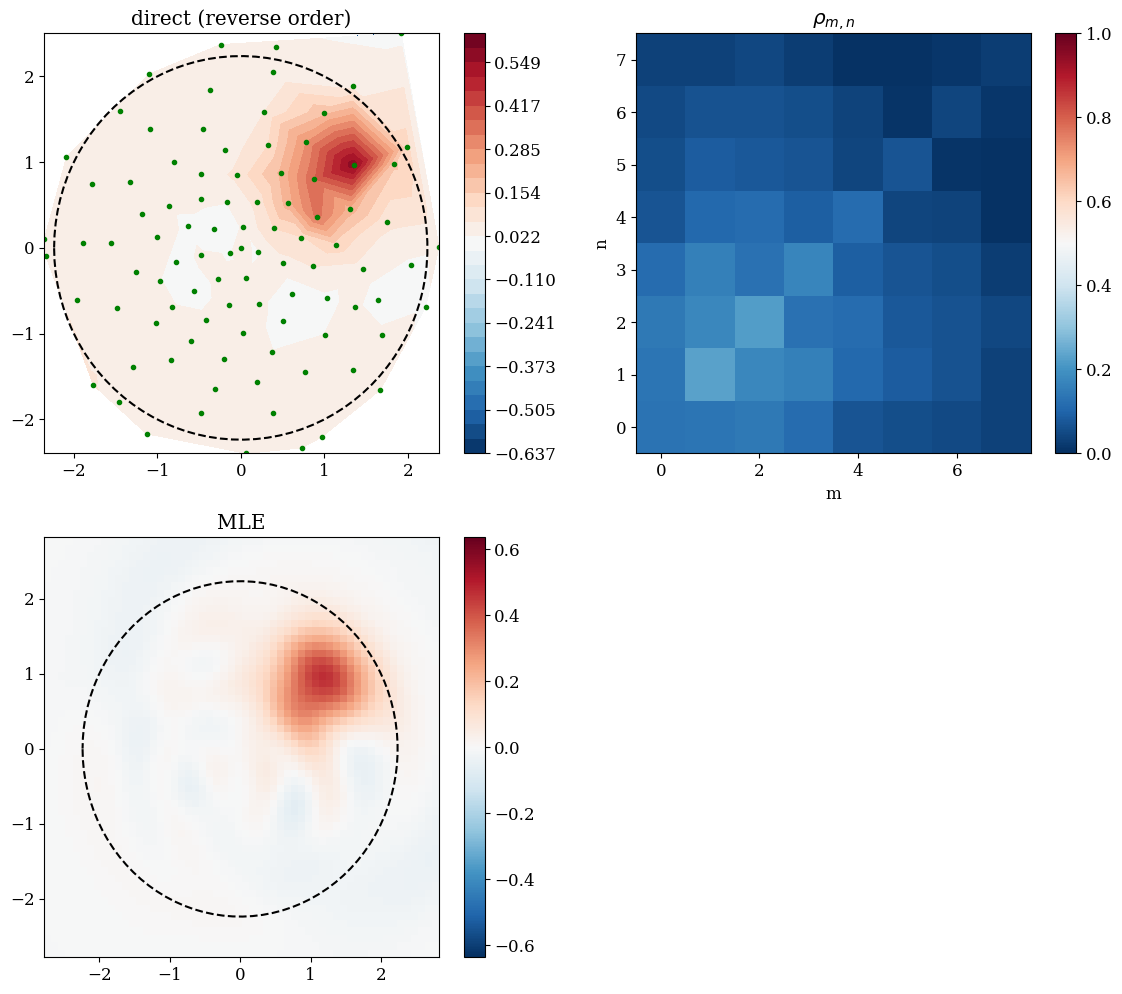

In [48]:
fig1 = plt.figure(figsize=(14,12))
# initial_state = 1*ket('0',dim=[[mode_state_num]])-0*ket('1',dim=[[mode_state_num]])
initial_state = 1*ket('0',dim=[[mode_state_num]])-1j*ket('1',dim=[[mode_state_num]])+0*ket('2',dim=[[mode_state_num]])-0*ket('3',dim=[[mode_state_num]])
initial_state = initial_state.unit()

# alpha = 1.2
# # D1 = displace(mode_state_num, alpha)
# # # D2 = displace(mode_state_num, -alpha)
# D1 = w.D(alpha)
# D2 = w.D(-alpha)
# # initial_state = (D1 * initial_state + D2 * initial_state*0).unit()
# initial_state = dot(D1, initial_state.full())

rho_ideal = ket2dm(Qobj(initial_state)).unit()
P_ns = []
alphas2 = arange(-sqrt(8)/sqrt(1)+0.1,sqrt(8)/sqrt(1),0.1)

ax1 = fig1.add_subplot(2,2,1, title='direct (reverse order)')
ax1.tripcolor(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,cmap='RdBu_r')
tcf = ax1.tricontourf(-np.real(alpha_list),-np.imag(alpha_list),allocated_readout,np.linspace(-2/np.pi,2/np.pi, 30),cmap='RdBu_r')
ax1.plot(-np.real(alpha_list),-np.imag(alpha_list), 'g. ')
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax1.plot(r*cos(th),r*sin(th),'k--')
fig1.colorbar(tcf,ax=ax1)

rho = w.rho_pinv_positive_sd(allocated_readout)    
print (trace(rho))
print (eig(rho)[0])
print (array([rho[i][i] for i in range(mode_state_num)]))
print("0 population: ", rho[0][0])
print("1 population: ", rho[1][1])
print("2 population: ", rho[2][2])
print("sum: ", rho[1][1] + rho[2][2])
P_ns.append([rho[i][i] for i in range(mode_state_num)])

ax2 = fig1.add_subplot(2,2,2, title ='$\\rho_{m,n}$')
c = ax2.pcolormesh(arange(mode_state_num),arange(mode_state_num),abs(rho),cmap = 'RdBu_r',vmin = 0,vmax = 1)   
ax2.set_ylabel('n')
ax2.set_xlabel('m')
fig1.colorbar(c,ax=ax2)

ax3 = fig1.add_subplot(2,2,3, title='MLE')
c = ax3.pcolormesh(alphas2,alphas2,real(w.extracted_W(rho,alphas2,alphas2)),cmap = 'RdBu_r',vmin = -2/np.pi,vmax = 2/np.pi)
r = sqrt(5)
th = linspace(-3.14,3.14,100)
ax3.plot(r*cos(th),r*sin(th),'k--')
ax3.set_ylim
fig1.colorbar(c,ax=ax3)

fid = qutip.fidelity(Qobj(rho), rho_ideal)
print('MLE Fidelity: ', fid)

In [202]:
# readout confusion matrix [0.9896, 0.010399999999999965, 0.054, 0.946]
Pgg = 0.9896
Pge = 0.0104
Peg = 0.054
Pee = 0.946

P_matrix = np.matrix([[Pgg, Peg],[Pge, Pee]])

temp_data1, attrs1 = prev_data(expt_path, '00026_WignerTomography1ModeExperiment.h5') 
alpha_list = temp_data1['alpha']

tre = attrs1['config']['device']['readout']['threshold'][0]
allocated_readout = []
for ii in range(len(temp_data1['alpha'])):
    counts = 0
    counts_e = 0
    counts_g = 0
    for jj in range(len(temp_data1['i0'][ii][0])):
        if temp_data1['i0'][ii][0][jj] > tre:   # |e>
            counts_e += 1
        else:    # |g>
            counts_g += 1
    counts_new = inv(P_matrix)*np.matrix([[counts_g],[counts_e]])
    counts = counts_new[1,0]-counts_new[0,0]
    allocated_readout.append(2/np.pi*(counts/attrs1['config']['expt']['reps']))

mode_state_num = 3   # cutoff fock state number
alpha_list = np.array([0,0.2])
w = wigner_tomography_analysis(alpha_list,mode_state_num = mode_state_num)


## optimized displacement for tomography

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy.special import genlaguerre
from math import sqrt, factorial
from numpy.linalg import cond, svd
from scipy.optimize import fmin, check_grad, minimize
from IPython.display import display, clear_output
import time

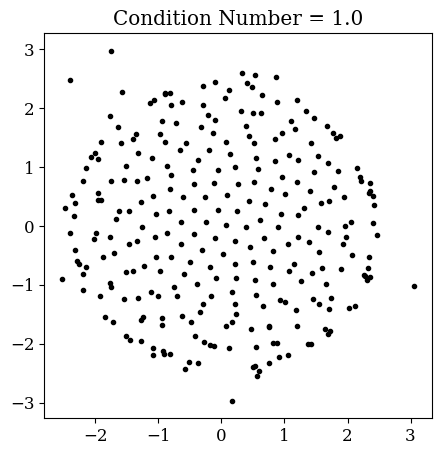

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH


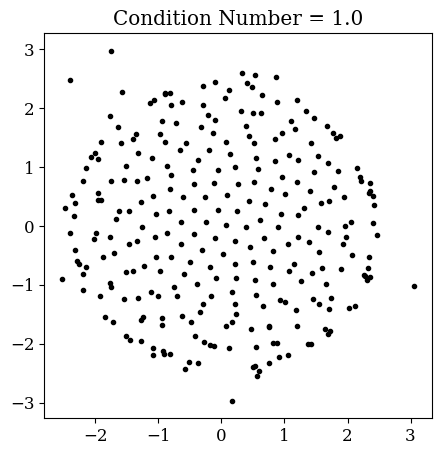

In [28]:
# number of photons
FD = 8
# number of displacements
n_disps = (FD**2 + 30)*3
def wigner_mat_and_grad(disps, FD):
    ND = len(disps)
    wig_tens = np.zeros((ND, FD, FD), dtype=np.complex128)
    grad_mat_r = np.zeros((ND, FD, FD), dtype=np.complex128)
    grad_mat_i = np.zeros((ND, FD, FD), dtype=np.complex128)

    B = 4 * np.abs(disps)**2
    pf = (2 / np.pi) * np.exp(-B/2)
    for m in range(FD):
        x = pf * np.real((-1) ** m * genlaguerre(m, 0)(B))
        term_r = -4 * disps.real * x
        term_i = -4 * disps.imag * x

        if m > 0:
            y = 8 * pf * (-1)**(m-1) * genlaguerre(m-1, 1)(B)
            term_r += disps.real * y
            term_i += disps.imag * y
        wig_tens[:, m, m] = x
        grad_mat_r[:, m, m] = term_r
        grad_mat_i[:, m, m] = term_i

        for n in range(m+1, FD):
            pf_nm = sqrt(factorial(m)/float(factorial(n)))
            x = pf * pf_nm * (-1)**m * 2 * (2*disps)**(n-m-1) * genlaguerre(m, n-m)(B)
            term_r = ((n-m)-4*disps.real*disps) * x
            term_i = (1j* (n-m)-4*disps.imag*disps) * x
            if m>0:
                y = 8*pf*pf_nm*(-1)**(m-1)*(2*disps)**(n-m) * genlaguerre(m-1,n-m+1)(B)
                term_r += disps.real * y
                term_i += disps.imag * y
            wig_tens[:, m, n] = disps * x
            wig_tens[:, n, m] = np.conj(disps * x)
            grad_mat_r[:, m, n] = term_r
            grad_mat_r[:, n, m] = np.conj(term_r)
            grad_mat_i[:, m, n] = term_i
            grad_mat_i[:, n, m] = np.conj(term_i)

    return wig_tens.reshape((ND, FD**2)), grad_mat_r.reshape((ND, FD**2)), grad_mat_i.reshape((ND, FD**2))

def cost_and_grad(r_disps):
    N = len(r_disps)
    c_disps = r_disps[:N//2] + 1j*r_disps[N//2:]
    M, dM_rs, dM_is = wigner_mat_and_grad(c_disps, FD)
    U, S, Vd = svd(M)
    NS = len(Vd)
    cn = S[0] / S[-1]
    dS_r = np.einsum('ij,jk,ki->ij', U.conj().T[:NS], dM_rs, Vd.conj().T).real
    dS_i = np.einsum('ij,jk,ki->ij', U.conj().T[:NS], dM_is, Vd.conj().T).real
    grad_cn_r = (dS_r[0]*S[-1]-S[0]*dS_r[-1]) / (S[-1]**2)
    grad_cn_i = (dS_i[0]*S[-1]-S[0]*dS_i[-1]) / (S[-1]**2)
    return cn, np.concatenate((grad_cn_r, grad_cn_i))
best_cost = float('inf')
f, ax = plt.subplots(figsize=(5, 5))
def wrap_cost(disps):
    global best_cost
    cost, grad = cost_and_grad(disps)
    best_cost = min(cost, best_cost)
    ax.clear()
    ax.plot(disps[:n_disps], disps[n_disps:], 'k.')
    ax.set_title('Condition Number = %.1f' % (cost,))
    clear_output(wait=True)
    display(f)
    return cost, grad
init_disps = np.random.normal(0, 1, 2*n_disps)
init_disps[0] = init_disps[n_disps] = 0
ret = minimize(wrap_cost, init_disps, method='L-BFGS-B', jac=True, options=dict(ftol=1E-6))
print(ret.message)
new_disps = ret.x[:n_disps] + 1j*ret.x[n_disps:]
new_disps = np.concatenate(([0], new_disps))

In [29]:
np.save('H:\\Shared drives\\SLab\\Multimode\\experiment\\240911\\wigner_disp2', new_disps)

In [30]:
new_disps

array([ 0.        +0.00000000e+00j, -0.18003502-6.89985037e-01j,
        0.17477377-1.63438276e+00j, -0.16430618-1.18062024e+00j,
        1.8477482 +9.39126287e-01j, -0.28578264+2.37795792e+00j,
       -0.90053509+2.25978621e+00j,  1.14952419-6.50533561e-01j,
       -1.76689384-1.92276452e-01j,  1.20263524+2.14210457e+00j,
        2.01800983-1.39464695e+00j, -1.62541332+2.60964711e-01j,
        2.35239673+5.98528804e-01j,  0.9165156 -2.22308724e+00j,
       -0.93557308-1.55784782e+00j,  0.06448543+2.17846802e+00j,
        0.49527774+1.92152092e+00j,  1.30898452+2.98179951e-01j,
        0.82093374-1.98979502e+00j, -1.23461156-6.79226972e-01j,
       -0.89385285+2.24629792e+00j,  0.2090413 +1.00641992e+00j,
        1.46910321+1.83119757e+00j, -0.41721329-1.86867414e+00j,
        1.66889867+1.69547010e+00j,  0.95182895+2.12040673e-01j,
        1.20863868+1.12105345e+00j, -1.03277969-5.24293345e-01j,
       -1.3406372 -2.46387223e-01j, -1.32167768+1.24660008e+00j,
        0.58783513+9.6648

In [271]:
phase_check = np.array([0+0j, 0.2+0j, 0.4+0j, 0.6+0j, 0.8+0j, 1.0+0j, 0+0.2j, 0+0.4j, 0+0.6j, 0+0.8j, 0+1.0j, -0.2, -0.4, -0.6, -0.8, -1.0])

In [272]:
np.save('H:\\Shared drives\\multimode\\Multimode\\experiment\\240624\\phase_check', phase_check)